In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,precision_score
from sklearn.metrics import confusion_matrix,roc_curve,recall_score,f1_score,plot_roc_curve,roc_auc_score

In [2]:
# Importing the dataset
dataset = pd.read_csv('./Survey-Survey.csv')
dataset.tail(5)

Timestamp Total score  \
500   2022/08/10 1:57:39 AM GMT+6    0.00 / 0   
501   2022/08/10 2:00:06 AM GMT+6    0.00 / 0   
502   2022/08/10 6:34:04 AM GMT+6    0.00 / 0   
503  2022/08/10 12:03:57 PM GMT+6    0.00 / 0   
504  2022/08/11 12:13:52 AM GMT+6    0.00 / 0   

    I Agree to participate in the research project under the conditions described above  \
500                       Yes, I agree to participate,                                    
501                       Yes, I agree to participate,                                    
502                       Yes, I agree to participate,                                    
503                       Yes, I agree to participate,                                    
504                       Yes, I agree to participate,                                    

    I Agree to participate in the research project under the conditions described above [Score]  \
500                                             -- / 0                                            
501                                             -- / 0                                            
502                                             -- / 0                                            
503                                             -- / 0                                            
504                                             -- / 0                                            

     I Agree to participate in the research project under the conditions described above [Feedback]  \
500                                                NaN                                                
501                                                NaN                                                
502                                                NaN                                                
503                                                NaN                                                
504                                                NaN                                                

                        The name of your institution\n  \
500    Rajshahi University of Engineering & Technology   
501    Rajshahi University of Engineering & Technology   
502  Chittagong University of Engineering and Techn...   
503  Chittagong University of Engineering and Techn...   
504                   Islamic University of Technology   

    The name of your institution\n [Score]  \
500                                 -- / 0   
501                                 -- / 0   
502                                 -- / 0   
503                                 -- / 0   
504                                 -- / 0   

     The name of your institution\n [Feedback]  \
500                                        NaN   
501                                        NaN   
502                                        NaN   
503                                        NaN   
504                                        NaN   

    The name of your program of study\n  \
500    Computer science and engineering   
501    Computer science and engineering   
502                                 EEE   
503                    Under Graduation   
504              Mechanical Engineering   

    The name of your program of study\n [Score]  ...  \
500                                      -- / 0  ...   
501                                      -- / 0  ...   
502                                      -- / 0  ...   
503                                      -- / 0  ...   
504                                      -- / 0  ...   

     9. _____ Calm, emotionally stable  \
500                                5.0   
501                                5.0   
502                                4.0   
503                                6.0   
504                                6.0   

    9. _____ Calm, emotionally stable [Score]  \
500                                    -- / 0   
501                                    -- / 0   
502                                    -- / 0

In [3]:
dataset.shape

(505, 153)

Translate Feature Names
Let's see which features to keep and which to reomve

In [4]:
dataset.columns

Index(['Timestamp', 'Total score',
       'I Agree to participate in the research project under the conditions described above',
       'I Agree to participate in the research project under the conditions described above [Score]',
       'I Agree to participate in the research project under the conditions described above [Feedback]',
       'The name of your institution\n',
       'The name of your institution\n [Score]',
       'The name of your institution\n [Feedback]',
       'The name of your program of study\n',
       'The name of your program of study\n [Score]',
       ...
       '9. _____ Calm, emotionally stable',
       '9. _____ Calm, emotionally stable [Score]',
       '9. _____ Calm, emotionally stable [Feedback]',
       '10. _____ Conventional, uncreative.',
       '10. _____ Conventional, uncreative. [Score]',
       '10. _____ Conventional, uncreative. [Feedback]', 'Unnamed: 149',
       'Unnamed: 150', 'Unnamed: 151', 'Unnamed: 152'],
      dtype='object', length=15

delete column

In [5]:
# Drop columns based on column index.
dataset2 = dataset.drop(dataset.columns[[0, 1, 2,3,4,5,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28,30,31, 33,34,36,37,39,40,42,43,45,46,48,
  49,51,52,54,55,57,58,60,61,63,64,66,67,69,70,72,73,75,76,78,79,81,82,84,85,87,88,90,91,93,94,96,97,99,100,102,103,105,106,108,109,111,112,
  114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,149,150,151,152]],axis = 1)
dataset2.head()

The name of your program of study\n Your current class level is Your gender  \
0                                 ppp        Freshman (Undergrad)      Female   
1                                 CSE          Senior (Undergrad)        Male   
2    Computer Science and Engineering          Senior (Undergrad)        Male   
3                                CSE           Senior (Undergrad)      Female   
4                          BSC in CSE          Senior (Undergrad)        Male   

  Your current age Living with family?  \
0             > 25                 Yes   
1            21-25                 Yes   
2             > 25                 Yes   
3            21-25                 Yes   
4            21-25                 Yes   

  Are you happy with your academic  Condition? Your CGPA   \
0                                          Yes  3.01-3.50   
1                                          Yes  3.01-3.50   
2                                          Yes     > 3.50   
3                                          Yes     > 3.50   
4                                          Yes     > 3.50   

  Are you addicted to any drugs? Are you in a relationship?  \
0                             No                        Yes   
1                             No                        Yes   
2                             No                         No   
3                             No                         No   
4                             No                         No   

    Did you have a recent breakup?    ... 1. _____ Extraverted, enthusiastic.  \
0                                Yes  ...                                 1.0   
1                                 No  ...                                 6.0   
2                                 No  ...                                 2.0   
3                                 No  ...                                 1.0   
4                                 No  ...                                 2.0   

  2. _____ Critical, quarrelsome. 3. _____ Dependable, self-disciplined.  \
0                             5.0                                    4.0   
1                             5.0                                    2.0   
2                             5.0                                    7.0   
3                             1.0                                    3.0   
4                             5.0                                    6.0   

  4. _____ Anxious, easily upset. 5. _____ Open to new experiences, complex.  \
0                             7.0                                        7.0   
1                             7.0                                        5.0   
2                             2.0                                        5.0   
3                             4.0                                        6.0   
4                             6.0                                        5.0   

  6. _____ Reserved, quiet.  7. _____ Sympathetic, warm.  \
0                       7.0                          7.0   
1                       4.0                          7.0   
2                       6.0                          5.0   
3                       4.0                          6.0   
4                       5.0                          5.0   

   8. _____ Disorganized, careless.  9. _____ Calm, emotionally stable  \
0                               5.0                                1.0   
1                               5.0                                1.0   
2                               5.0                                3.0   
3                               5.0                                6.0   
4                               5.0                                3.0   

   10. _____ Conventional, uncreative.  
0                                  1.0  
1                                  5.0  
2                                  2.0  
3                                  1.0  
4                                  3.0  

[5 rows x 47 columns]

In [6]:
dataset2.shape

(505, 47)

rename column

In [7]:
# Changing columns name with index number
mapping = {dataset2.columns[0]: 'Major', dataset2.columns[1]: 'class',dataset2.columns[2]: 'gender', dataset2.columns[3]: 'age',
           dataset2.columns[4]: 'livingWfamily', dataset2.columns[5]: 'acasatisfaction',dataset2.columns[6]: 'CGPA', dataset2.columns[7]: 'drugs',
           dataset2.columns[8]: 'relationship', dataset2.columns[9]: 'breakup',dataset2.columns[10]: 'conflict', dataset2.columns[11]: 'financialProb',
           dataset2.columns[12]: 'Violence', dataset2.columns[13]: 'bullied',dataset2.columns[14]: 'abused', dataset2.columns[15]: 'smediaT',
           dataset2.columns[16]: 'Q1A', dataset2.columns[17]: 'Q2A',dataset2.columns[18]: 'Q3A', dataset2.columns[19]: 'Q4A',dataset2.columns[20]: 'Q5A',
           dataset2.columns[21]: 'Q6A',dataset2.columns[22]: 'Q7A', dataset2.columns[23]: 'Q8A',dataset2.columns[24]: 'Q9A', dataset2.columns[25]: 'Q10A',
           dataset2.columns[26]: 'Q11A', dataset2.columns[27]: 'Q12A',dataset2.columns[28]: 'Q13A', dataset2.columns[29]: 'Q14A',dataset2.columns[30]: 'Q15A',
           dataset2.columns[31]: 'Q16A',dataset2.columns[32]: 'Q17A', dataset2.columns[33]: 'Q18A',dataset2.columns[34]: 'Q19A', dataset2.columns[35]: 'Q20A',
           dataset2.columns[36]: 'Q21A', dataset2.columns[37]: 'TIPI1',dataset2.columns[38]: 'TIPI2', dataset2.columns[39]: 'TIPI3',dataset2.columns[40]: 'TIPI4',
           dataset2.columns[41]: 'TIPI5',dataset2.columns[42]: 'TIPI6', dataset2.columns[43]: 'TIPI7',dataset2.columns[44]: 'TIPI8', dataset2.columns[45]: 'TIPI9',
           dataset2.columns[46]: 'TIPI10'}
dataset2 = dataset2.rename(columns=mapping)
display(dataset2)

Major                 class  gender    age  \
0                                 ppp  Freshman (Undergrad)  Female   > 25   
1                                 CSE    Senior (Undergrad)    Male  21-25   
2    Computer Science and Engineering    Senior (Undergrad)    Male   > 25   
3                                CSE     Senior (Undergrad)  Female  21-25   
4                          BSC in CSE    Senior (Undergrad)    Male  21-25   
..                                ...                   ...     ...    ...   
500  Computer science and engineering    Junior (Undergrad)    Male  21-25   
501  Computer science and engineering    Junior (Undergrad)  Female  21-25   
502                               EEE  Freshman (Undergrad)  Female   < 20   
503                  Under Graduation  Freshman (Undergrad)    Male   < 20   
504            Mechanical Engineering      Graduate student    Male  21-25   

    livingWfamily acasatisfaction       CGPA drugs relationship breakup  ...  \
0             Yes             Yes  3.01-3.50    No          Yes     Yes  ...   
1             Yes             Yes  3.01-3.50    No          Yes      No  ...   
2             Yes             Yes     > 3.50    No           No      No  ...   
3             Yes             Yes     > 3.50    No           No      No  ...   
4             Yes             Yes     > 3.50    No           No      No  ...   
..            ...             ...        ...   ...          ...     ...  ...   
500            No              No     < 3.00   Yes          Yes     Yes  ...   
501           Yes             Yes     > 3.50    No           No      No  ...   
502           Yes              No     < 3.00    No           No      No  ...   
503            No              No     < 3.00    No           No      No  ...   
504           Yes              No  3.01-3.50    No          Yes      No  ...   

    TIPI1 TIPI2 TIPI3 TIPI4 TIPI5 TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0     1.0   5.0   4.0   7.0   7.0   7.0    7.0    5.0    1.0     1.0  
1     6.0   5.0   2.0   7.0   5.0   4.0    7.0    5.0    1.0     5.0  
2     2.0   5.0   7.0   2.0   5.0   6.0    5.0    5.0    3.0     2.0  
3     1.0   1.0   3.0   4.0   6.0   4.0    6.0    5.0    6.0     1.0  
4     2.0   5.0   6.0   6.0   5.0   5.0    5.0    5.0    3.0     3.0  
..    ...   ...   ...   ...   ...   ...    ...    ...    ...     ...  
500   1.0   4.0   2.0   3.0   6.0   2.0    5.0    3.0    5.0     4.0  
501   1.0   3.0   3.0   6.0   4.0   1.0    6.0    1.0    5.0     7.0  
502   2.0   5.0   2.0   1.0   4.0   6.0    5.0    6.0    4.0     5.0  
503   3.0   1.0   4.0   1.0   4.0   6.0    6.0    2.0    6.0     2.0  
504   2.0   2.0   4.0   4.0   5.0   5.0    2.0    5.0    6.0     4.0  

[505 rows x 47 columns]

handle null value

In [8]:
# if your dataset contains missing value, check which column has missing values
dataset2.isnull().sum()

Major              4
class              4
gender             4
age                4
livingWfamily      4
acasatisfaction    4
CGPA               4
drugs              4
relationship       4
breakup            4
conflict           4
financialProb      4
Violence           4
bullied            4
abused             4
smediaT            4
Q1A                4
Q2A                4
Q3A                4
Q4A                4
Q5A                4
Q6A                4
Q7A                4
Q8A                4
Q9A                4
Q10A               4
Q11A               4
Q12A               4
Q13A               4
Q14A               4
Q15A               4
Q16A               4
Q17A               4
Q18A               4
Q19A               4
Q20A               4
Q21A               4
TIPI1              4
TIPI2              4
TIPI3              4
TIPI4              4
TIPI5              4
TIPI6              4
TIPI7              4
TIPI8              4
TIPI9              4
TIPI10             4
dtype: int64

In [9]:
# if your dataset contains missing value, remove those missing values
dataset2.dropna(inplace=True)
dataset2.shape

(501, 47)

 Major Feature

In [10]:
dataset2['Major'].value_counts()

CSE                                    54
EEE                                    34
Computer science and engineering       24
Electrical & Electronic Engineering    17
BBA                                    14
                                       ..
Ba(English)                             1
Geography and Environment               1
Economic Department                     1
English Literature                      1
Under Graduation                        1
Name: Major, Length: 237, dtype: int64

drop major

In [11]:
dataset2.drop('Major', inplace=True, axis=1)
dataset2.head()

class  gender    age livingWfamily acasatisfaction  \
0  Freshman (Undergrad)  Female   > 25           Yes             Yes   
1    Senior (Undergrad)    Male  21-25           Yes             Yes   
2    Senior (Undergrad)    Male   > 25           Yes             Yes   
3    Senior (Undergrad)  Female  21-25           Yes             Yes   
4    Senior (Undergrad)    Male  21-25           Yes             Yes   

        CGPA drugs relationship breakup      conflict  ... TIPI1 TIPI2 TIPI3  \
0  3.01-3.50    No          Yes     Yes     Sometimes  ...   1.0   5.0   4.0   
1  3.01-3.50    No          Yes      No     Sometimes  ...   6.0   5.0   2.0   
2     > 3.50    No           No      No  Never occurs  ...   2.0   5.0   7.0   
3     > 3.50    No           No      No  Never occurs  ...   1.0   1.0   3.0   
4     > 3.50    No           No      No     Sometimes  ...   2.0   5.0   6.0   

  TIPI4 TIPI5  TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0   7.0   7.0    7.0    7.0    5.0    1.0     1.0  
1   7.0   5.0    4.0    7.0    5.0    1.0     5.0  
2   2.0   5.0    6.0    5.0    5.0    3.0     2.0  
3   4.0   6.0    4.0    6.0    5.0    6.0     1.0  
4   6.0   5.0    5.0    5.0    5.0    3.0     3.0  

[5 rows x 46 columns]

<AxesSubplot:>

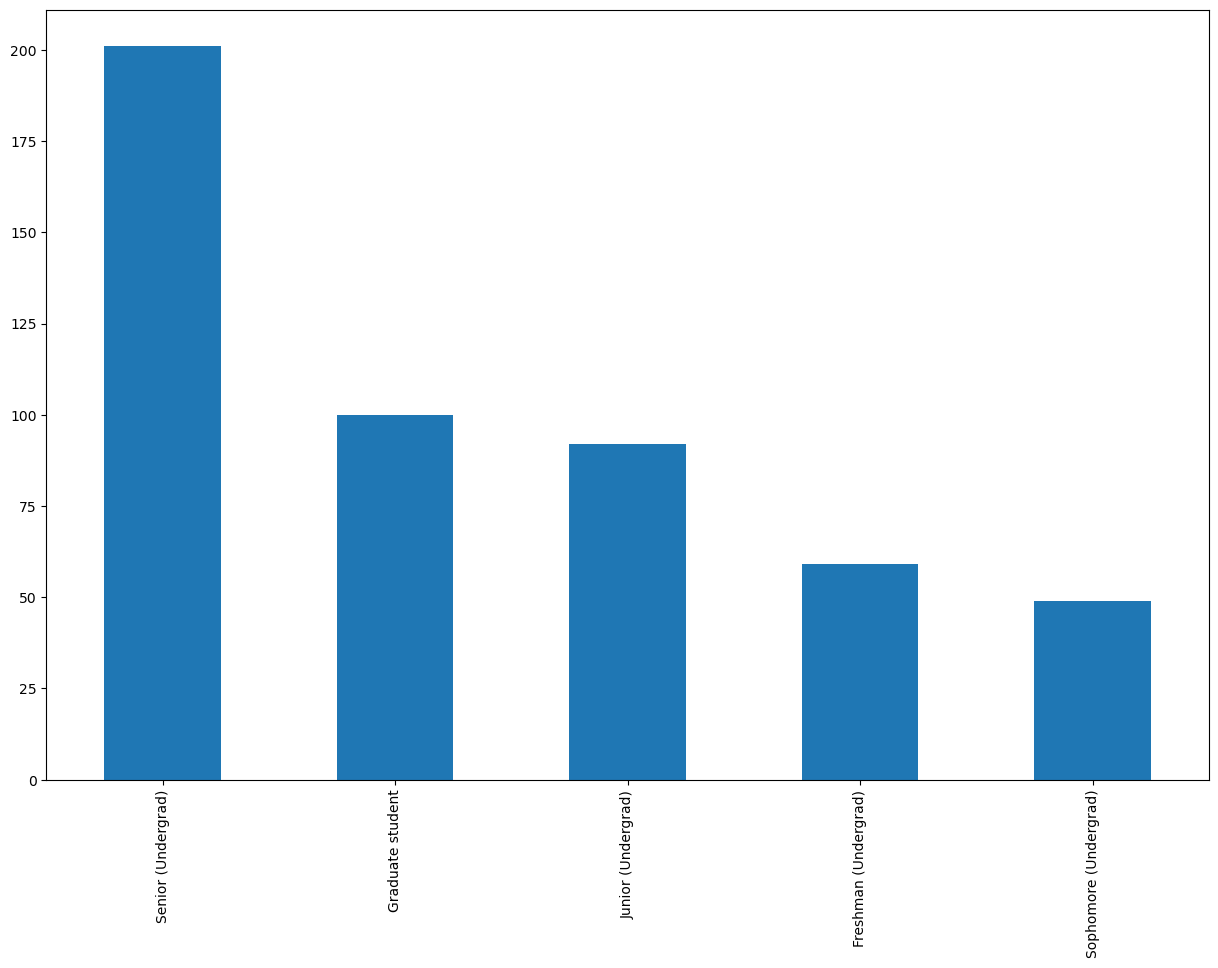

In [12]:
from typing import ValuesView
plt.figure(figsize=(15, 10))
dataset2['class'].value_counts()[:30].plot(kind= 'bar')

In [13]:
dataset2.drop('class', inplace=True, axis=1)

dataset2.head()

gender    age livingWfamily acasatisfaction       CGPA drugs relationship  \
0  Female   > 25           Yes             Yes  3.01-3.50    No          Yes   
1    Male  21-25           Yes             Yes  3.01-3.50    No          Yes   
2    Male   > 25           Yes             Yes     > 3.50    No           No   
3  Female  21-25           Yes             Yes     > 3.50    No           No   
4    Male  21-25           Yes             Yes     > 3.50    No           No   

  breakup      conflict financialProb  ... TIPI1 TIPI2 TIPI3 TIPI4  TIPI5  \
0     Yes     Sometimes           Yes  ...   1.0   5.0   4.0   7.0    7.0   
1      No     Sometimes           Yes  ...   6.0   5.0   2.0   7.0    5.0   
2      No  Never occurs            No  ...   2.0   5.0   7.0   2.0    5.0   
3      No  Never occurs           Yes  ...   1.0   1.0   3.0   4.0    6.0   
4      No     Sometimes            No  ...   2.0   5.0   6.0   6.0    5.0   

   TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0    7.0    7.0    5.0    1.0     1.0  
1    4.0    7.0    5.0    1.0     5.0  
2    6.0    5.0    5.0    3.0     2.0  
3    4.0    6.0    5.0    6.0     1.0  
4    5.0    5.0    5.0    3.0     3.0  

[5 rows x 45 columns]

Gender

In [14]:
print('Count of People participated as of Gender\n',dataset2['gender'].value_counts())

Count of People participated as of Gender
 Male                 291
Female               205
Prefer not to say      5
Name: gender, dtype: int64


In [15]:
le = LabelEncoder()
for col in dataset2.columns:
    if dataset2[col].dtype == np.number:
        continue 
    else:
        dataset2[col] = le.fit_transform(dataset2[col])

In [16]:
dataset2.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  \
0        1         2              1  ...    1.0    5.0    4.0    7.0    7.0   
1        0         2              1  ...    6.0    5.0    2.0    7.0    5.0   
2        0         1              0  ...    2.0    5.0    7.0    2.0    5.0   
3        0         1              1  ...    1.0    1.0    3.0    4.0    6.0   
4        0         2              0  ...    2.0    5.0    6.0    6.0    5.0   

   TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0    7.0    7.0    5.0    1.0     1.0  
1    4.0    7.0    5.0    1.0     5.0  
2    6.0    5.0    5.0    3.0     2.0  
3    4.0    6.0    5.0    6.0     1.0  
4    5.0    5.0    5.0    3.0     3.0  

[5 rows x 45 columns]

In [17]:
new_data=dataset2.iloc[:,42:]
data_3=dataset2.filter(regex='Q\d{1,2}A')
data_3.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  Q12A  Q13A  Q14A  \
0  0.0  1.0  1.0  1.0  2.0  1.0  3.0  2.0  2.0   1.0  ...   1.0   2.0   2.0   
1  1.0  1.0  2.0  1.0  0.0  3.0  1.0  2.0  1.0   2.0  ...   3.0   1.0   3.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   0.0   
3  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0   2.0  ...   2.0   1.0   1.0   
4  2.0  0.0  0.0  0.0  0.0  2.0  0.0  2.0  0.0   0.0  ...   0.0   2.0   0.0   

   Q15A  Q16A  Q17A  Q18A  Q19A  Q20A  Q21A  
0   2.0   3.0   3.0   3.0   1.0   1.0   2.0  
1   2.0   2.0   2.0   2.0   1.0   3.0   3.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   1.0   1.0   2.0   1.0   0.0   1.0   0.0  
4   0.0   0.0   3.0   0.0   2.0   0.0   0.0  

[5 rows x 21 columns]

In [18]:
dataset2['D_Count'] = (dataset2['Q3A'] + dataset2['Q5A'] + dataset2['Q10A'] + dataset2['Q13A'] + dataset2['Q16A'] + dataset2['Q17A'] + dataset2['Q21A'])*2
dataset2['A_Count'] = (dataset2['Q2A'] + dataset2['Q4A'] + dataset2['Q7A'] + dataset2['Q9A'] + dataset2['Q15A'] + dataset2['Q19A'] + dataset2['Q20A'])*2
dataset2['S_Count'] = (dataset2['Q1A'] + dataset2['Q6A'] + dataset2['Q8A'] + dataset2['Q11A'] + dataset2['Q12A'] + dataset2['Q14A'] + dataset2['Q18A'])*2
dataset2.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  \
0        1         2              1  ...    7.0    7.0    7.0    7.0    5.0   
1        0         2              1  ...    7.0    5.0    4.0    7.0    5.0   
2        0         1              0  ...    2.0    5.0    6.0    5.0    5.0   
3        0         1              1  ...    4.0    6.0    4.0    6.0    5.0   
4        0         2              0  ...    6.0    5.0    5.0    5.0    5.0   

   TIPI9  TIPI10  D_Count  A_Count  S_Count  
0    1.0     1.0     28.0     22.0     24.0  
1    1.0     5.0     24.0     20.0     30.0  
2    3.0     2.0      0.0      0.0      0.0  
3    6.0     1.0     16.0      8.0     14.0  
4    3.0     3.0     10.0      4.0     18.0  

[5 rows x 48 columns]

filter data

In [19]:
depression= dataset2.drop(['Q1A', 'Q2A','Q4A', 'Q6A','Q7A', 'Q8A','Q9A', 'Q11A','Q12A', 
                           'Q14A','Q15A', 'Q18A','Q19A', 'Q20A','A_Count', 'S_Count'], axis=1)
depression.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...    5.0    4.0    7.0    7.0    7.0   
1        0         2              1  ...    5.0    2.0    7.0    5.0    4.0   
2        0         1              0  ...    5.0    7.0    2.0    5.0    6.0   
3        0         1              1  ...    1.0    3.0    4.0    6.0    4.0   
4        0         2              0  ...    5.0    6.0    6.0    5.0    5.0   

   TIPI7  TIPI8  TIPI9  TIPI10  D_Count  
0    7.0    5.0    1.0     1.0     28.0  
1    7.0    5.0    1.0     5.0     24.0  
2    5.0    5.0    3.0     2.0      0.0  
3    6.0    5.0    6.0     1.0     16.0  
4    5.0    5.0    3.0     3.0     10.0  

[5 rows x 32 columns]

In [20]:
Anxiety= dataset2.drop(['Q1A', 'Q3A','Q5A', 'Q6A','Q8A', 'Q10A','Q13A', 'Q11A','Q12A', 
                           'Q14A','Q16A', 'Q18A','Q17A', 'Q21A','D_Count', 'S_Count'], axis=1)
Anxiety.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...    5.0    4.0    7.0    7.0    7.0   
1        0         2              1  ...    5.0    2.0    7.0    5.0    4.0   
2        0         1              0  ...    5.0    7.0    2.0    5.0    6.0   
3        0         1              1  ...    1.0    3.0    4.0    6.0    4.0   
4        0         2              0  ...    5.0    6.0    6.0    5.0    5.0   

   TIPI7  TIPI8  TIPI9  TIPI10  A_Count  
0    7.0    5.0    1.0     1.0     22.0  
1    7.0    5.0    1.0     5.0     20.0  
2    5.0    5.0    3.0     2.0      0.0  
3    6.0    5.0    6.0     1.0      8.0  
4    5.0    5.0    3.0     3.0      4.0  

[5 rows x 32 columns]

In [21]:
Stress= dataset2.drop(['Q2A', 'Q3A','Q5A', 'Q4A','Q7A', 'Q10A','Q9A', 'Q13A','Q15A', 
                           'Q17A','Q16A', 'Q19A','Q20A', 'Q21A','D_Count', 'A_Count'], axis=1)
Stress.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...    5.0    4.0    7.0    7.0    7.0   
1        0         2              1  ...    5.0    2.0    7.0    5.0    4.0   
2        0         1              0  ...    5.0    7.0    2.0    5.0    6.0   
3        0         1              1  ...    1.0    3.0    4.0    6.0    4.0   
4        0         2              0  ...    5.0    6.0    6.0    5.0    5.0   

   TIPI7  TIPI8  TIPI9  TIPI10  S_Count  
0    7.0    5.0    1.0     1.0     24.0  
1    7.0    5.0    1.0     5.0     30.0  
2    5.0    5.0    3.0     2.0      0.0  
3    6.0    5.0    6.0     1.0     14.0  
4    5.0    5.0    3.0     3.0     18.0  

[5 rows x 32 columns]

Depression Set------- eykhan theke

In [22]:
#defining function filter 
def filter(x):
    if x <= 13:
        return 'No'
    if x > 13:
        return 'Yes'
depression['Dlevel'] = depression['D_Count'].apply(filter)
depression.tail(5)

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
500       1    0              0                0     1      1             1   
501       0    0              1                1     2      0             0   
502       0    1              1                0     1      0             0   
503       1    1              0                0     1      0             0   
504       1    0              1                0     0      0             1   

     breakup  conflict  financialProb  ...  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  \
500        1         2              1  ...    2.0    3.0    6.0    2.0    5.0   
501        0         2              1  ...    3.0    6.0    4.0    1.0    6.0   
502        0         1              0  ...    2.0    1.0    4.0    6.0    5.0   
503        0         1              0  ...    4.0    1.0    4.0    6.0    6.0   
504        0         2              0  ...    4.0    4.0    5.0    5.0    2.0   

     TIPI8  TIPI9  TIPI10  D_Count  Dlevel  
500    3.0    5.0     4.0     28.0     Yes  
501    1.0    5.0     7.0     18.0     Yes  
502    6.0    4.0     5.0     16.0     Yes  
503    2.0    6.0     2.0     26.0     Yes  
504    5.0    6.0     4.0     34.0     Yes  

[5 rows x 33 columns]

In [23]:
depression.drop('D_Count', inplace=True, axis=1)
depression.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...    5.0    4.0    7.0    7.0    7.0   
1        0         2              1  ...    5.0    2.0    7.0    5.0    4.0   
2        0         1              0  ...    5.0    7.0    2.0    5.0    6.0   
3        0         1              1  ...    1.0    3.0    4.0    6.0    4.0   
4        0         2              0  ...    5.0    6.0    6.0    5.0    5.0   

   TIPI7  TIPI8  TIPI9  TIPI10  Dlevel  
0    7.0    5.0    1.0     1.0     Yes  
1    7.0    5.0    1.0     5.0     Yes  
2    5.0    5.0    3.0     2.0      No  
3    6.0    5.0    6.0     1.0     Yes  
4    5.0    5.0    3.0     3.0      No  

[5 rows x 32 columns]

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
depression.Dlevel=le.fit_transform(depression.Dlevel)#label Encoder Tecnique

In [25]:
depression['Dlevel'].value_counts()

1    385
0    116
Name: Dlevel, dtype: int64

Text(0.5, 1.0, 'Depression Condition')

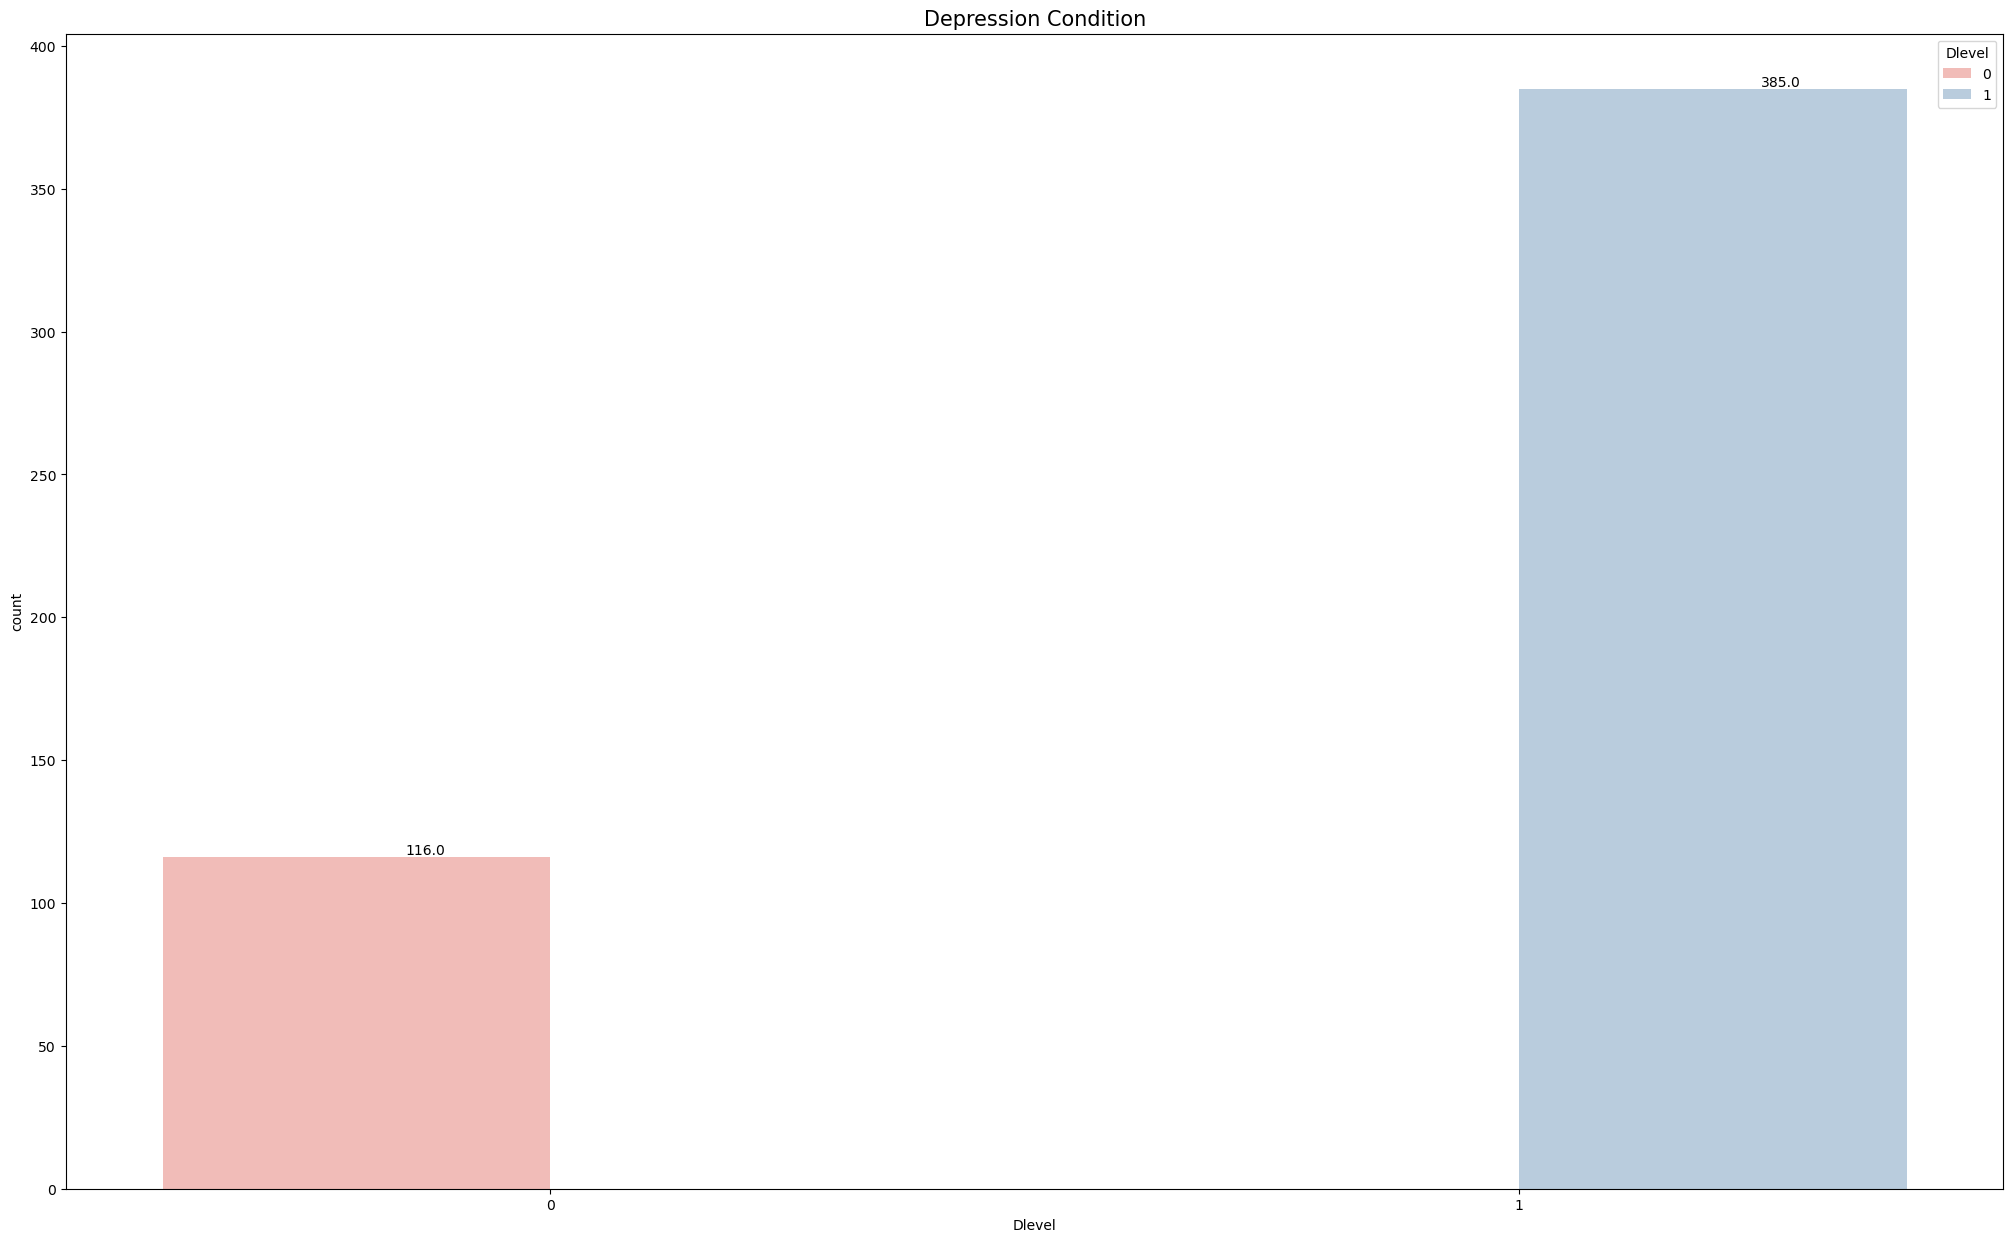

In [26]:
plt.figure(figsize=(25,15))
ax=sns.countplot(depression.sort_values('Dlevel').Dlevel,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Depression Condition',fontsize=15)


Anxiety Set

In [27]:
#defining function filter 
def filter(x):
    if x <= 9:
        return 'No'
    if x > 9:
        return 'Yes'
Anxiety['Alevel'] = Anxiety['A_Count'].apply(filter)
Anxiety.tail(5)

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
500       1    0              0                0     1      1             1   
501       0    0              1                1     2      0             0   
502       0    1              1                0     1      0             0   
503       1    1              0                0     1      0             0   
504       1    0              1                0     0      0             1   

     breakup  conflict  financialProb  ...  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  \
500        1         2              1  ...    2.0    3.0    6.0    2.0    5.0   
501        0         2              1  ...    3.0    6.0    4.0    1.0    6.0   
502        0         1              0  ...    2.0    1.0    4.0    6.0    5.0   
503        0         1              0  ...    4.0    1.0    4.0    6.0    6.0   
504        0         2              0  ...    4.0    4.0    5.0    5.0    2.0   

     TIPI8  TIPI9  TIPI10  A_Count  Alevel  
500    3.0    5.0     4.0     22.0     Yes  
501    1.0    5.0     7.0     16.0     Yes  
502    6.0    4.0     5.0     12.0     Yes  
503    2.0    6.0     2.0      2.0      No  
504    5.0    6.0     4.0      2.0      No  

[5 rows x 33 columns]

In [28]:
Anxiety['Alevel'].value_counts()

Yes    400
No     101
Name: Alevel, dtype: int64

Text(0.5, 1.0, 'Anxiety Condition')

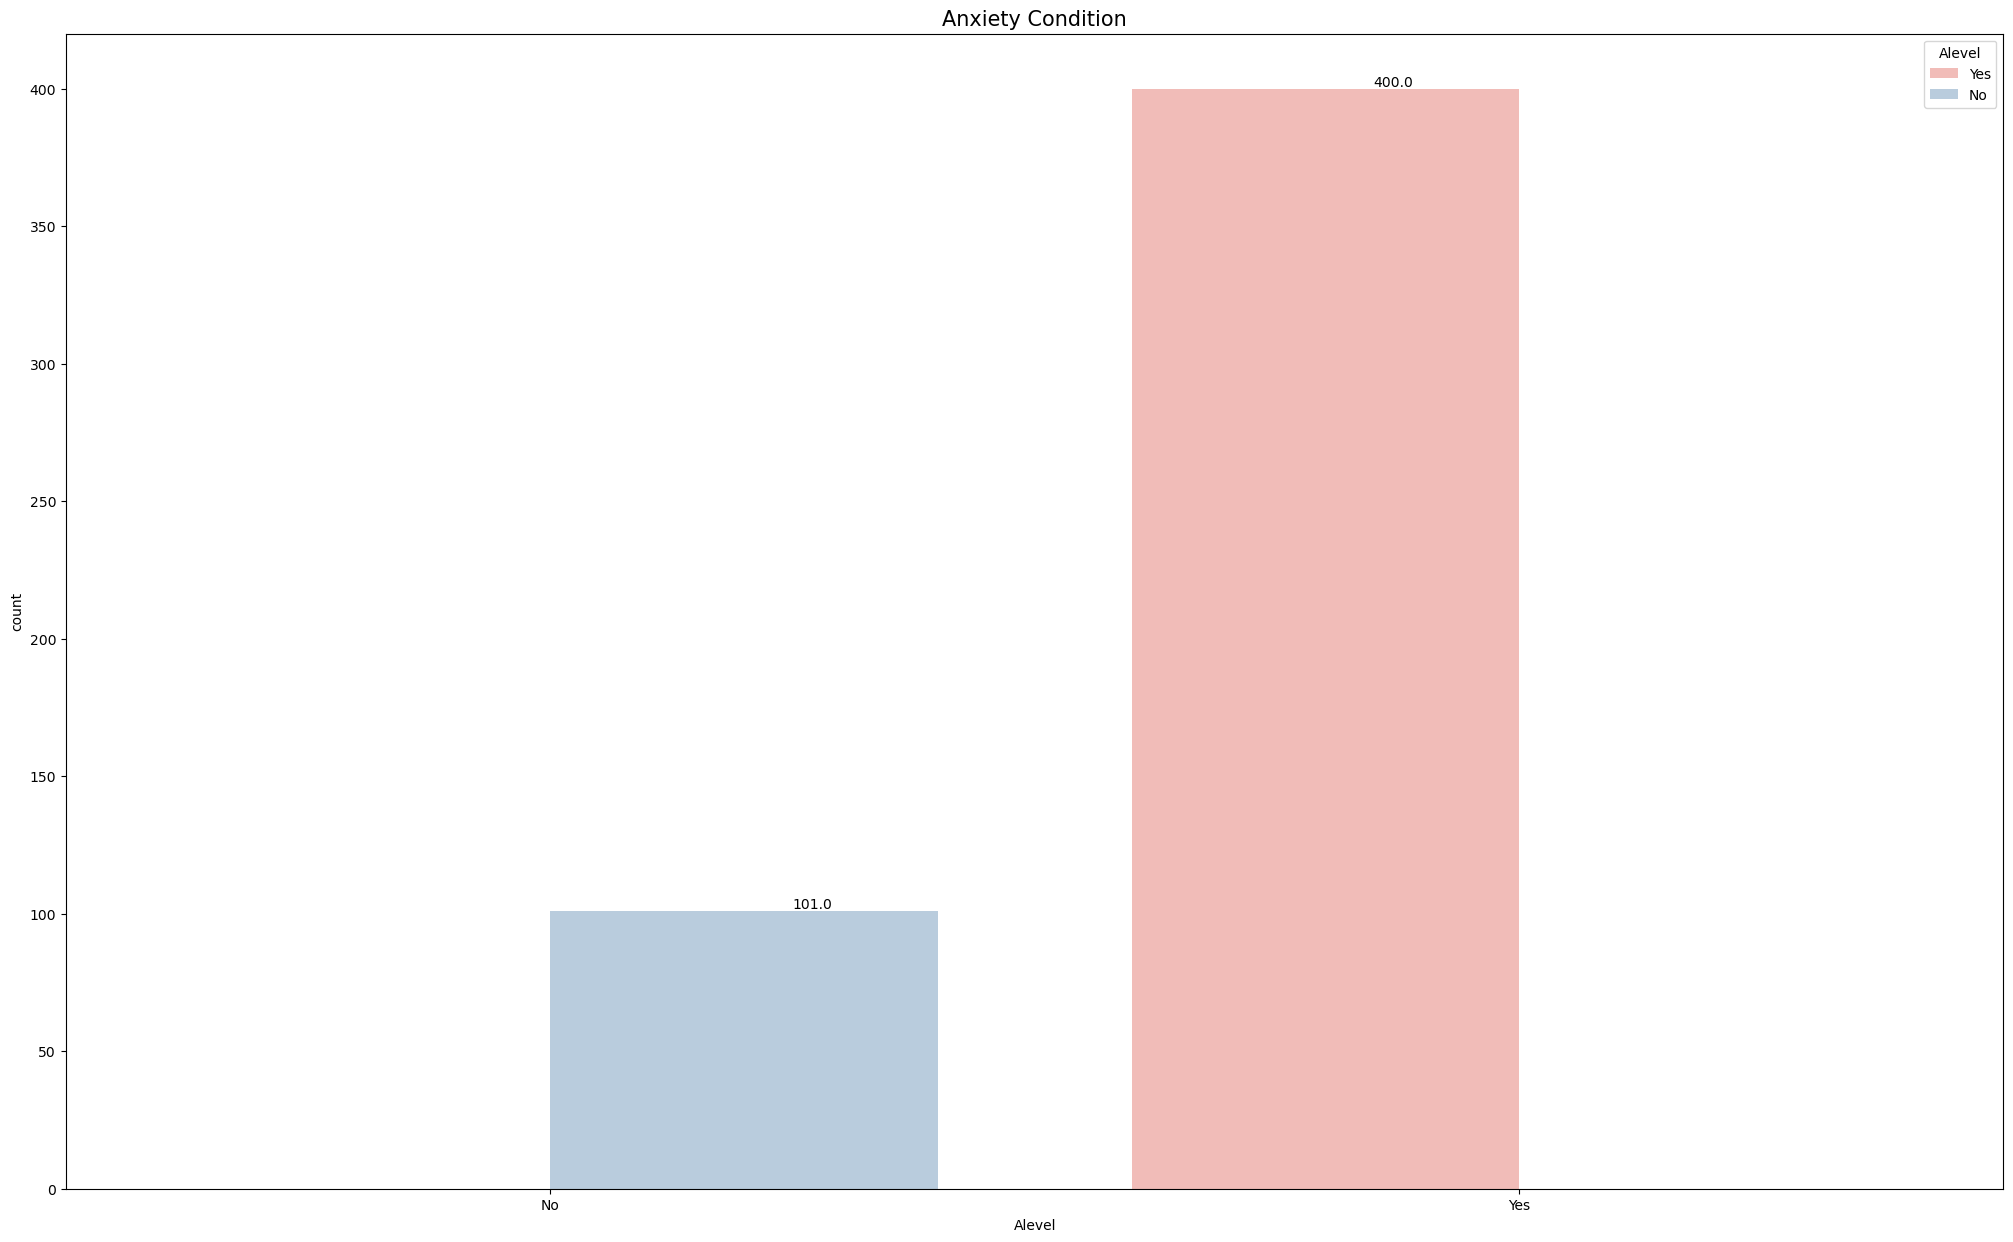

In [29]:
plt.figure(figsize=(25,15))
ax=sns.countplot(Anxiety.sort_values('Alevel').Alevel,hue=Anxiety['Alevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Anxiety Condition',fontsize=15)

Stress set

In [30]:
#defining function filter 
def filter(x):
    if x <= 18:
        return 'No'
    if x > 18:
        return 'Yes'
Stress['Slevel'] = Stress['S_Count'].apply(filter)
Stress.tail(5)

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
500       1    0              0                0     1      1             1   
501       0    0              1                1     2      0             0   
502       0    1              1                0     1      0             0   
503       1    1              0                0     1      0             0   
504       1    0              1                0     0      0             1   

     breakup  conflict  financialProb  ...  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  \
500        1         2              1  ...    2.0    3.0    6.0    2.0    5.0   
501        0         2              1  ...    3.0    6.0    4.0    1.0    6.0   
502        0         1              0  ...    2.0    1.0    4.0    6.0    5.0   
503        0         1              0  ...    4.0    1.0    4.0    6.0    6.0   
504        0         2              0  ...    4.0    4.0    5.0    5.0    2.0   

     TIPI8  TIPI9  TIPI10  S_Count  Slevel  
500    3.0    5.0     4.0     22.0     Yes  
501    1.0    5.0     7.0     20.0     Yes  
502    6.0    4.0     5.0     14.0      No  
503    2.0    6.0     2.0      8.0      No  
504    5.0    6.0     4.0     18.0      No  

[5 rows x 33 columns]

In [31]:
Stress.drop('S_Count', inplace=True, axis=1)
Stress.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...    5.0    4.0    7.0    7.0    7.0   
1        0         2              1  ...    5.0    2.0    7.0    5.0    4.0   
2        0         1              0  ...    5.0    7.0    2.0    5.0    6.0   
3        0         1              1  ...    1.0    3.0    4.0    6.0    4.0   
4        0         2              0  ...    5.0    6.0    6.0    5.0    5.0   

   TIPI7  TIPI8  TIPI9  TIPI10  Slevel  
0    7.0    5.0    1.0     1.0     Yes  
1    7.0    5.0    1.0     5.0     Yes  
2    5.0    5.0    3.0     2.0      No  
3    6.0    5.0    6.0     1.0      No  
4    5.0    5.0    3.0     3.0      No  

[5 rows x 32 columns]

In [32]:
Stress['Slevel'].value_counts()

Yes    291
No     210
Name: Slevel, dtype: int64

Text(0.5, 1.0, 'Stress Condition')

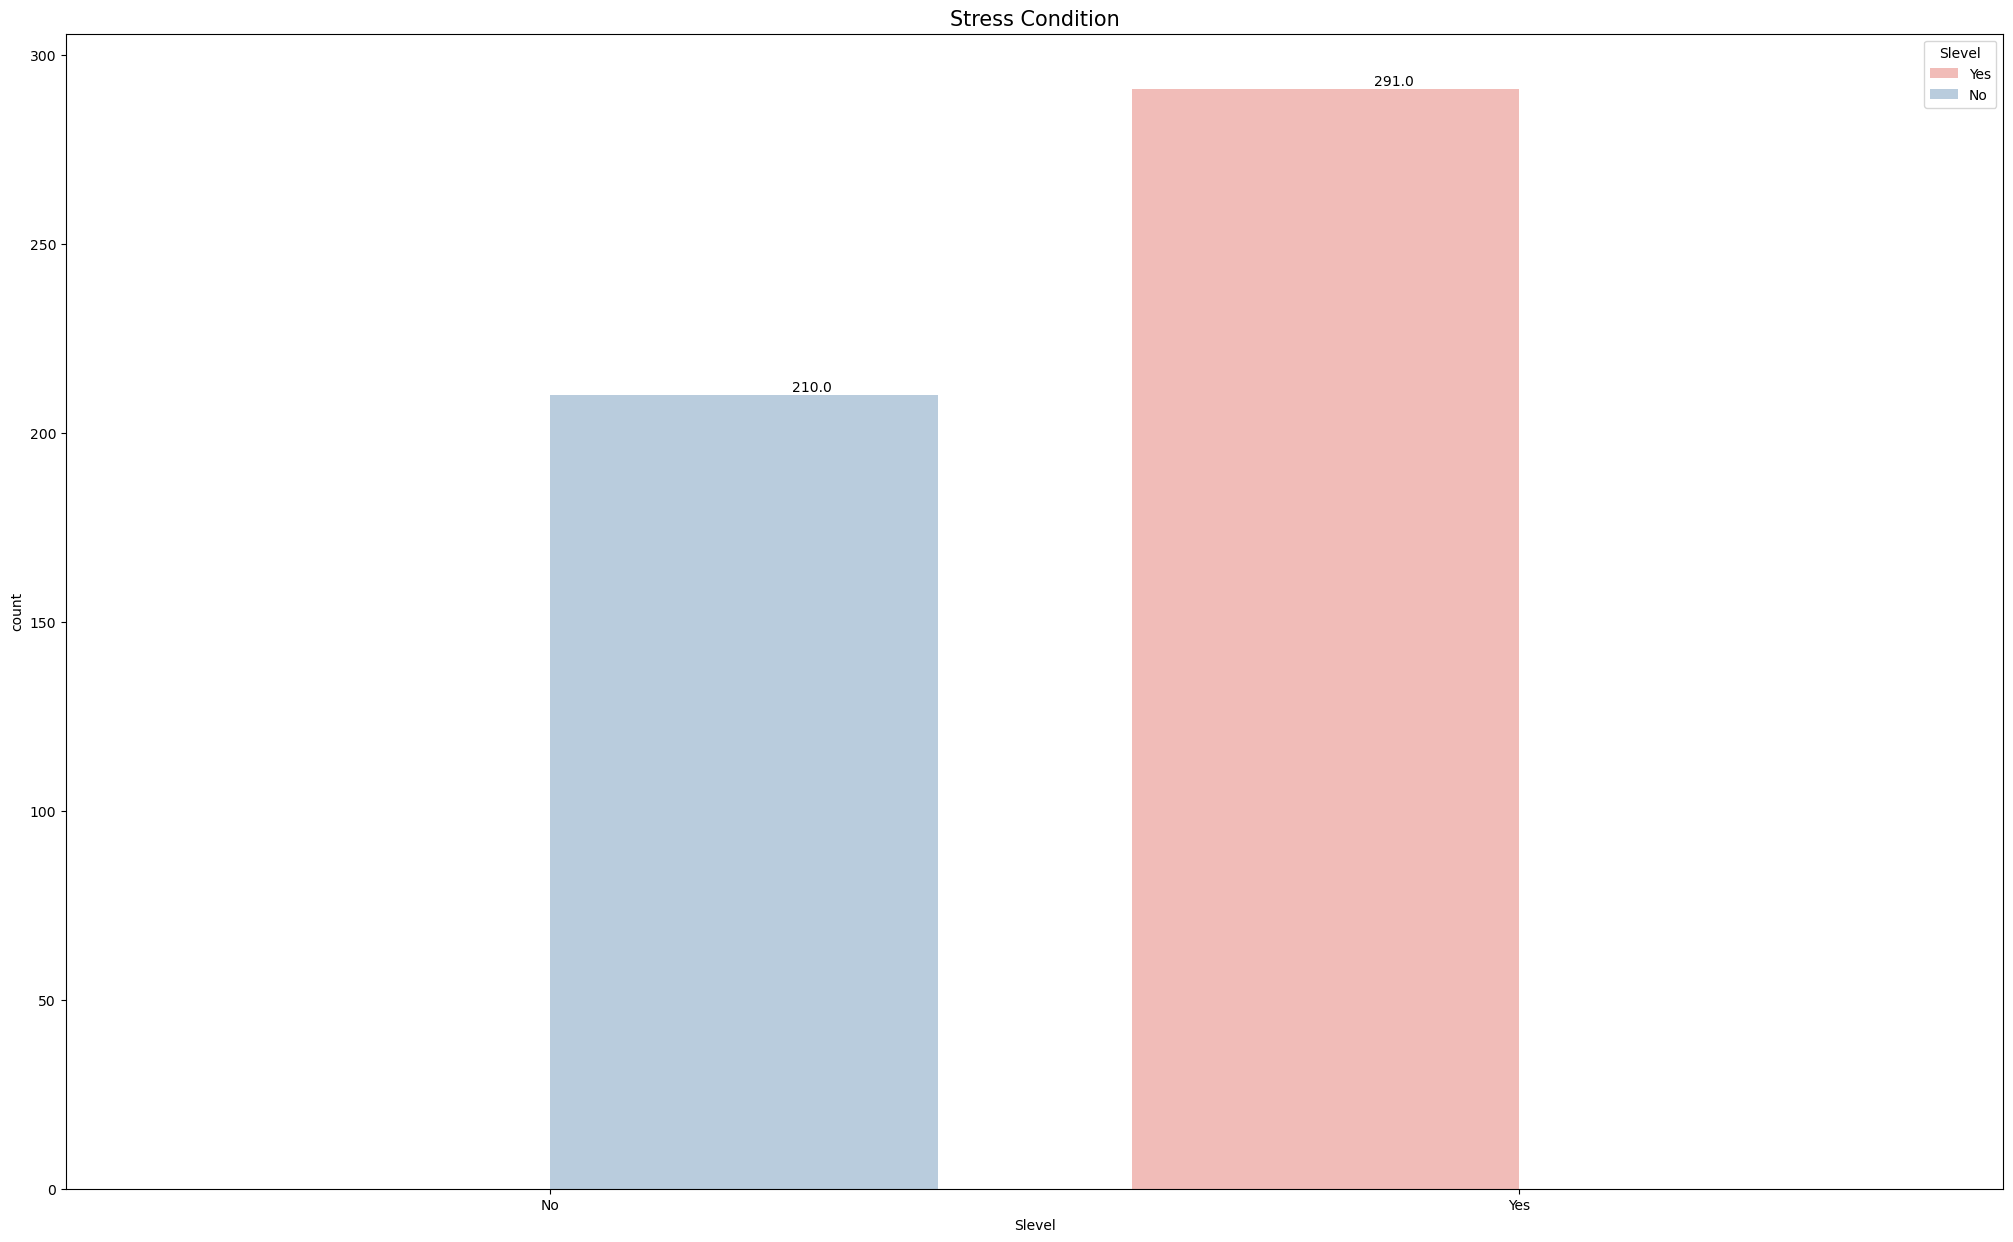

In [33]:
plt.figure(figsize=(25,15))
ax= sns.countplot(Stress.sort_values('Slevel').Slevel,hue=Stress['Slevel'],palette='Pastel1')
#print("AX Value", ax)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Stress Condition',fontsize=15)

Comparing different answers given for situations like gender, relationship,financial issues etc and comparing with their Conditions

Genders

Text(0.5, 1.0, 'Depression Condition of Different Gender')

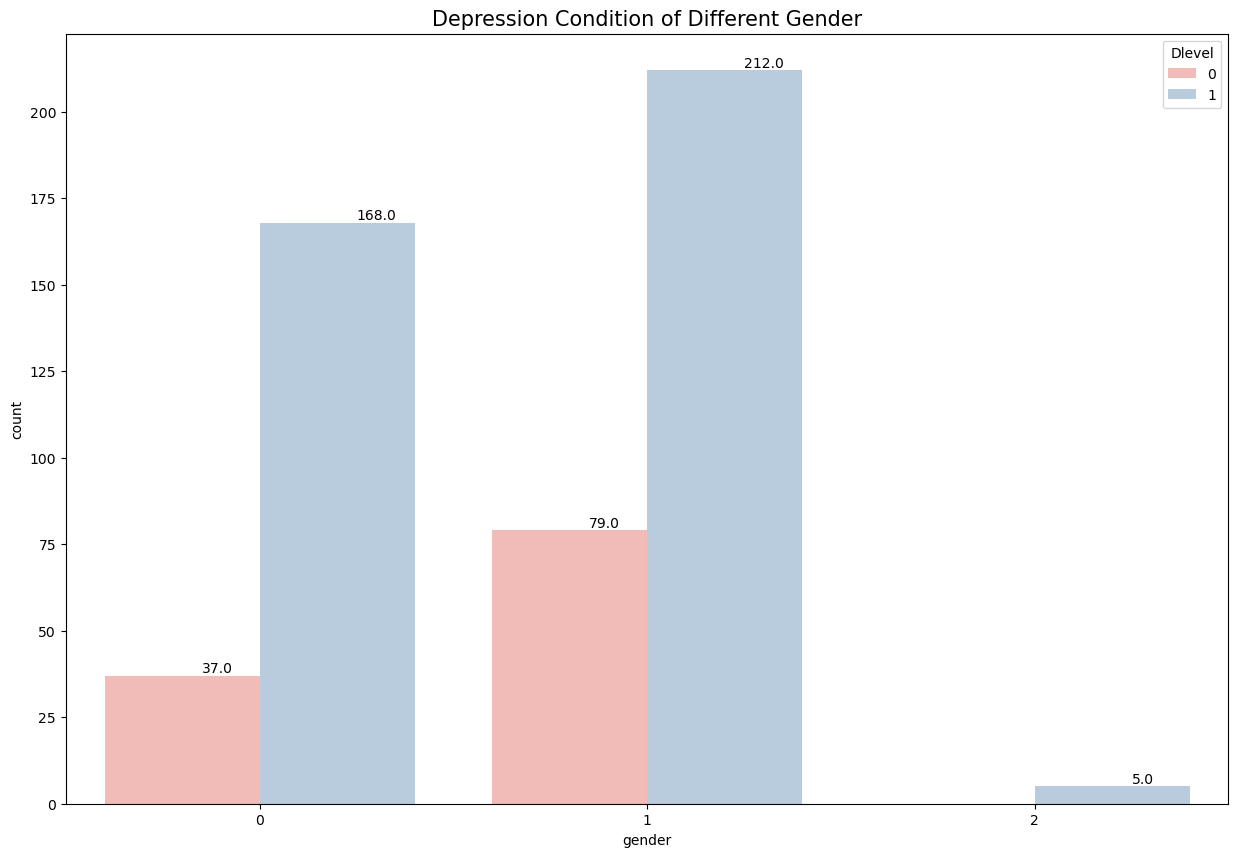

In [34]:
plt.figure(figsize=(15,10))
ax= sns.countplot(depression.sort_values('gender').gender,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Depression Condition of Different Gender',fontsize=15)

Text(0.5, 1.0, 'Stress Condition of Different Gender')

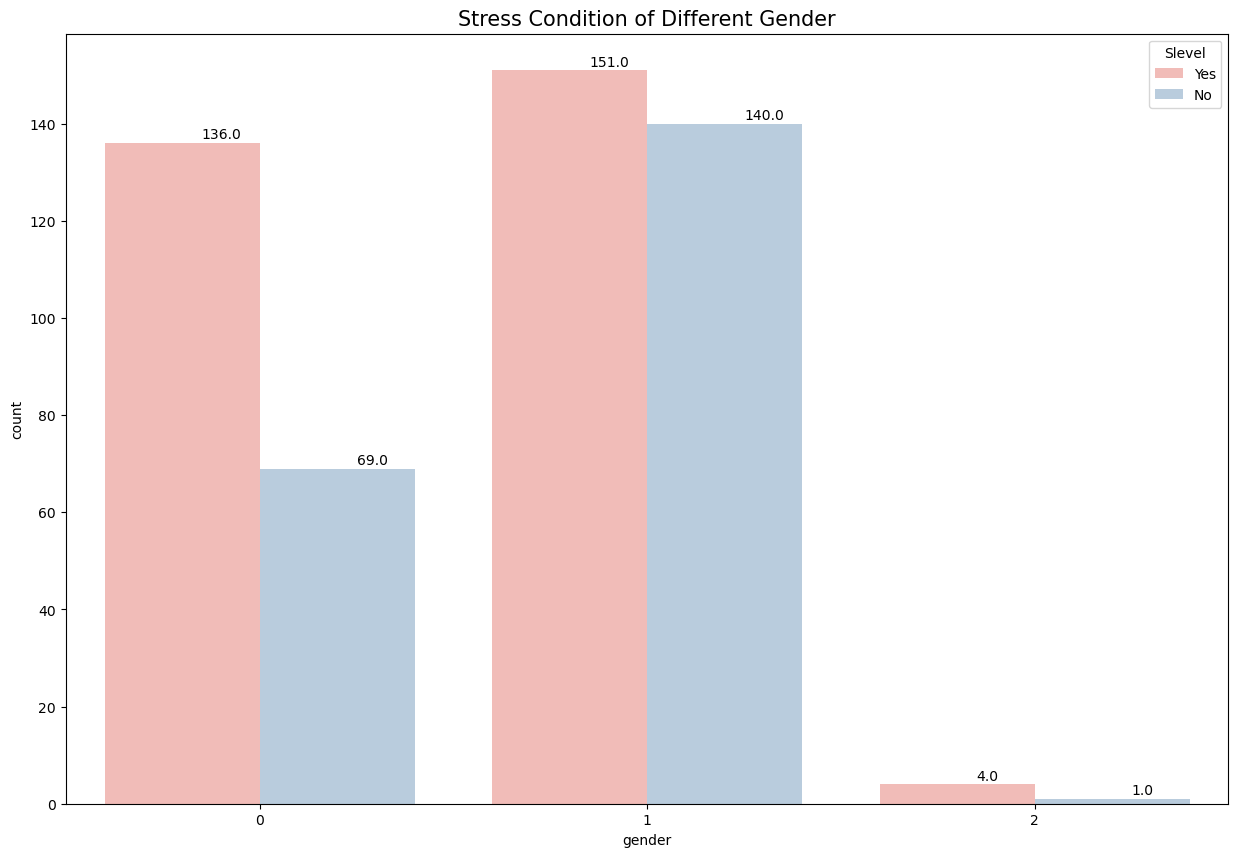

In [35]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('gender').gender,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Stress Condition of Different Gender',fontsize=15)


Data Comparison for Are you happy about your academic condition?

In [36]:
depression['acasatisfaction'].value_counts()

0    294
1    207
Name: acasatisfaction, dtype: int64

Text(0.5, 1.0, 'Are you happy about your academic condition? For Depression')

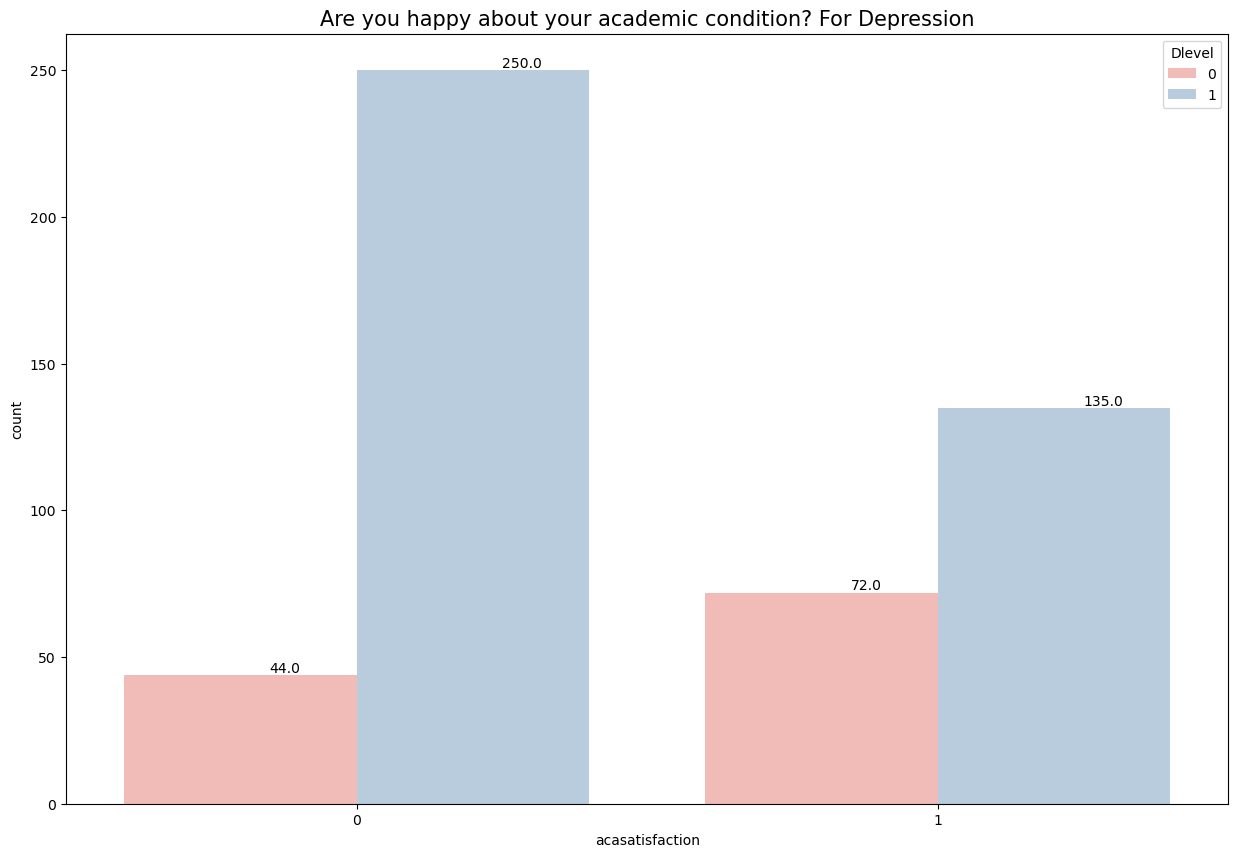

In [37]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('acasatisfaction').acasatisfaction,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you happy about your academic condition? For Depression',fontsize=15)

Text(0.5, 1.0, 'Are you happy about your academic condition?For stress')

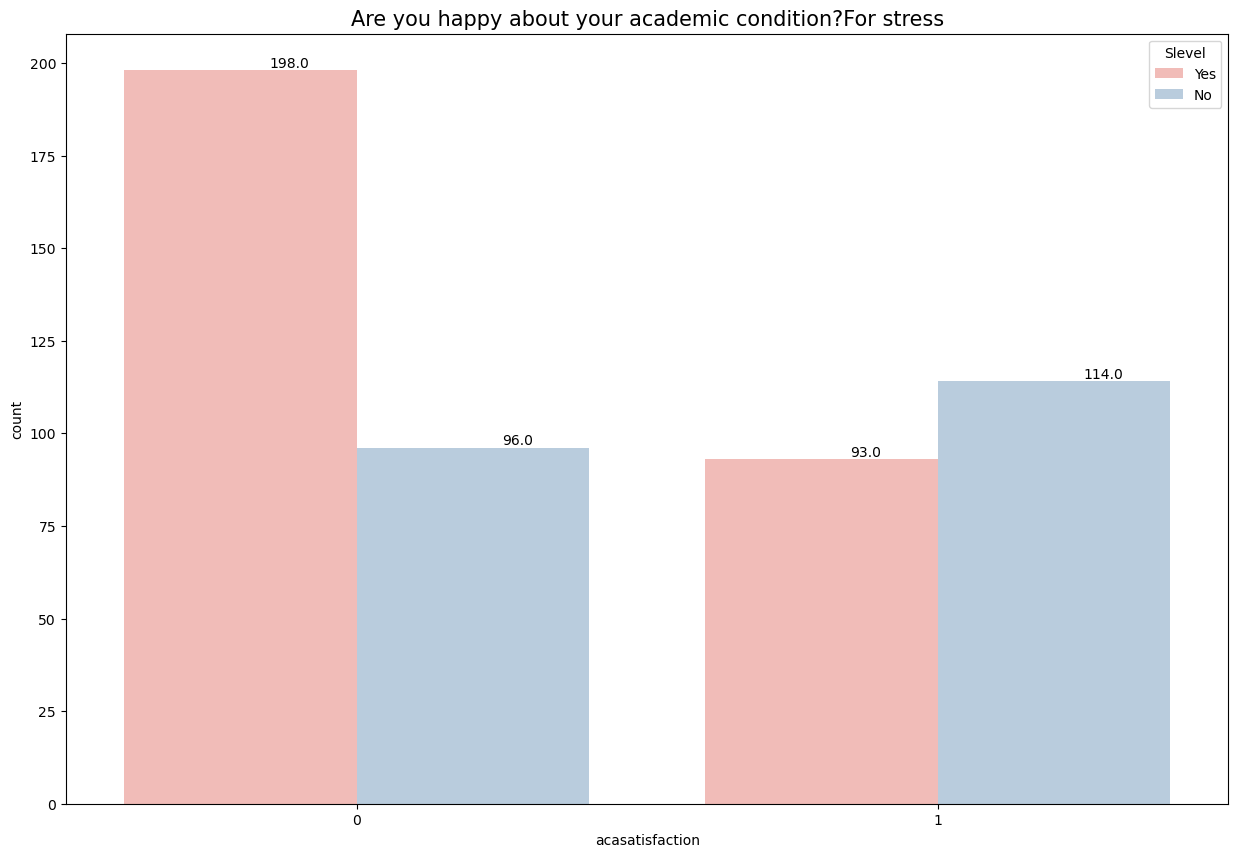

In [38]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('acasatisfaction').acasatisfaction,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you happy about your academic condition?For stress',fontsize=15)

Data Comparison for Have you ever been bullied?

In [39]:
depression['bullied'].value_counts()

1    302
0    199
Name: bullied, dtype: int64

Text(0.5, 1.0, 'Have you ever been bullied?:Depression')

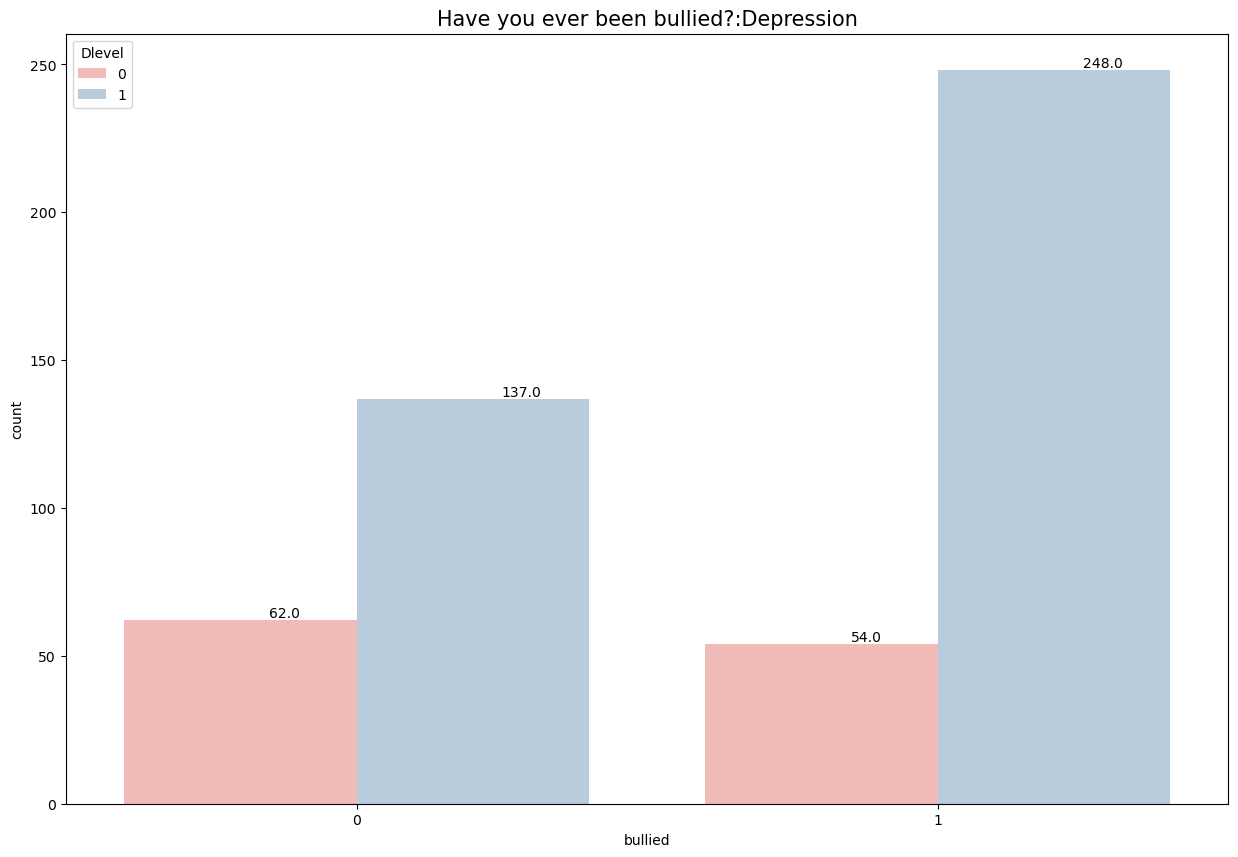

In [40]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('bullied').bullied,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Have you ever been bullied?:Depression',fontsize=15)


Text(0.5, 1.0, 'Have you ever been bullied?:Stress')

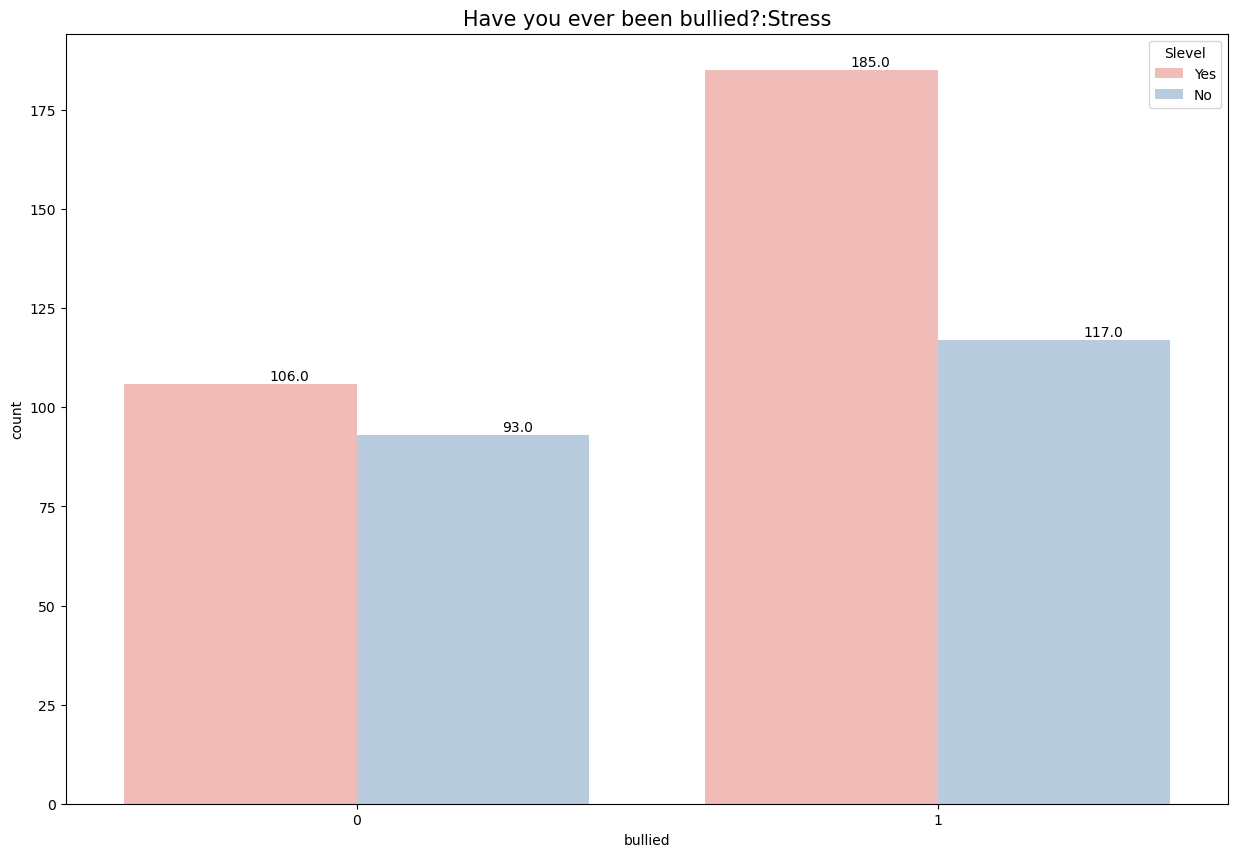

In [41]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('bullied').bullied,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Have you ever been bullied?:Stress',fontsize=15)

Data Comparison for How often do you conflict with your friend?

In [42]:
depression['conflict'].value_counts()

2    314
1    152
0     35
Name: conflict, dtype: int64

Text(0.5, 1.0, 'conflict with your friend : Depression')

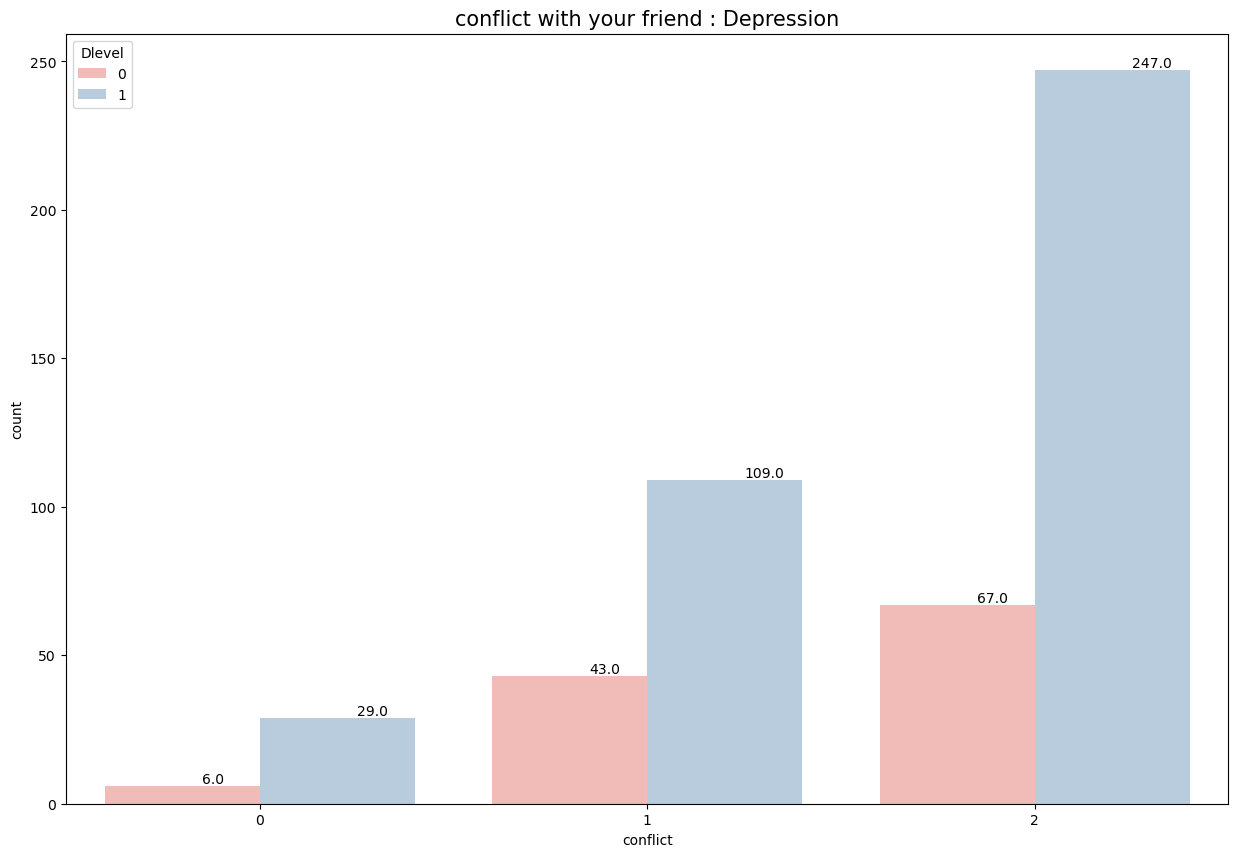

In [43]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('conflict').conflict,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('conflict with your friend : Depression',fontsize=15)

Text(0.5, 1.0, 'conflict with your friend : Stress')

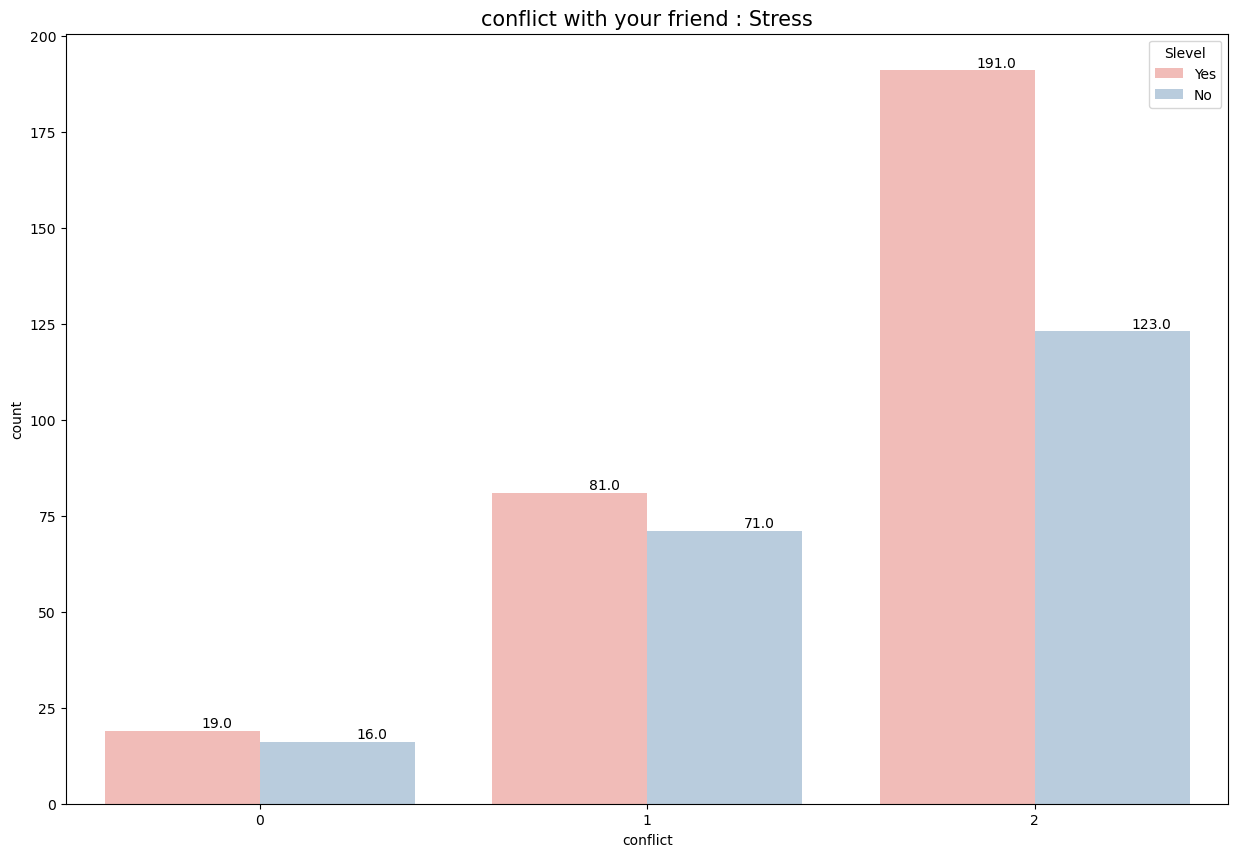

In [44]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('conflict').conflict,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('conflict with your friend : Stress',fontsize=15)

Data Comparison for Did you have a recent breakup?

In [45]:
depression['breakup'].value_counts()

0    390
1    111
Name: breakup, dtype: int64

Text(0.5, 1.0, 'Did you have a recent breakup?:Depression')

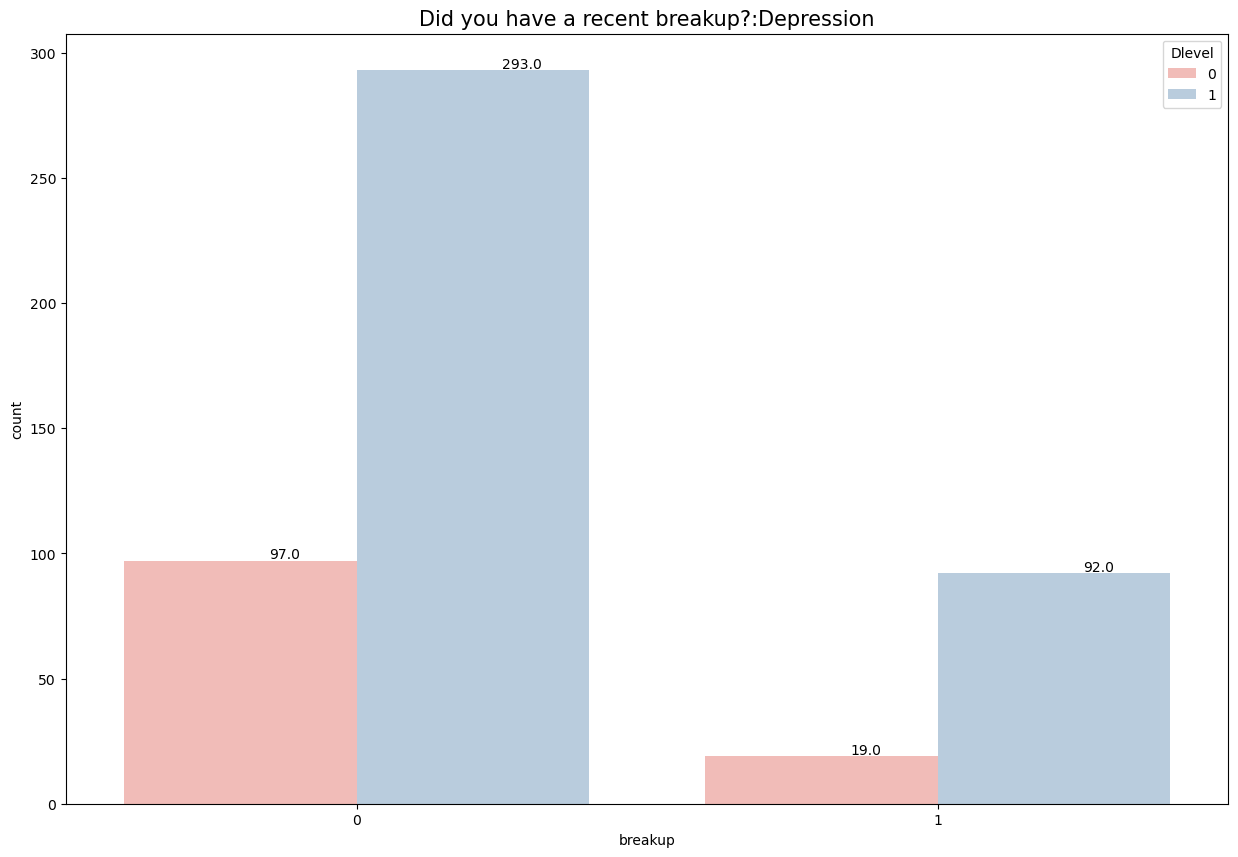

In [46]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('breakup').breakup,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Did you have a recent breakup?:Depression',fontsize=15)

Text(0.5, 1.0, 'Did you have a recent breakup? : Stress')

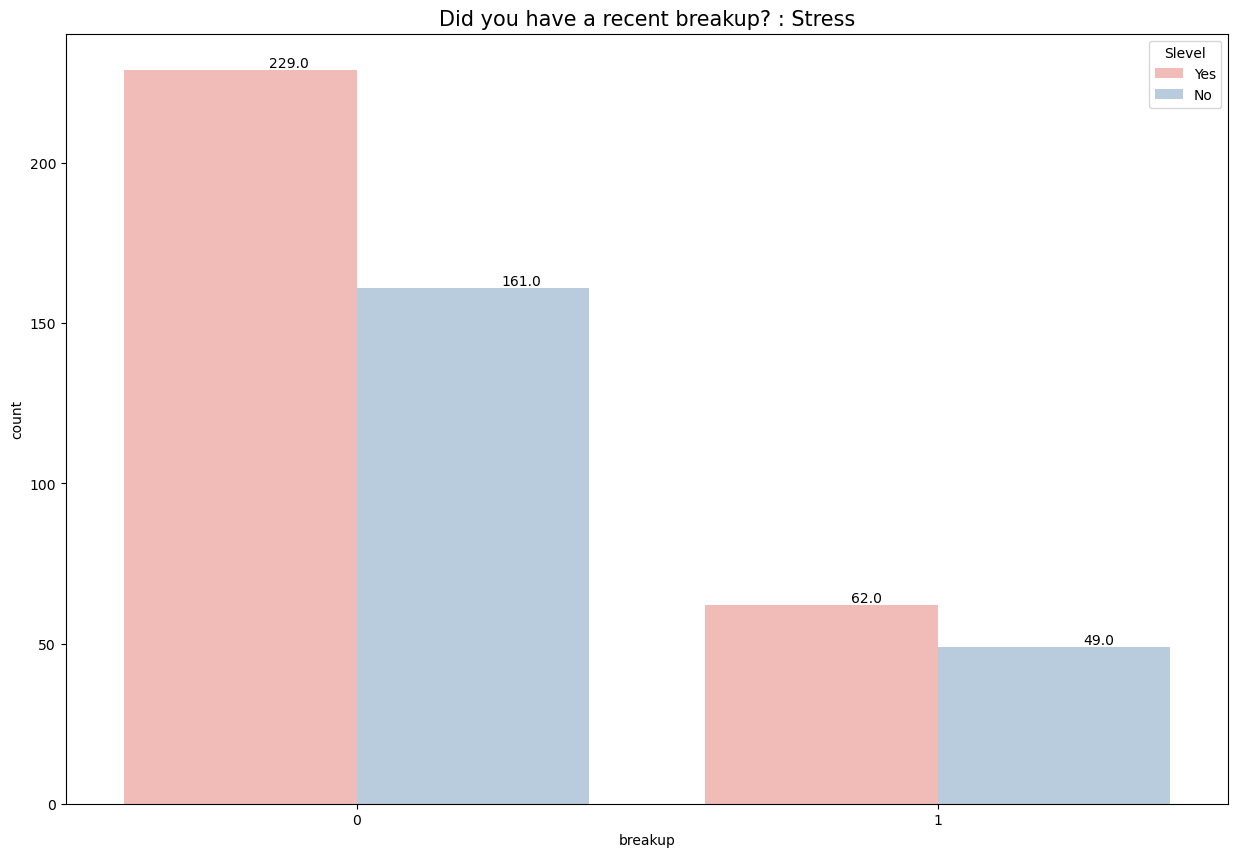

In [47]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('breakup').breakup,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Did you have a recent breakup? : Stress',fontsize=15)

Data Comparison for How many hours do you spend on social media?

In [48]:
depression['smediaT'].value_counts()

2    280
0    179
1     42
Name: smediaT, dtype: int64

Text(0.5, 1.0, 'How many hours do you spend on social media? : Depression')

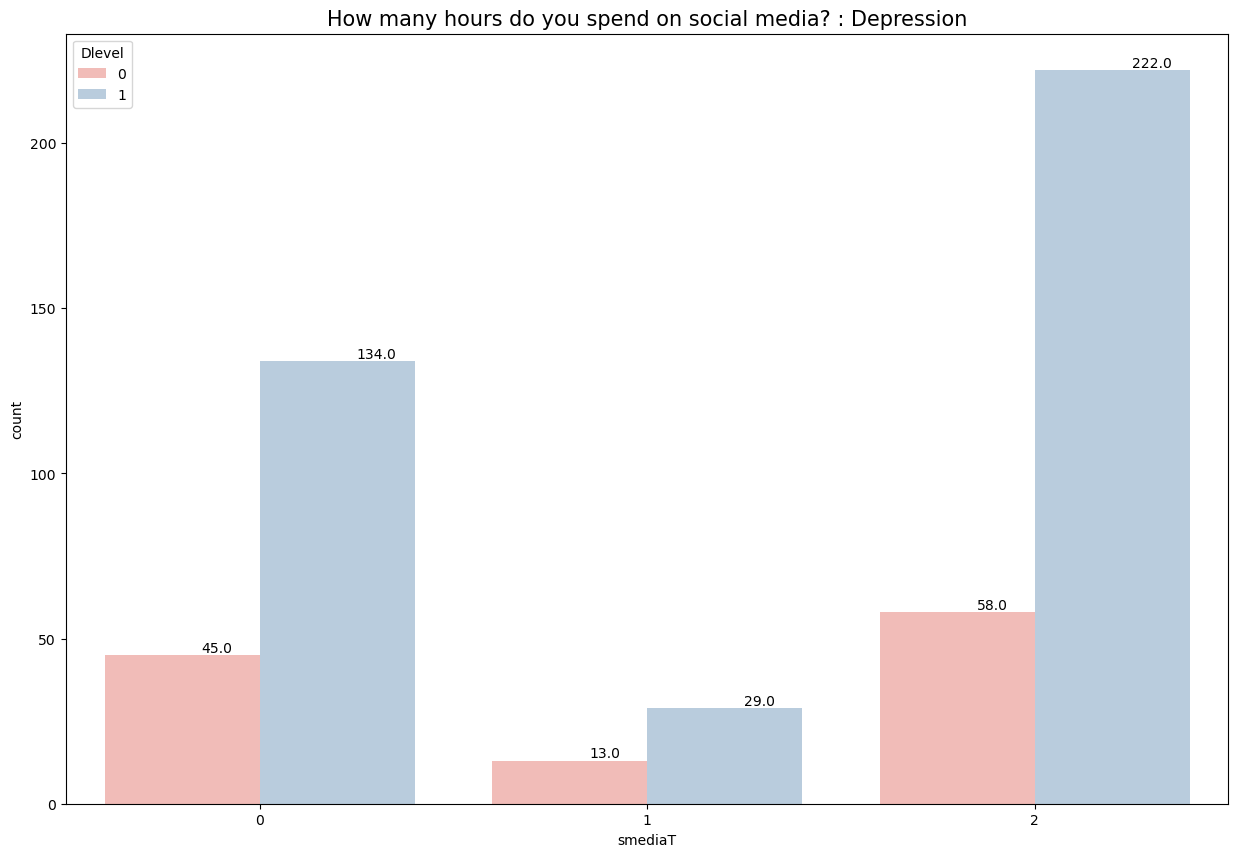

In [49]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('smediaT').smediaT,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('How many hours do you spend on social media? : Depression',fontsize=15)

Text(0.5, 1.0, 'How many hours do you spend on social media? : Stress')

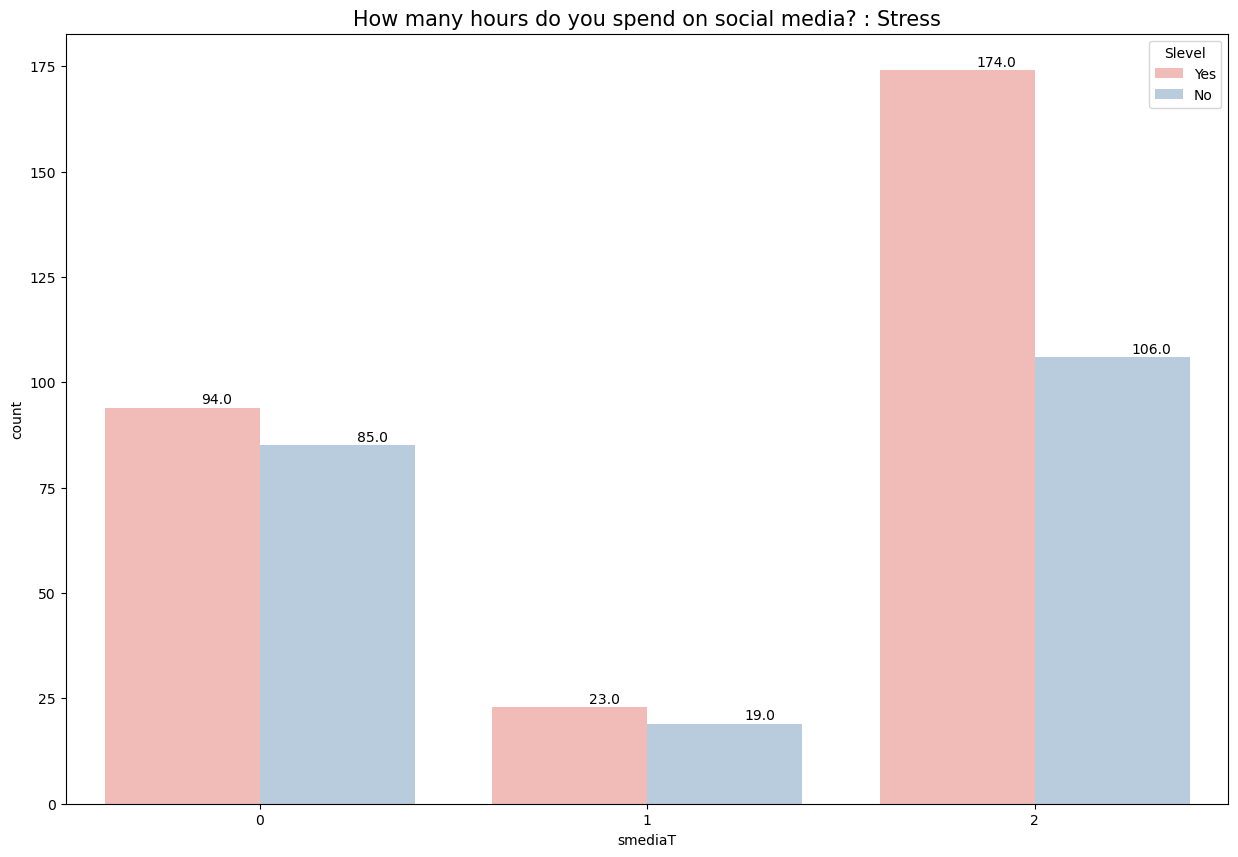

In [50]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('smediaT').smediaT,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('How many hours do you spend on social media? : Stress',fontsize=15)

Data Comparison for Violence in family?

In [51]:
depression['Violence'].value_counts()

1    217
3    187
2     59
0     38
Name: Violence, dtype: int64

Text(0.5, 1.0, 'Violence in family? :Depression')

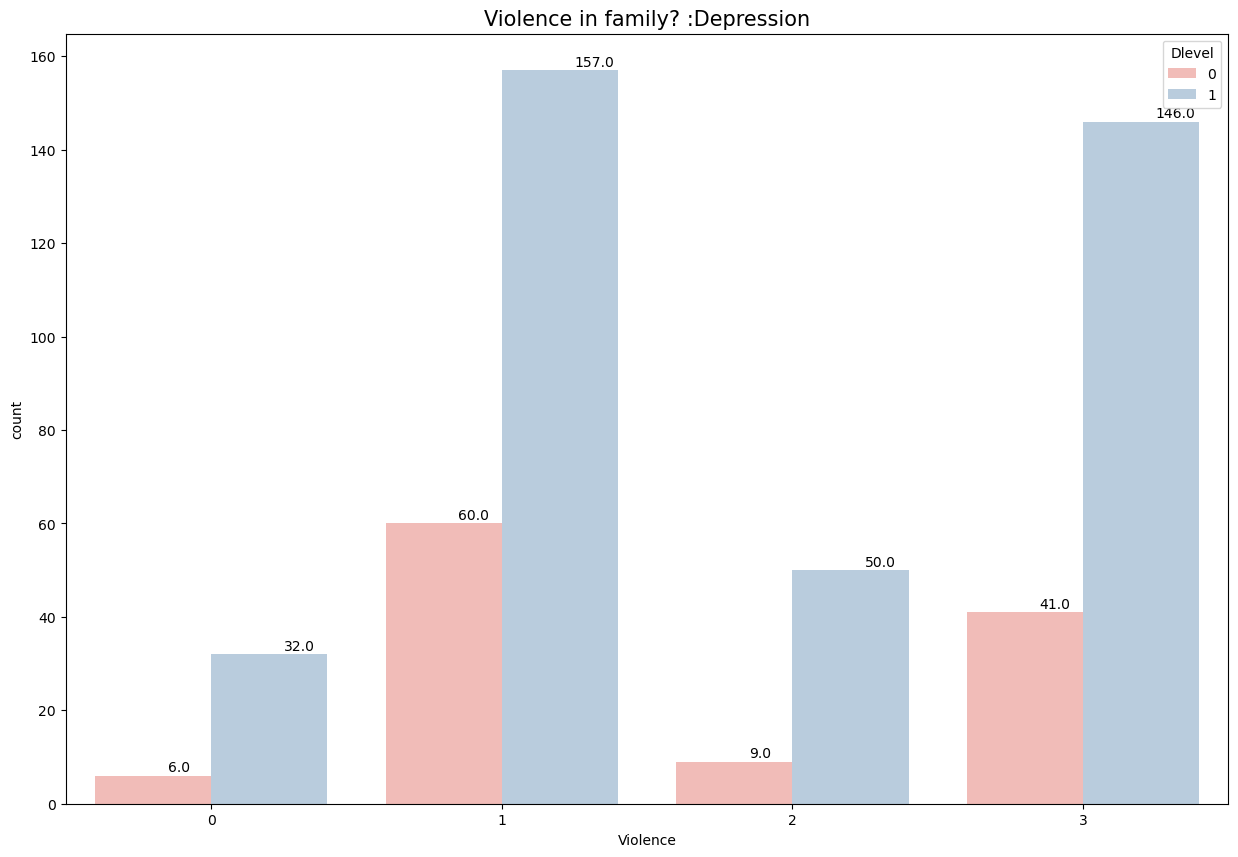

In [52]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('Violence').Violence,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Violence in family? :Depression',fontsize=15)

Text(0.5, 1.0, 'Violence in family?:Stress')

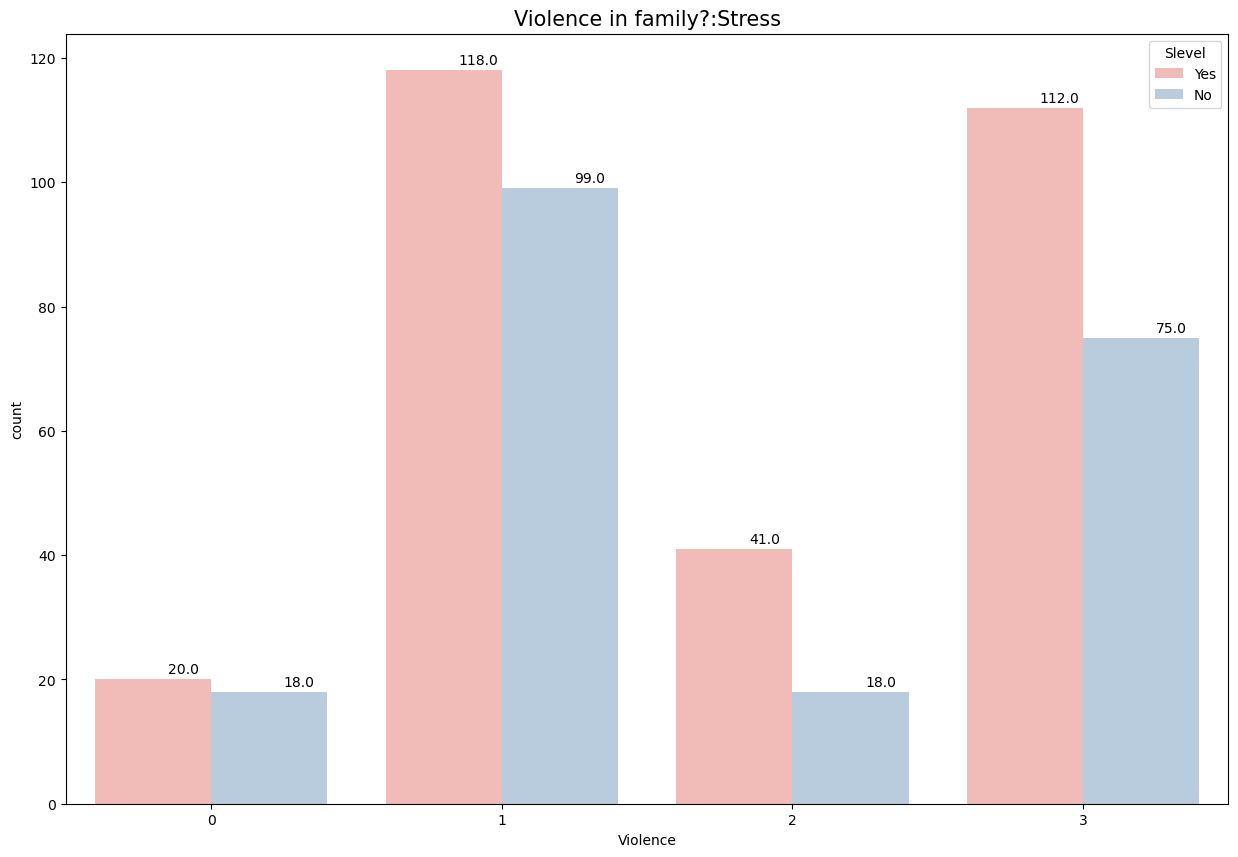

In [53]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('Violence').Violence,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Violence in family?:Stress',fontsize=15)

Data Comparison for Are you addicted to any drugs?

In [54]:
depression['drugs'].value_counts()

0    451
1     50
Name: drugs, dtype: int64

Text(0.5, 1.0, 'Are you addicted to any drugs?: depression')

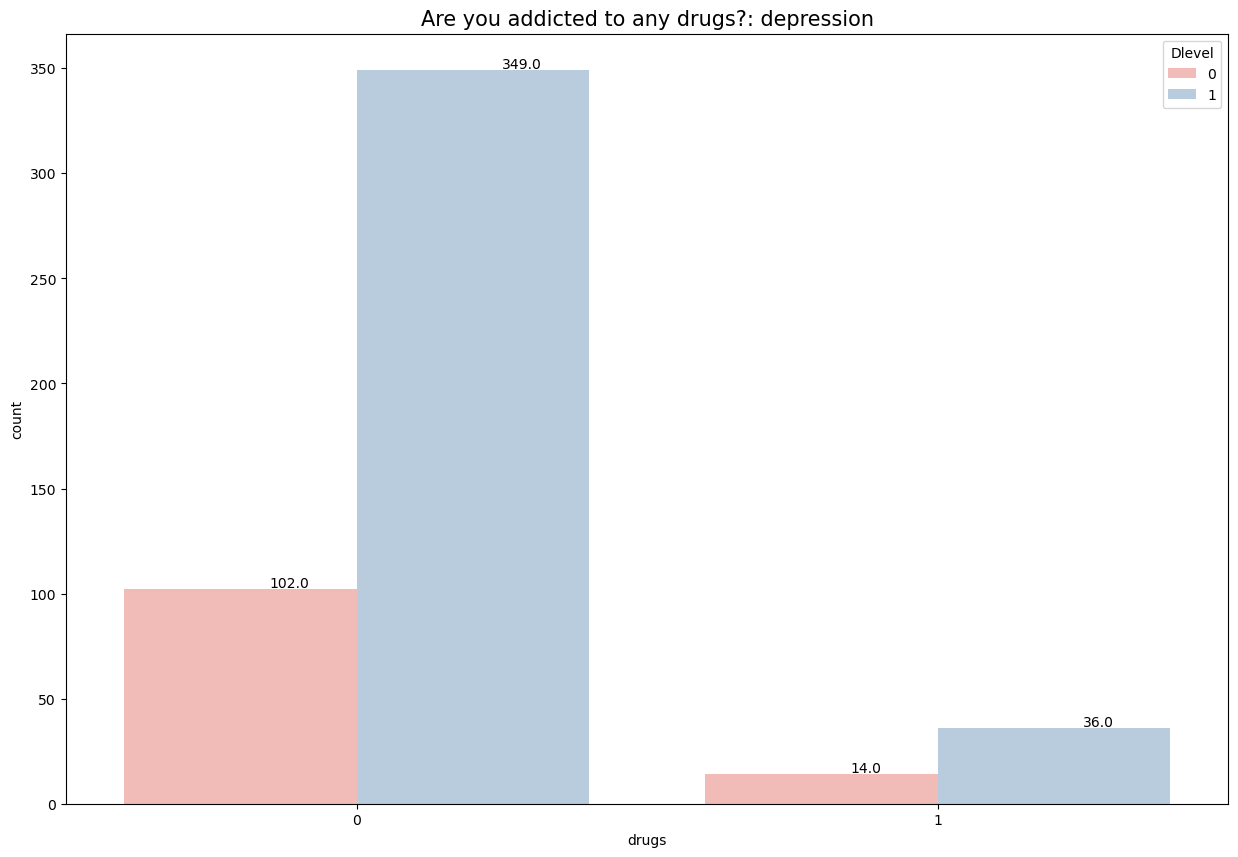

In [55]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('drugs').drugs,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you addicted to any drugs?: depression',fontsize=15)

Text(0.5, 1.0, 'Are you addicted to any drugs?: Stress')

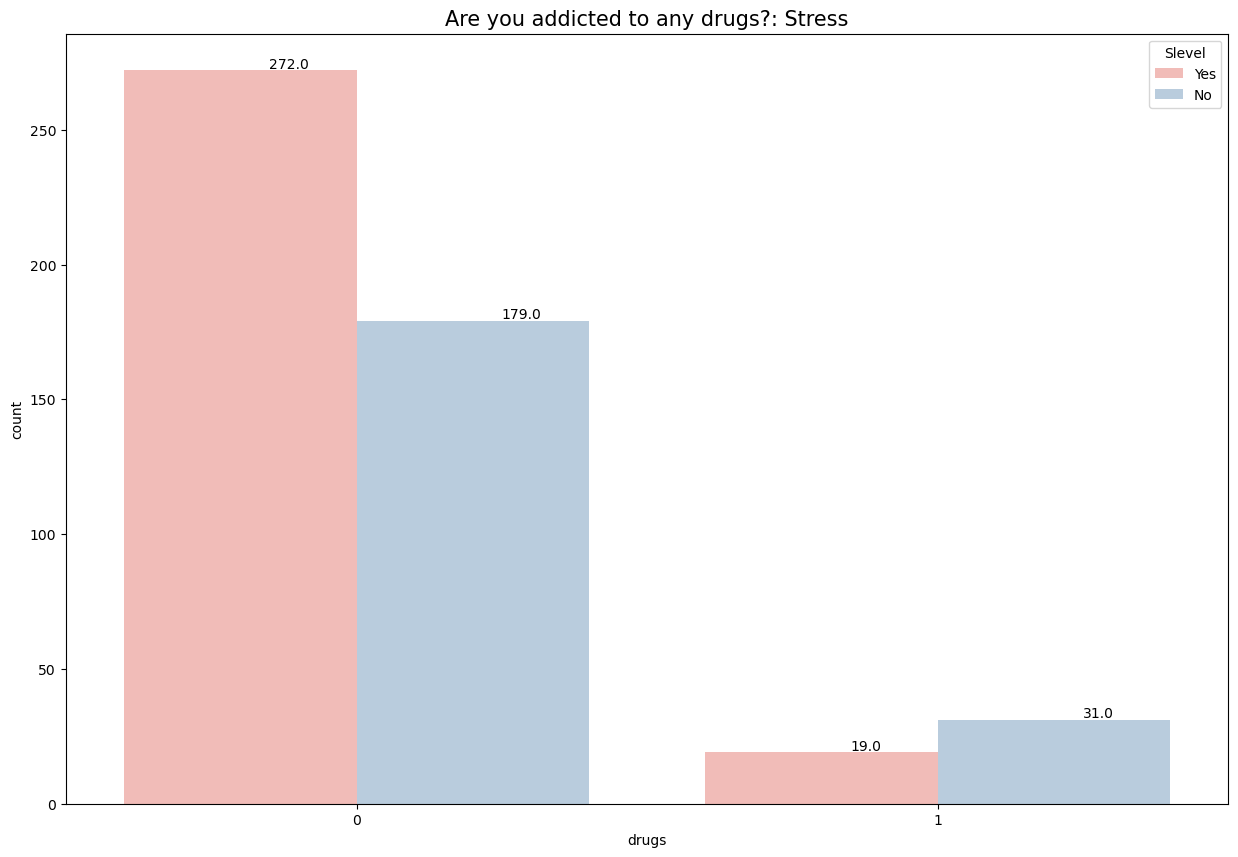

In [56]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('drugs').drugs,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you addicted to any drugs?: Stress',fontsize=15)

Data Comparison for Have you ever been sexually harassed or abused?

In [57]:
depression['abused'].value_counts()

1    322
2    141
0     38
Name: abused, dtype: int64

Text(0.5, 1.0, 'Have you ever been sexually harassed or abused? : Depression')

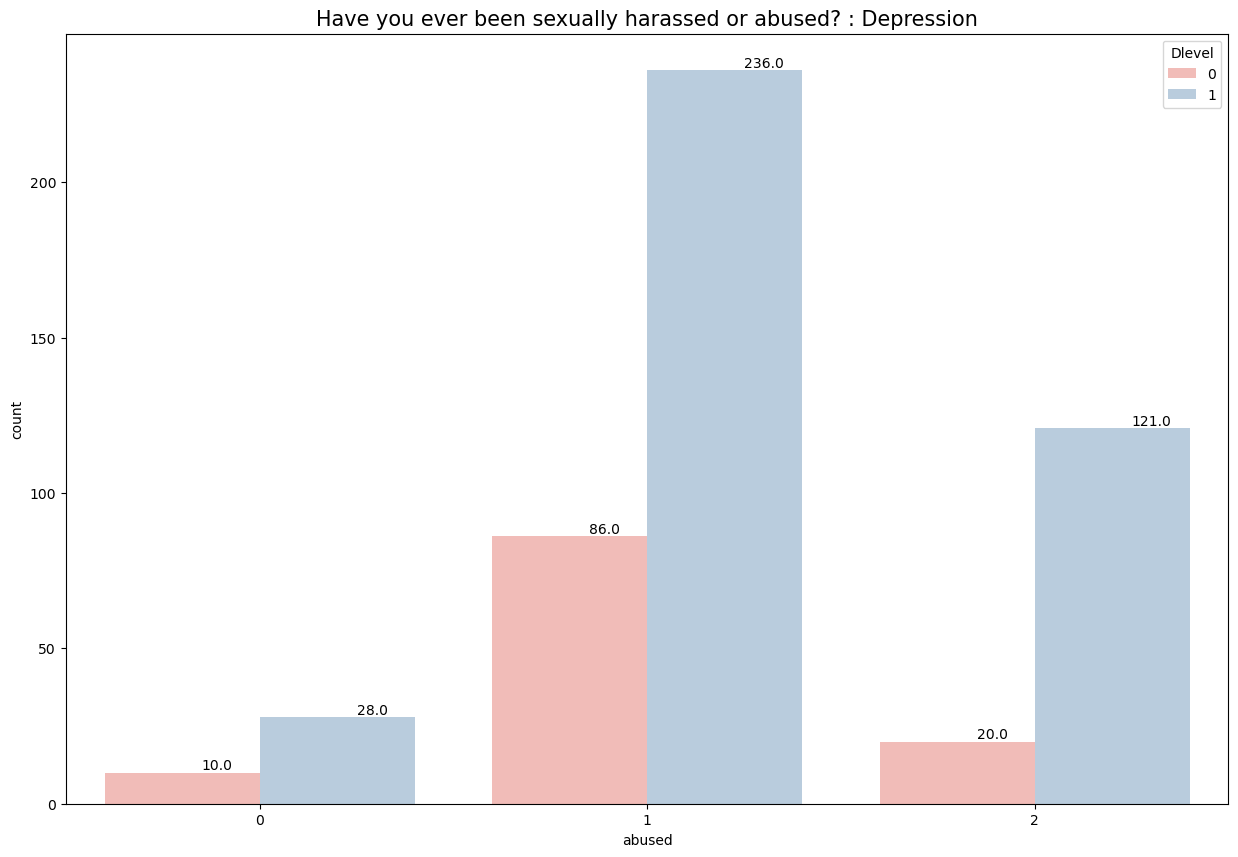

In [58]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('abused').abused,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Have you ever been sexually harassed or abused? : Depression',fontsize=15)

Text(0.5, 1.0, 'Have you ever been sexually harassed or abused? : Stress')

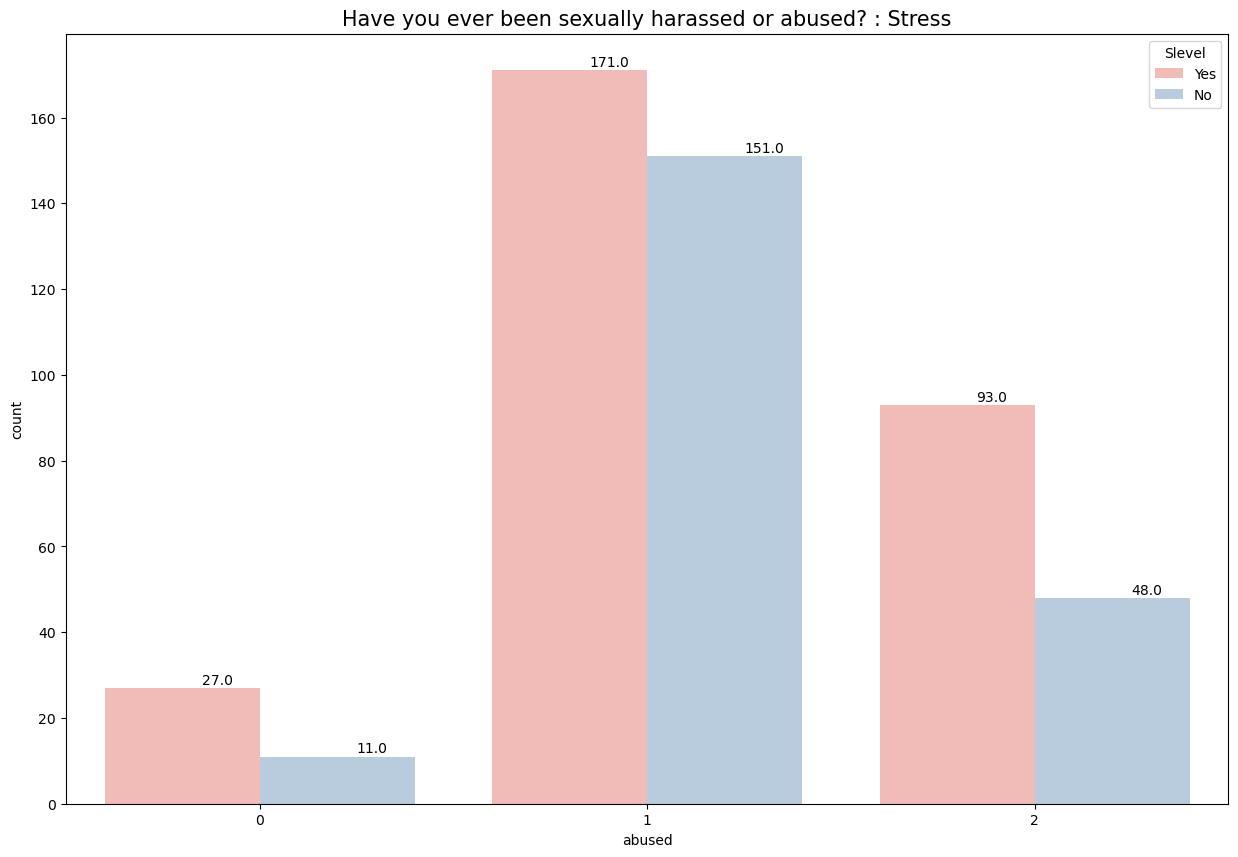

In [59]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('abused').abused,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Have you ever been sexually harassed or abused? : Stress',fontsize=15)

Data Comparison for Are you in a relationship?

In [60]:
depression['relationship'].value_counts()

0    347
1    154
Name: relationship, dtype: int64

Text(0.5, 1.0, 'Are you in a relationship? :Depression')

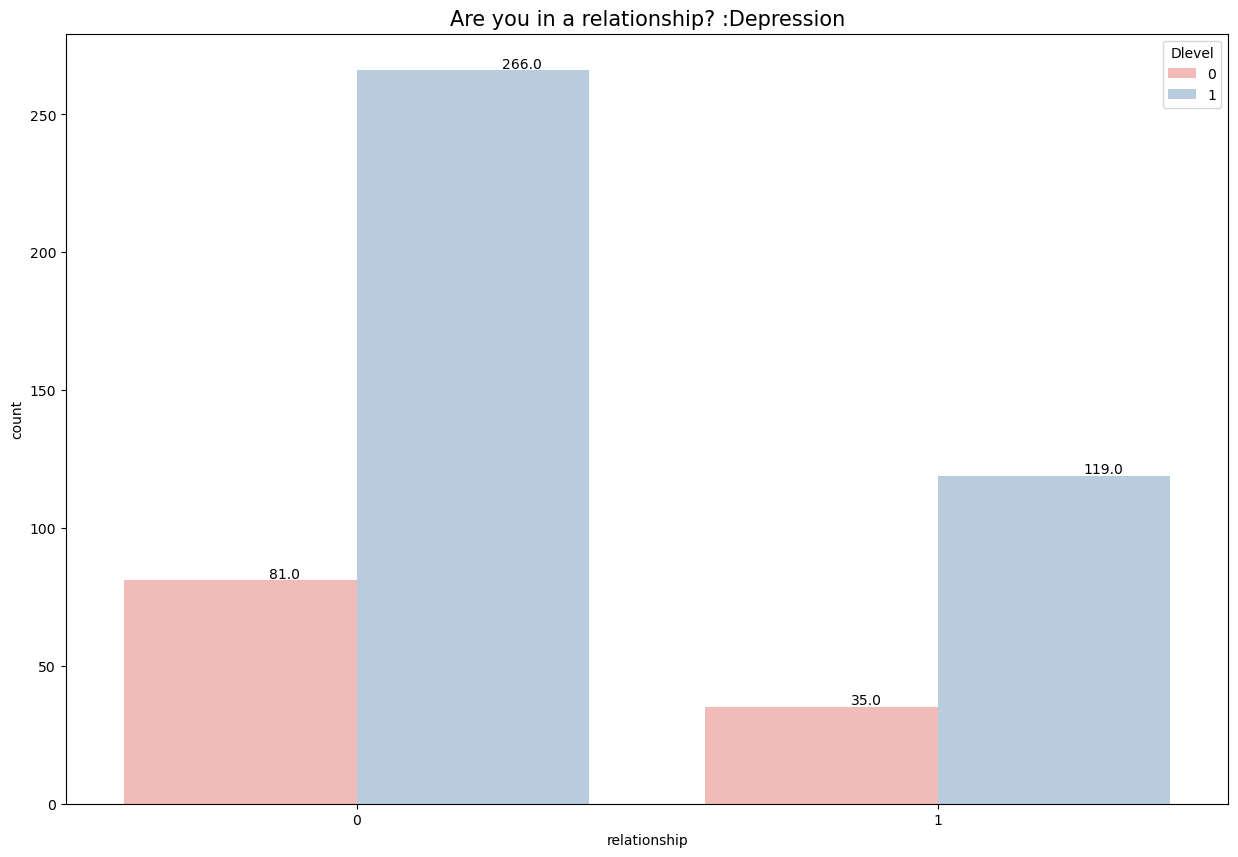

In [61]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('relationship').relationship,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you in a relationship? :Depression',fontsize=15)

Text(0.5, 1.0, 'Are you in a relationship?:Stress')

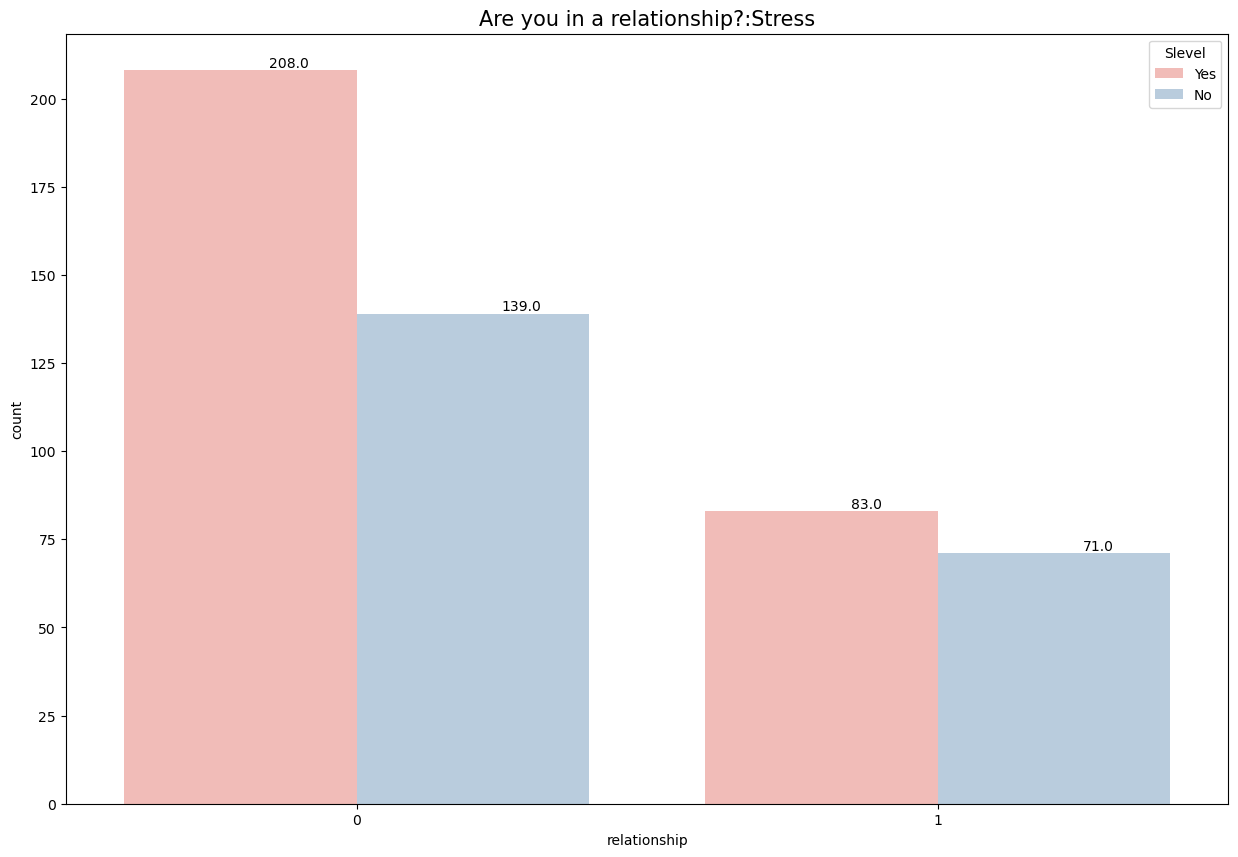

In [62]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('relationship').relationship,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you in a relationship?:Stress',fontsize=15)

Data Comparison for Do you have financial problem in your family?

In [63]:
depression['financialProb'].value_counts()

1    255
0    246
Name: financialProb, dtype: int64

Text(0.5, 1.0, 'Do you have financial problem in your family?: Depression')

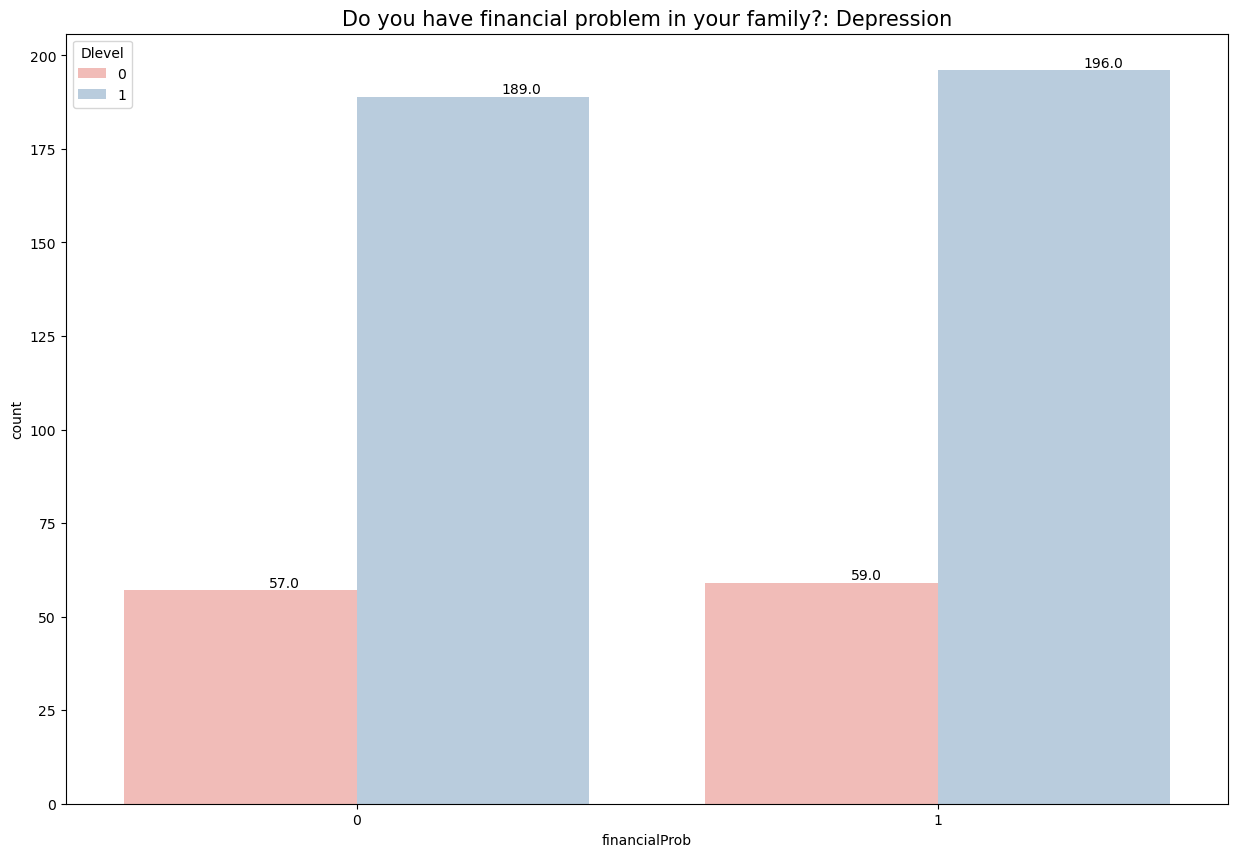

In [64]:
plt.figure(figsize=(15,10))
ax=sns.countplot(depression.sort_values('financialProb').financialProb,hue=depression['Dlevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Do you have financial problem in your family?: Depression',fontsize=15)

Text(0.5, 1.0, 'Do you have financial problem in your family?: Stress')

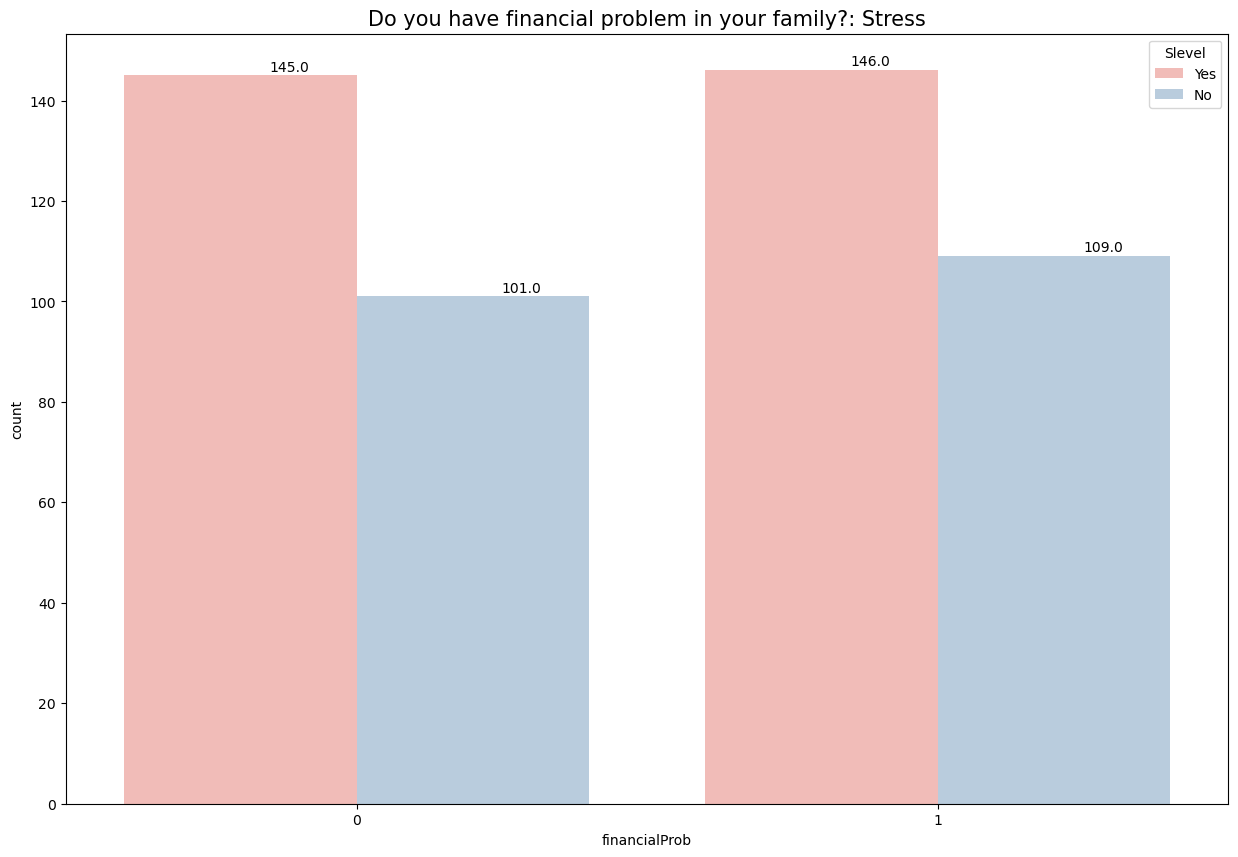

In [65]:
plt.figure(figsize=(15,10))
ax=sns.countplot(Stress.sort_values('financialProb').financialProb,hue=Stress['Slevel'],palette='Pastel1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Do you have financial problem in your family?: Stress',fontsize=15)

In [66]:
depression.corr()

gender       age  livingWfamily  acasatisfaction      CGPA  \
gender           1.000000  0.068501       0.014913        -0.074480  0.082468   
age              0.068501  1.000000       0.040621        -0.089385  0.067246   
livingWfamily    0.014913  0.040621       1.000000         0.083447  0.010279   
acasatisfaction -0.074480 -0.089385       0.083447         1.000000  0.159159   
CGPA             0.082468  0.067246       0.010279         0.159159  1.000000   
drugs            0.038673 -0.068343      -0.058169         0.031664  0.008526   
relationship    -0.106283 -0.007056      -0.015956         0.029617 -0.024743   
breakup         -0.053641  0.019578       0.066686         0.098952  0.004624   
conflict        -0.022820 -0.021429      -0.046258        -0.060480  0.032030   
financialProb   -0.087761  0.015595       0.051198         0.061955  0.050302   
Violence        -0.069499 -0.043468       0.082439        -0.004728 -0.077337   
bullied         -0.115572 -0.056573      -0.081692        -0.138995  0.014262   
abused          -0.208491  0.027028      -0.008003         0.003200 -0.017452   
smediaT          0.022262  0.030657       0.035222        -0.046487 -0.075158   
Q3A             -0.139712 -0.012953      -0.040441        -0.127134 -0.000104   
Q5A             -0.080257  0.028077       0.007570        -0.244488  0.010909   
Q10A            -0.121126 -0.037106      -0.072407        -0.315836 -0.065439   
Q13A            -0.098608  0.018034      -0.084112        -0.278099 -0.048402   
Q16A            -0.115631 -0.019951      -0.060989        -0.203620 -0.091214   
Q17A            -0.099938 -0.032676      -0.124665        -0.263493 -0.035237   
Q21A            -0.078371 -0.027410      -0.100814        -0.261776 -0.089171   
TIPI1            0.032395  0.093970      -0.026747        -0.021808  0.038990   
TIPI2           -0.118909 -0.020695       0.080653        -0.019356 -0.028128   
TIPI3           -0.032438  0.018670       0.080599        -0.001156  0.045233   
TIPI4           -0.131188 -0.065562       0.002235        -0.088267 -0.004730   
TIPI5            0.062566  0.088431       0.053589        -0.040183  0.005210   
TIPI6           -0.013074  0.038000       0.028415        -0.081091 -0.023508   
TIPI7            0.024236  0.001546      -0.023960        -0.067862  0.048447   
TIPI8           -0.092266  0.029698      -0.047085        -0.040118 -0.059804   
TIPI9            0.052730  0.017676      -0.014820         0.067332  0.034799   
TIPI10          -0.125938  0.003382      -0.037117        -0.030161 -0.078637   
Dlevel          -0.086407 -0.015812      -0.048895        -0.231328 -0.056401   

                    drugs  relationship   breakup  conflict  financialProb  \
gender           0.038673     -0.106283 -0.053641 -0.022820      -0.087761   
age             -0.068343     -0.007056  0.019578 -0.021429       0.015595   
livingWfamily   -0.058169     -0.015956  0.066686 -0.046258       0.051198   
acasatisfaction  0.031664      0.029617  0.098952 -0.060480       0.061955   
CGPA             0.008526     -0.024743  0.004624  0.032030       0.050302   
drugs            1.000000      0.254454  0.175137 -0.159009       0.073942   
relationship     0.254454      1.000000  0.092500 -0.040084       0.100522   
breakup          0.175137      0.092500  1.000000 -0.029489       0.197117   
conflict        -0.159009     -0.040084 -0.029489  1.000000      -0.000038   
financialProb    0.073942      0.100522  0.197117 -0.000038       1.000000   
Violence         0.023094      0.010827  0.058146  0.093427       0.061717   
bullied          0.052536      0.089906  0.108928  0.018506       0.124740   
abused           0.032279      0.133641  0.052918  0.003665       0.125022   
smediaT         -0.000568     -0.000212  0.003199 -0.028293      -0.048675   
Q3A              0.004459      0.047464  0.119399  0.067090       0.121234   
Q5A             -0.075905     -0.052008  0.055989  0.044739      -0.007255   
Q10A            -0.

<AxesSubplot:>

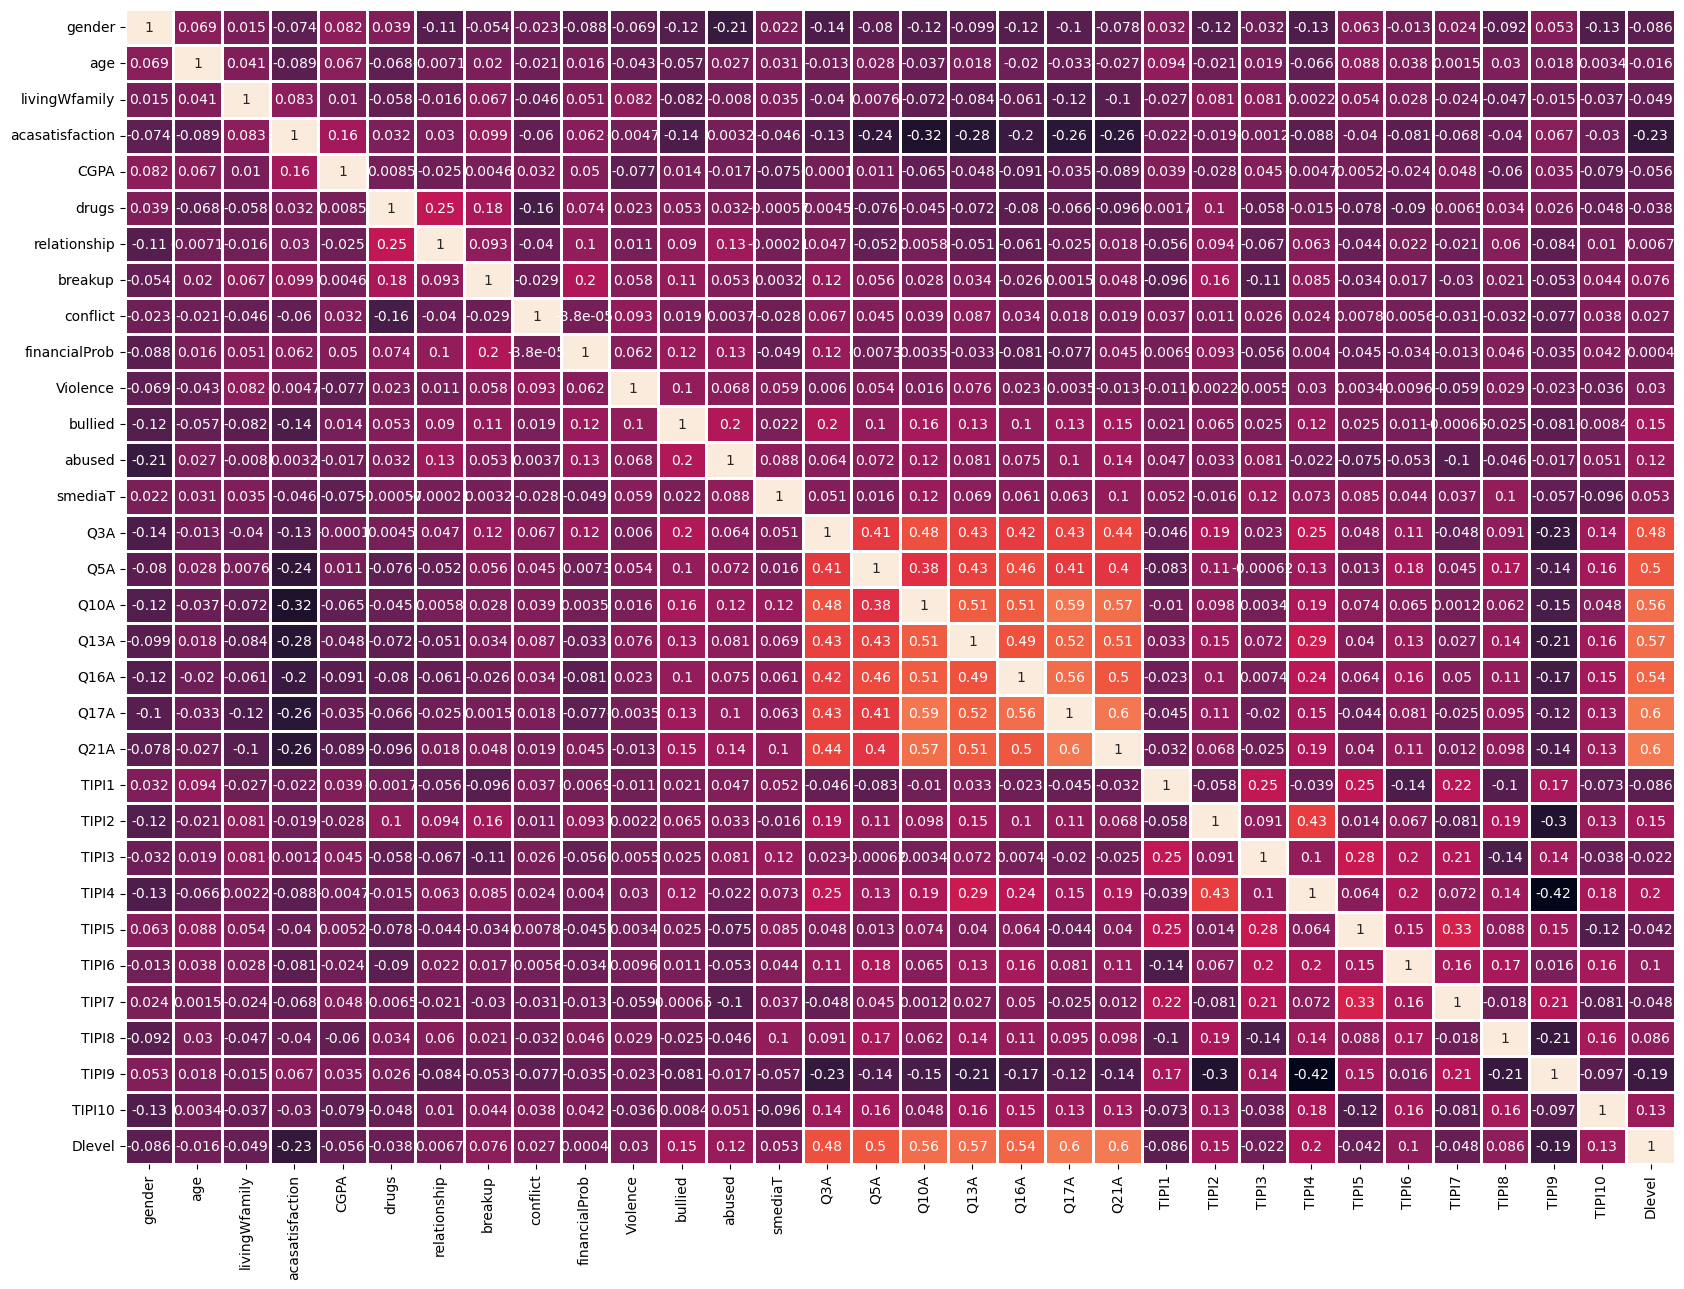

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(depression.corr(), annot=True, annot_kws={"size": 10}, linewidths=2, linecolor='white', cbar=False)

**Depression**

In [68]:
# split target from depression dataset
target = depression['Dlevel']
depression.drop('Dlevel', inplace=True, axis=1) # drop target

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(depression, target, test_size=.2,random_state=0)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (400, 31), y_train: (400,)
x_test: (101, 31), y_test: (101,)


feature selection by feature importance of RFC

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn import tree

In [72]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=501, n_features=32 ,n_redundant=5, random_state=1)
 return X, y
 
# get a list of models to evaluate
def get_models():
 models = dict()
 # lr
 rfe = RFE(estimator=LogisticRegression(), n_features_to_select=12)
 model = DecisionTreeClassifier()
 models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
 # cart
 rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)
 model = DecisionTreeClassifier()
 models['Dect'] = Pipeline(steps=[('s',rfe),('m',model)])
 # rf
 rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=12)
 model = DecisionTreeClassifier()
 models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
 # gbm
 rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=12)
 model = DecisionTreeClassifier()
 models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f %.3f' % (name, mean(scores),std(scores)))

>lr 0.935 0.035
>Dect 0.925 0.033
>rf 0.934 0.032
>gbm 0.934 0.034


In [73]:
# report which features were selected by RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=12)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 19.000
Column: 4, Selected False, Rank: 9.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 8.000
Column: 11, Selected False, Rank: 20.000
Column: 12, Selected False, Rank: 15.000
Column: 13, Selected False, Rank: 13.000
Column: 14, Selected False, Rank: 10.000
Column: 15, Selected False, Rank: 11.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 18.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 17.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 16.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 7.000
Column: 25,

drop feature

In [74]:
depression.drop(['gender','livingWfamily','acasatisfaction',	'CGPA',	'breakup','financialProb','Violence','abused','bullied','smediaT','Q3A','Q10A',
                 'Q17A','TIPI1','TIPI3','TIPI4','TIPI5','TIPI7','TIPI8', 'TIPI10'], inplace=True, axis=1)
depression.head()

age  drugs  relationship  conflict  Q5A  Q13A  Q16A  Q21A  TIPI2  TIPI6  \
0    2      0             1         2  2.0   2.0   3.0   2.0    5.0    7.0   
1    0      0             1         2  0.0   1.0   2.0   3.0    5.0    4.0   
2    2      0             0         1  0.0   0.0   0.0   0.0    5.0    6.0   
3    0      0             0         1  1.0   1.0   1.0   0.0    1.0    4.0   
4    0      0             0         2  0.0   2.0   0.0   0.0    5.0    5.0   

   TIPI9  
0    1.0  
1    1.0  
2    3.0  
3    6.0  
4    3.0

data oversampling using SMOTE

In [75]:
X= depression.iloc[:]

In [76]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['age',	'drugs',	'relationship',	'conflict',	'Q5A',	'Q13A',	'Q16A',	'Q21A',	'TIPI2',	'TIPI6',	'TIPI9']] = \
X.loc[:,['age',	'drugs',	'relationship',	'conflict',	'Q5A',	'Q13A',	'Q16A',	'Q21A',	'TIPI2',	'TIPI6',	'TIPI9']].apply(enc.fit_transform)
X.head()

age  drugs  relationship  conflict  Q5A  Q13A  Q16A  Q21A  TIPI2  TIPI6  \
0    2      0             1         2    2     2     3     2      5      7   
1    0      0             1         2    0     1     2     3      5      4   
2    2      0             0         1    0     0     0     0      5      6   
3    0      0             0         1    1     1     1     0      1      4   
4    0      0             0         2    0     2     0     0      5      5   

   TIPI9  
0      1  
1      1  
2      3  
3      6  
4      3

In [77]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
smote = SMOTE()

In [78]:
X_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)

In [79]:
print('Before SMOTE : ',Counter(y_train))
print('After SMOTE : ',Counter(y_train_smote))

Before SMOTE :  Counter({1: 311, 0: 89})
After SMOTE :  Counter({0: 311, 1: 311})


In [80]:
depression_age = depression.drugs.value_counts().values
depression_Name = depression.drugs.value_counts().index

([<matplotlib.patches.Wedge at 0x2df556e5a60>,
 [Text(-2.09275020777192, 0.6785252890427792, '0'),
  Text(2.0927501918898885, -0.6785253380271336, '1')],
 [Text(-1.141500113330138, 0.3701047031142432, '90.02%'),
  Text(1.1415001046672117, -0.37010472983298187, '9.98%')])

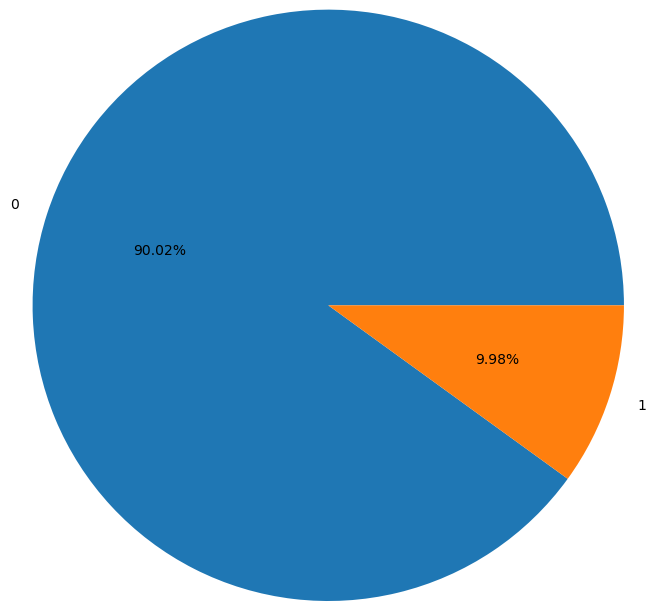

In [81]:
plt.pie(depression_age, labels=depression_Name,  radius=2, autopct="%1.2f%%")

In [82]:
depression_target = target.value_counts().values
depression_targetName = target.value_counts().index

([<matplotlib.patches.Wedge at 0x2df5574a490>,
 [Text(-1.6432003840342644, 1.4628371399132738, '1'),
  Text(1.6432003840342635, -1.4628371399132747, '0')],
 [Text(-0.8962911185641441, 0.797911167225422, '76.85%'),
  Text(0.8962911185641437, -0.7979111672254224, '23.15%')])

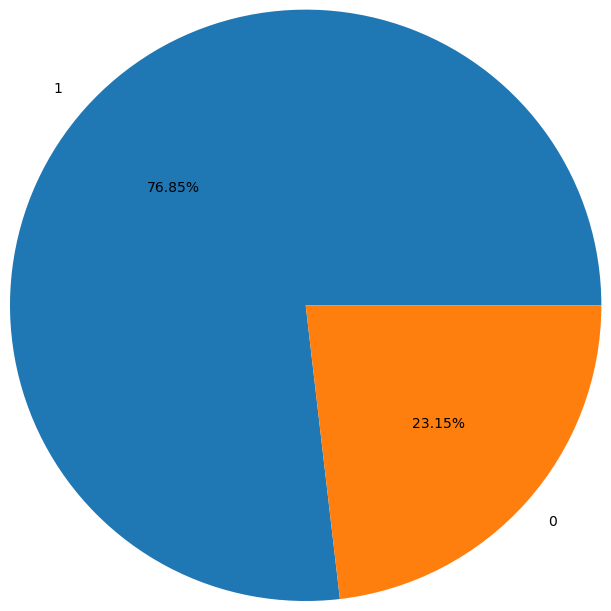

In [83]:
plt.pie(depression_target, labels=depression_targetName,  radius=2, autopct="%1.2f%%")

split data
smote data niye kaj

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(depression, target, test_size=.2)

print(f'X_train_smote: {x_train.shape}, y_train_smote: {y_train.shape}')
print(f'X_test_smote: {x_test.shape}, y_test_smotet: {y_test.shape}')

X_train_smote: (400, 11), y_train_smote: (400,)
X_test_smote: (101, 11), y_test_smotet: (101,)


Scale the data

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5545212765957447, 0.9583333333333334, 'X[7] <= 0.5\ngini = 0.357\nsamples = 400\nvalue = [93, 307]'),
 Text(0.3324468085106383, 0.875, 'X[6] <= 1.5\ngini = 0.459\nsamples = 101\nvalue = [65, 36]'),
 Text(0.19680851063829788, 0.7916666666666666, 'X[5] <= 1.5\ngini = 0.323\nsamples = 79\nvalue = [63, 16]'),
 Text(0.0851063829787234, 0.7083333333333334, 'X[4] <= 1.5\ngini = 0.135\nsamples = 55\nvalue = [51, 4]'),
 Text(0.0425531914893617, 0.625, 'X[6] <= 0.5\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.02127659574468085, 0.5416666666666666, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.06382978723404255, 0.5416666666666666, 'X[3] <= 1.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.0425531914893617, 0.4583333333333333, 'X[4] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.02127659574468085, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06382978723404255, 0.375, 'X[9] <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0

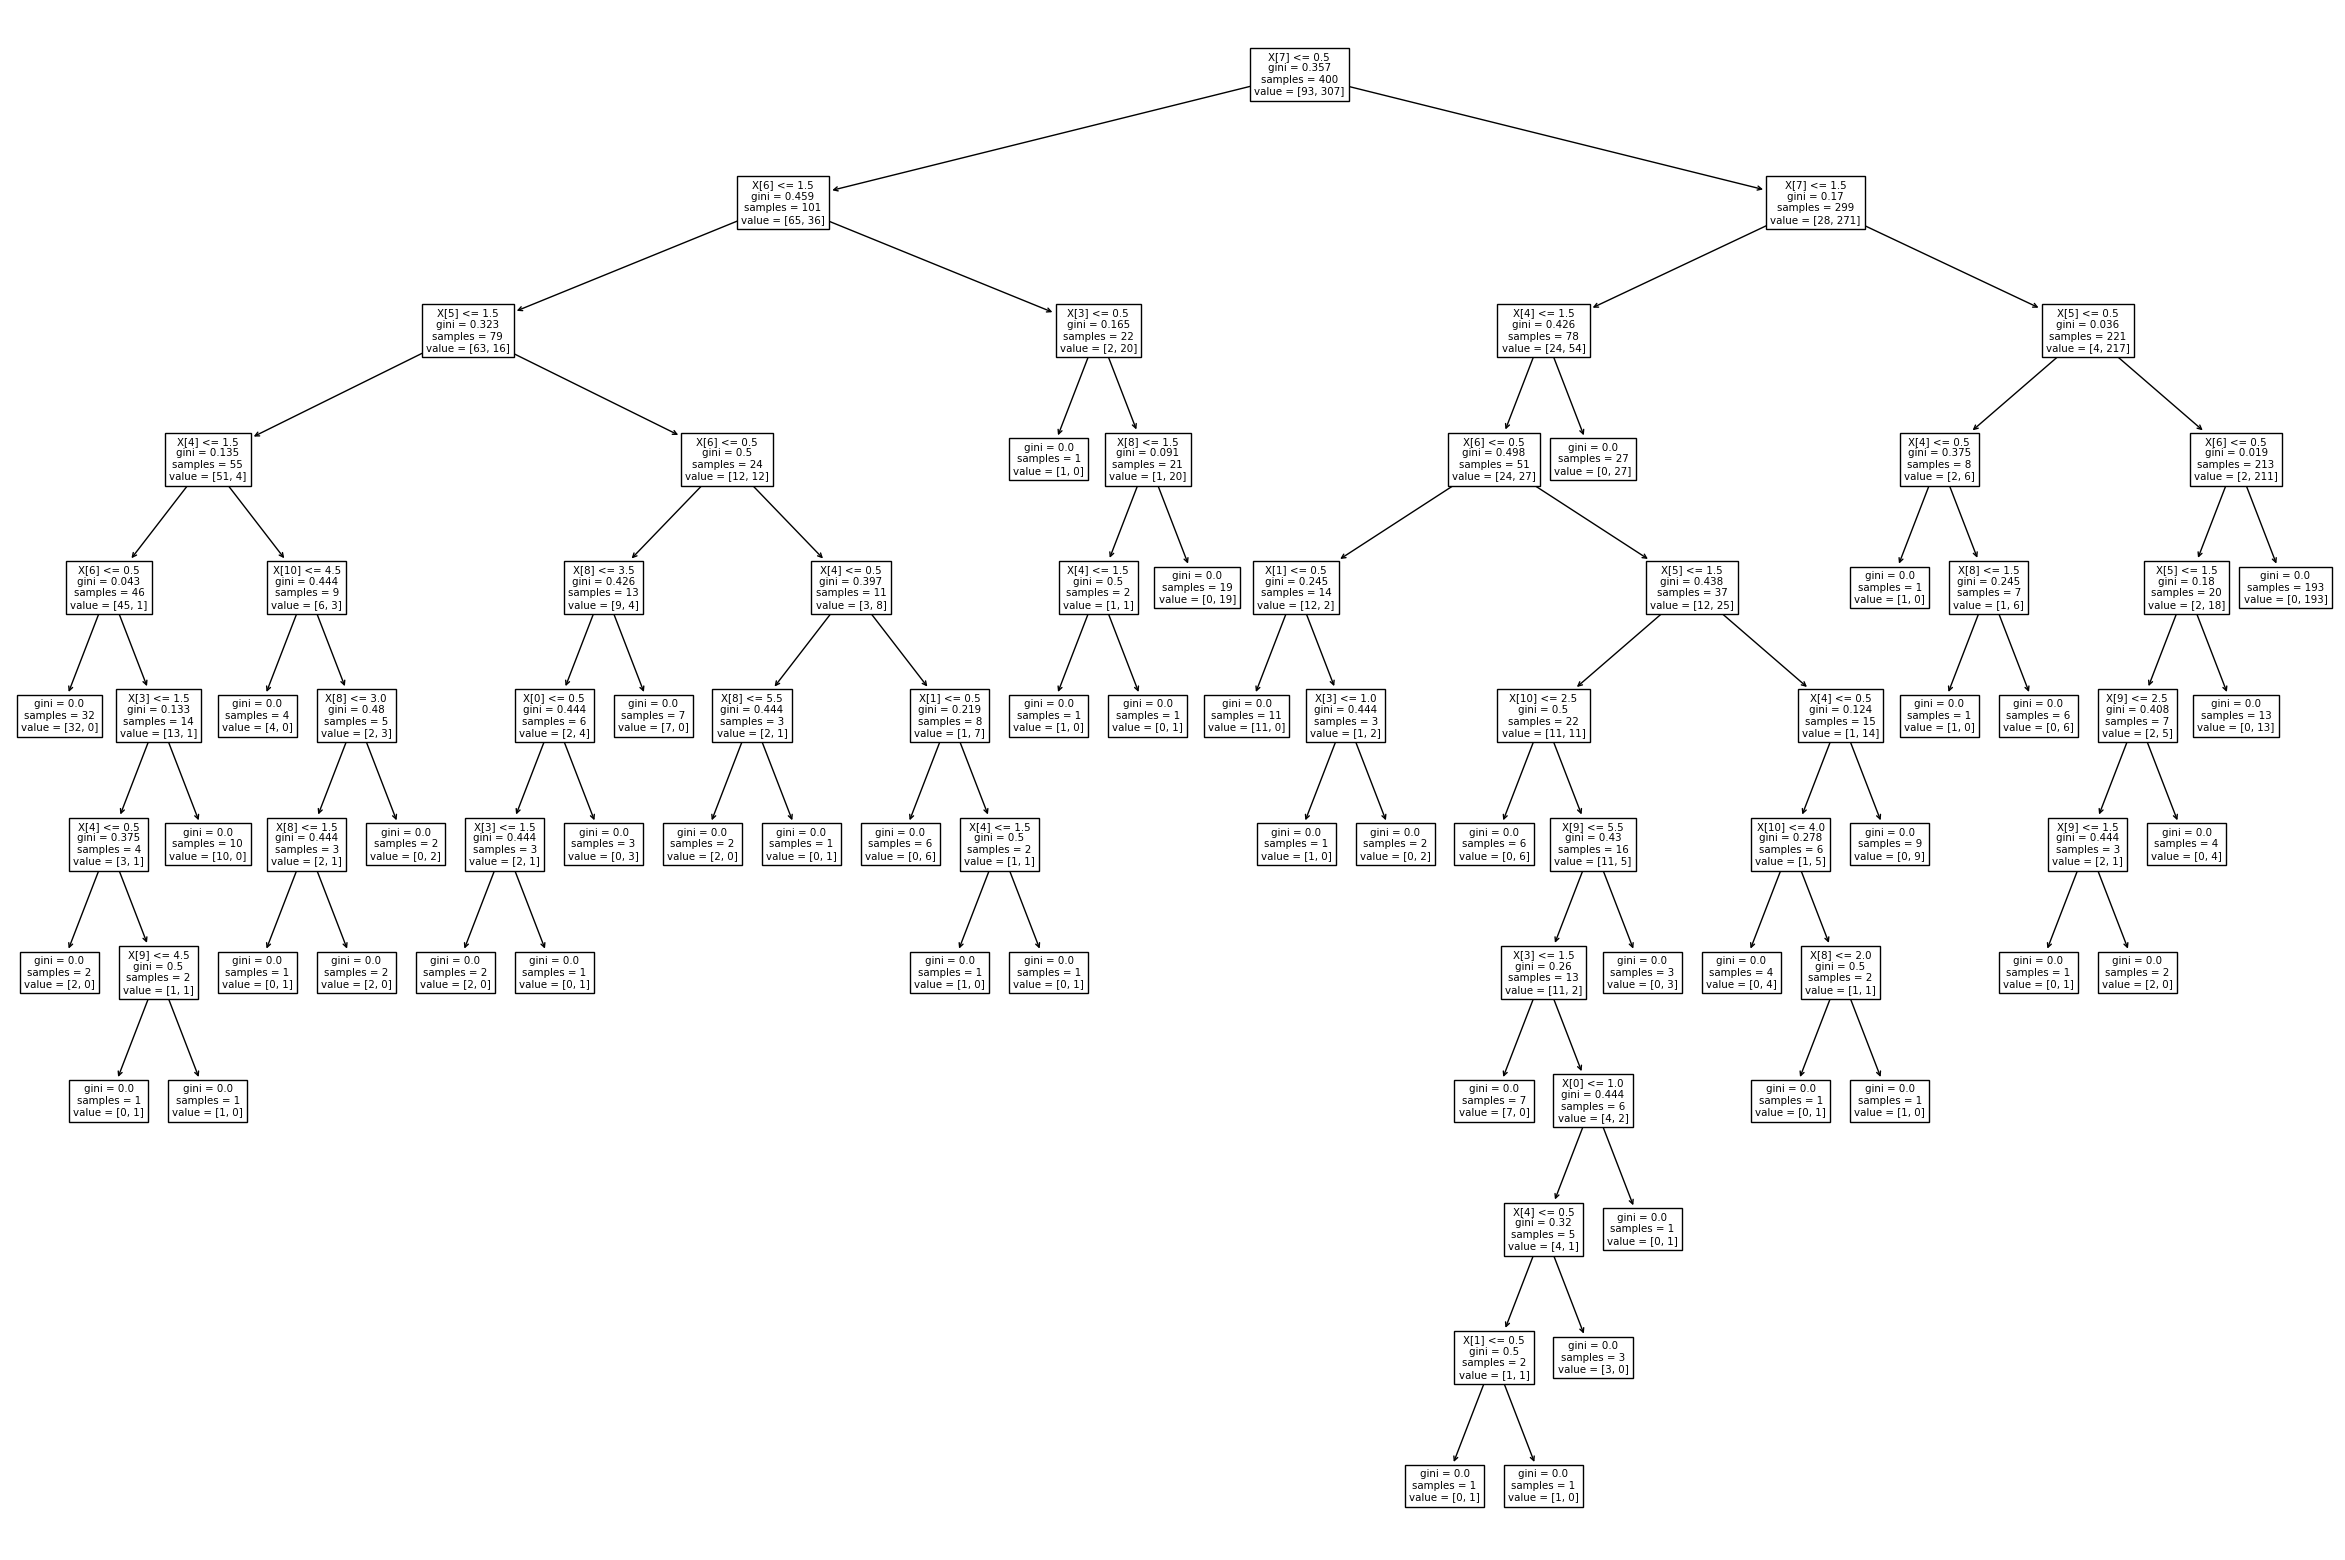

In [86]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(clf)

[Text(0.5545212765957447, 0.9583333333333334, 'Q21A <= 0.5\ngini = 0.357\nsamples = 400\nvalue = [93, 307]'),
 Text(0.3324468085106383, 0.875, 'Q16A <= 1.5\ngini = 0.459\nsamples = 101\nvalue = [65, 36]'),
 Text(0.19680851063829788, 0.7916666666666666, 'Q13A <= 1.5\ngini = 0.323\nsamples = 79\nvalue = [63, 16]'),
 Text(0.0851063829787234, 0.7083333333333334, 'Q5A <= 1.5\ngini = 0.135\nsamples = 55\nvalue = [51, 4]'),
 Text(0.0425531914893617, 0.625, 'Q16A <= 0.5\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.02127659574468085, 0.5416666666666666, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.06382978723404255, 0.5416666666666666, 'conflict <= 1.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.0425531914893617, 0.4583333333333333, 'Q5A <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.02127659574468085, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06382978723404255, 0.375, 'TIPI6 <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(

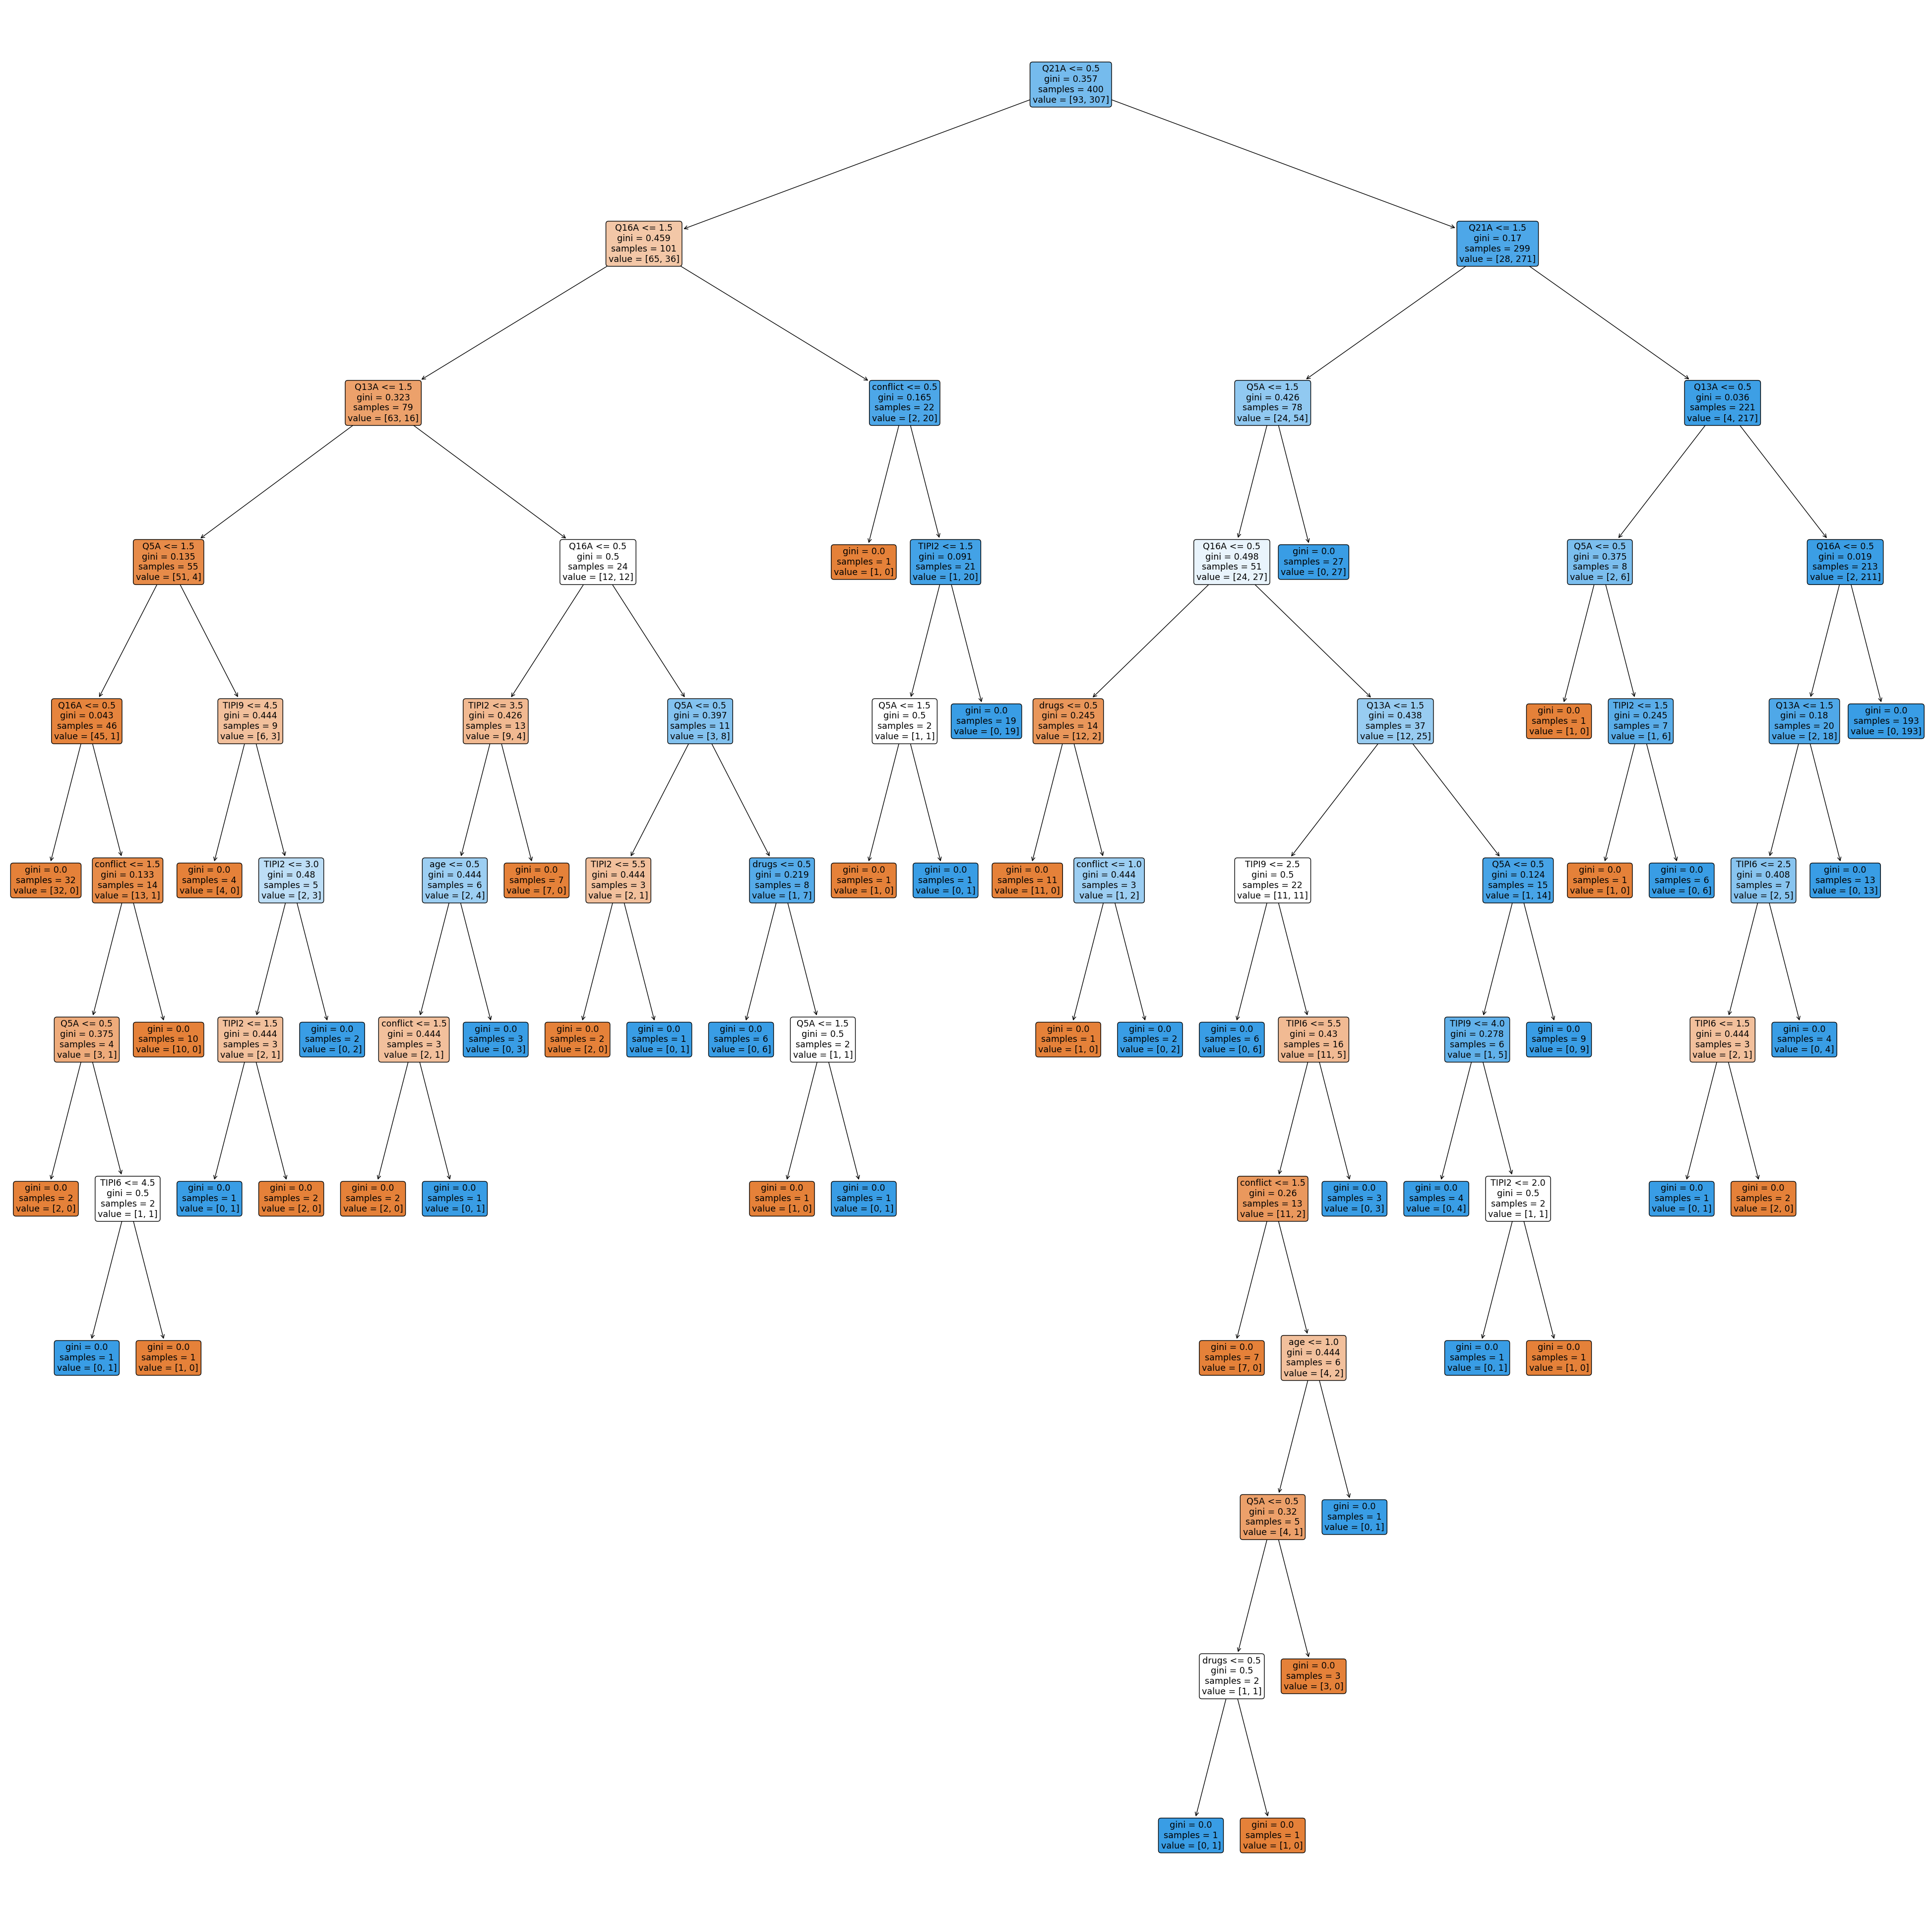

In [87]:
plt.figure(figsize=(50,50))
tree.plot_tree(clf,feature_names=depression.columns,rounded=True,filled=True)

In [88]:
print ("Traning Accuracy: ", clf.score(x_train,y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", clf.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  100.0
Testing Accuracy:  86.13861386138613


In [89]:
pred = clf.predict(x_test)
accuracy_score(pred,y_test)*100

86.13861386138613

In [90]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       0.93      0.88      0.91        78

    accuracy                           0.86       101
   macro avg       0.80      0.83      0.81       101
weighted avg       0.87      0.86      0.87       101



In [91]:
cm=confusion_matrix(y_test,pred)
cm

array([[18,  5],
       [ 9, 69]], dtype=int64)

<AxesSubplot:>

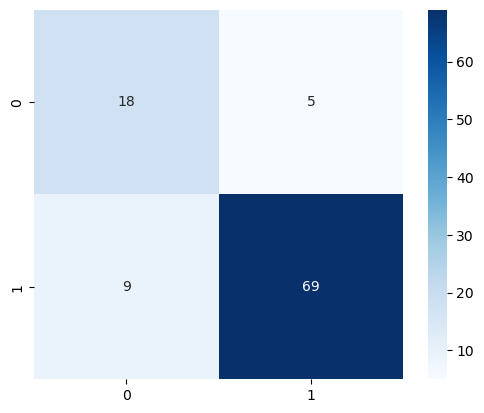

In [92]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

<AxesSubplot:>

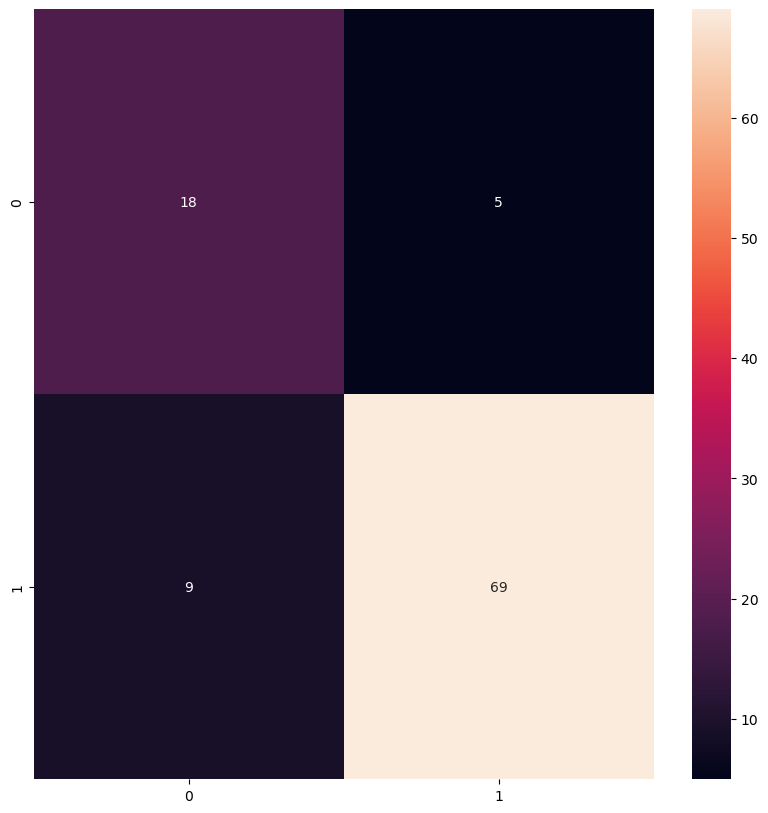

In [93]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

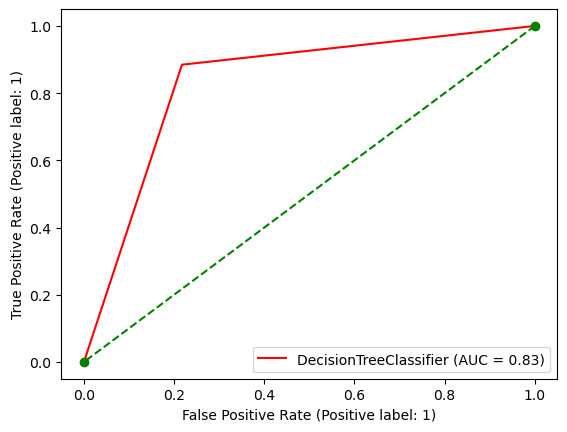

In [94]:
plot_roc_curve(clf,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# kNN Classification

In [95]:
neigh_classifier = KNeighborsClassifier()

neigh_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
pred=  neigh_classifier.predict(x_test)
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [97]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.94      0.95      0.94        78

    accuracy                           0.91       101
   macro avg       0.88      0.87      0.87       101
weighted avg       0.91      0.91      0.91       101



In [98]:
cm=confusion_matrix(y_test,pred)
cm

array([[18,  5],
       [ 4, 74]], dtype=int64)

<AxesSubplot:>

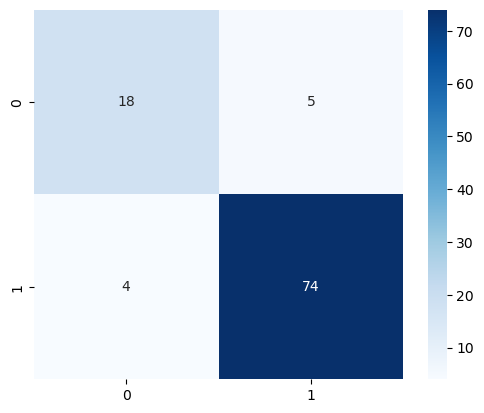

In [99]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

<AxesSubplot:>

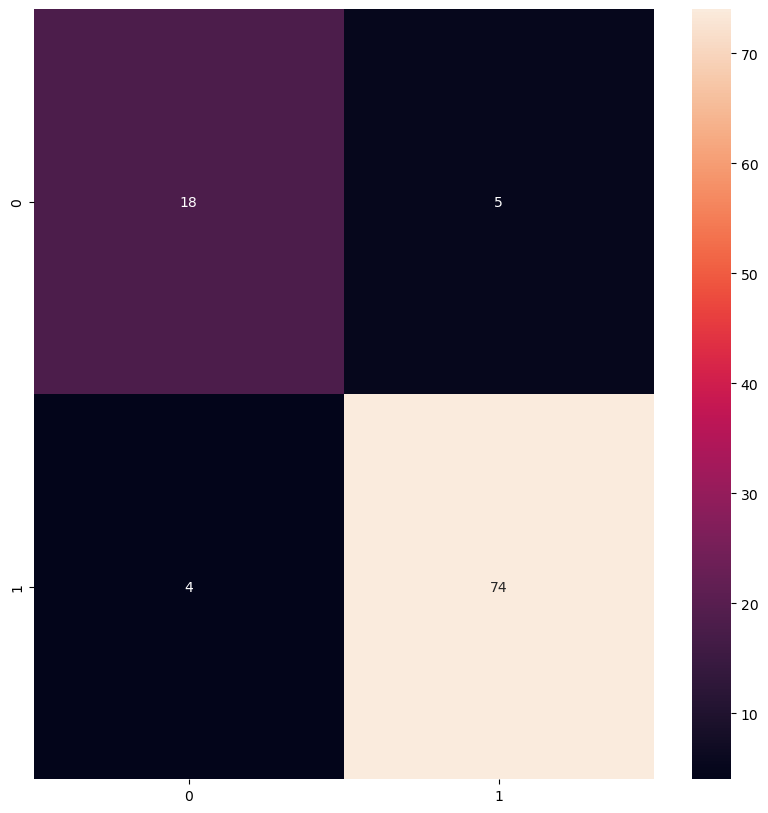

In [100]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [101]:
print ("Traning Accuracy: ", neigh_classifier.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", neigh_classifier.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  93.25
Testing Accuracy:  91.0891089108911


In [102]:
accuracy_score(pred,y_test)*100

91.0891089108911

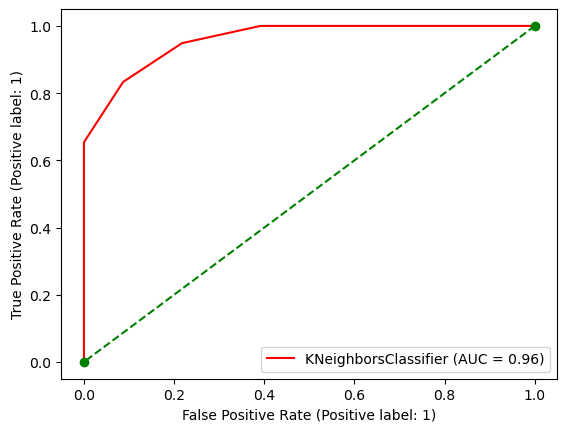

In [103]:
plot_roc_curve(neigh_classifier,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# Finding an appropiate n_neighbors value for kNN classifier by uniform and distance weight function:

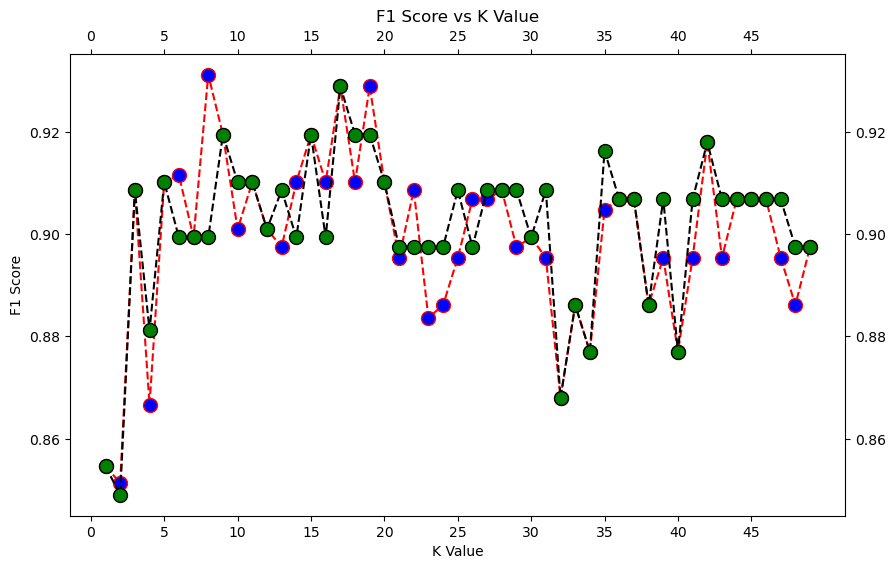

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
f1s = []
f2s = []
for i in range(1, 50):
    knct = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knct.fit(x_train, y_train)
    pred_i = knct.predict(x_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
    
    knct2 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knct2.fit(x_train, y_train)
    pred_i2 = knct2.predict(x_test)
    f2s.append(f1_score(y_test, pred_i2, average='weighted'))
           
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 50), f2s, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('F1 Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.xticks(range(0, 50, 5))
plt.tick_params(labeltop=True, labelright=True, top=True, right=True)

# Logistic Regression

In [105]:
logist=LogisticRegression()
logist.fit(x_train,y_train)

LogisticRegression()

In [106]:
pred=  logist.predict(x_test)
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.96      0.96      0.96        78

    accuracy                           0.94       101
   macro avg       0.92      0.92      0.92       101
weighted avg       0.94      0.94      0.94       101



<AxesSubplot:>

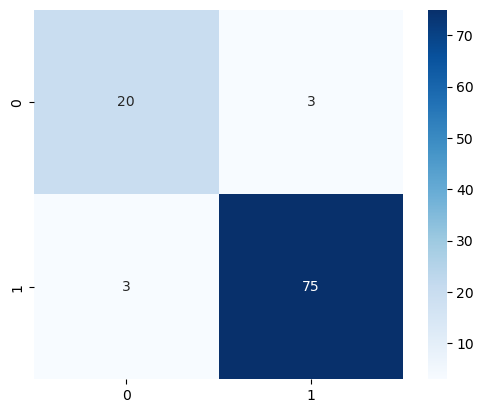

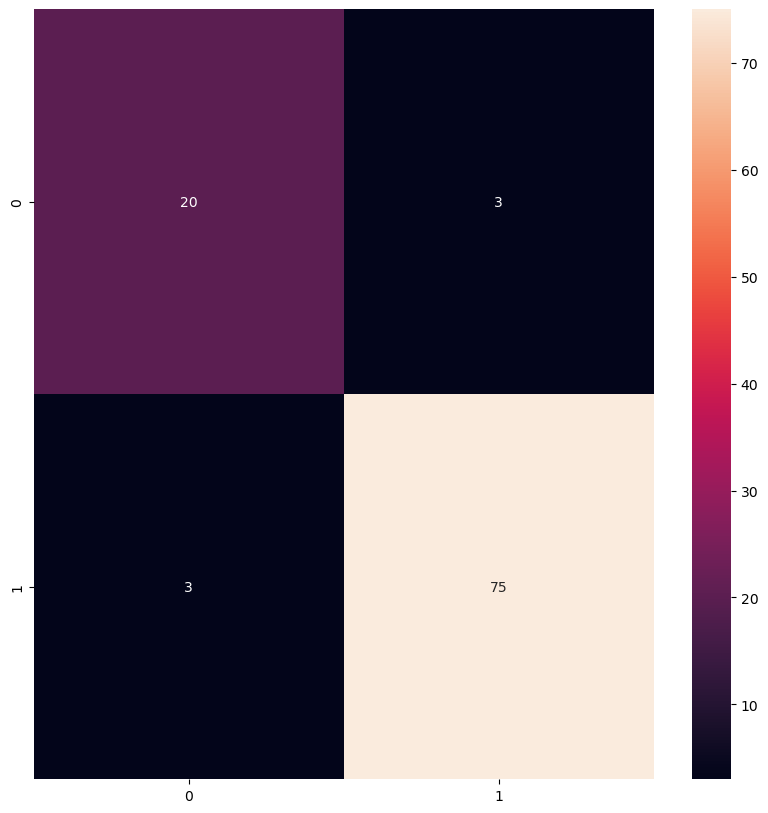

In [107]:
print(classification_report(y_test,pred)) #main
cm=confusion_matrix(y_test,pred)
cm

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [108]:
print ("Traning Accuracy: ", logist.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", logist.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  94.75
Testing Accuracy:  94.05940594059405


In [109]:
accuracy_score(pred,y_test)*100

94.05940594059405

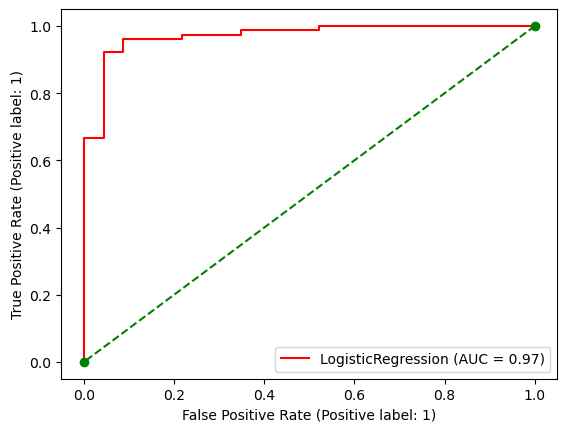

In [110]:
plot_roc_curve(logist,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# XGBoost Classifier (Extreme Gradient Boosting)

In [111]:
import xgboost 
from xgboost import XGBClassifier

In [112]:
xgb = XGBClassifier()

In [113]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [114]:
pred=  xgb.predict(x_test)
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.96      0.94      0.95        78

    accuracy                           0.92       101
   macro avg       0.88      0.90      0.89       101
weighted avg       0.92      0.92      0.92       101



<AxesSubplot:>

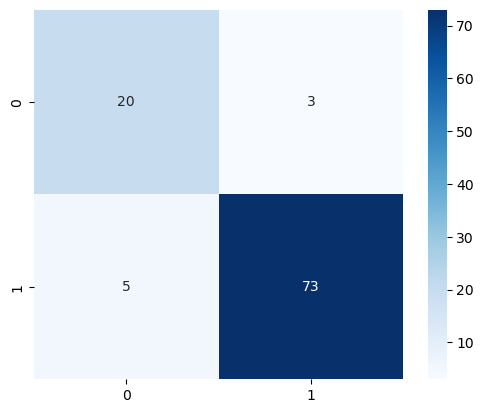

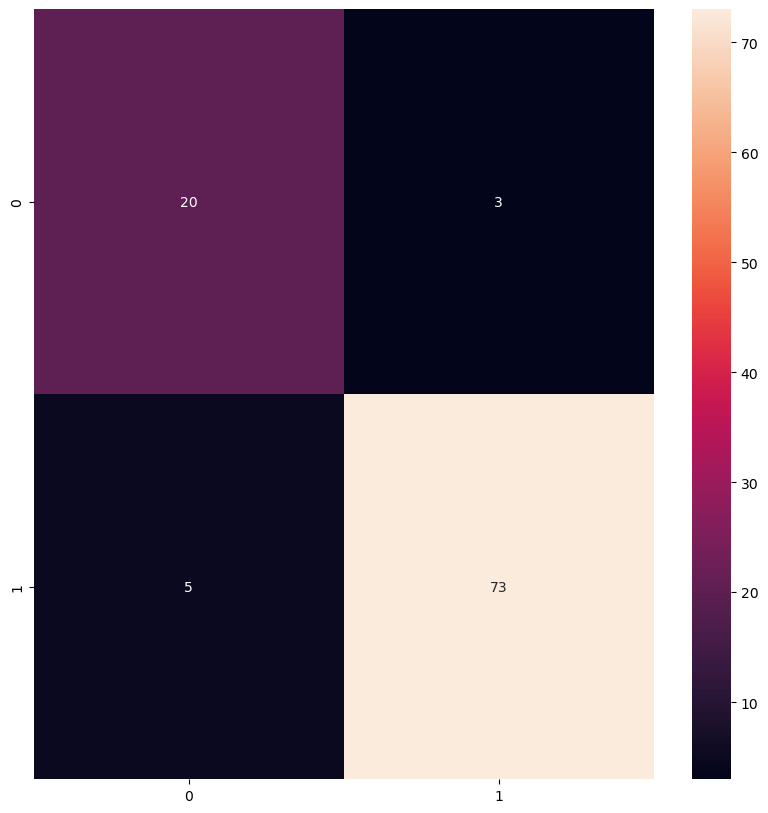

In [115]:
print(classification_report(y_test,pred)) #main
cm=confusion_matrix(y_test,pred)
cm

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [116]:
print ("Traning Accuracy: ", xgb.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", xgb.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  100.0
Testing Accuracy:  92.07920792079209


In [117]:
accuracy_score(pred,y_test)*100

92.07920792079209

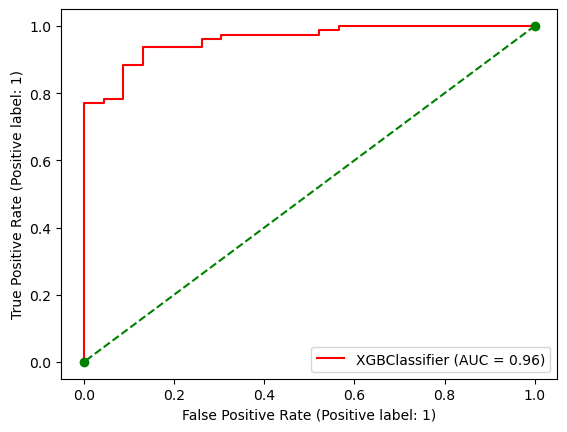

In [118]:
plot_roc_curve(xgb,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# SVM

In [119]:
from sklearn.svm import SVC # support vector classifier
# from sklearn.svm import SVR # support vector REGRESSOR
svm1 = SVC(kernel='linear')

In [120]:
svm1.fit(x_train, y_train)

SVC(kernel='linear')

In [121]:
pred=  svm1.predict(x_test)
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.96      0.96      0.96        78

    accuracy                           0.94       101
   macro avg       0.92      0.92      0.92       101
weighted avg       0.94      0.94      0.94       101



<AxesSubplot:>

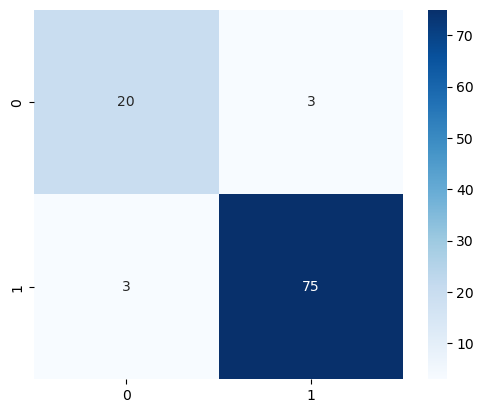

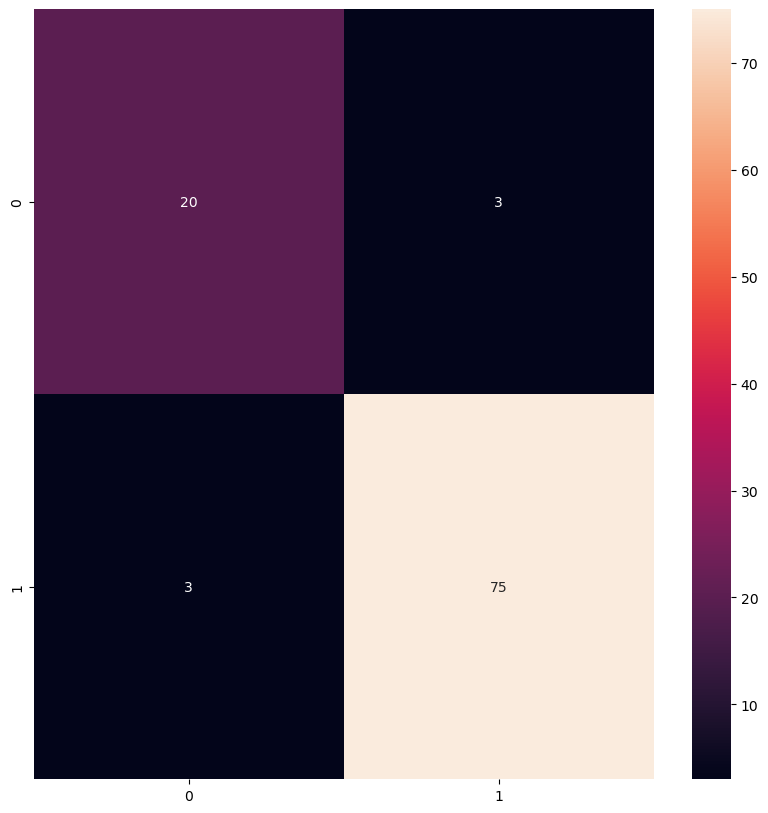

In [122]:
print(classification_report(y_test,pred)) #main
cm=confusion_matrix(y_test,pred)
cm

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [123]:
print ("Traning Accuracy: ",svm1.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", svm1.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  94.75
Testing Accuracy:  94.05940594059405


In [124]:
accuracy_score(pred,y_test)*100

94.05940594059405

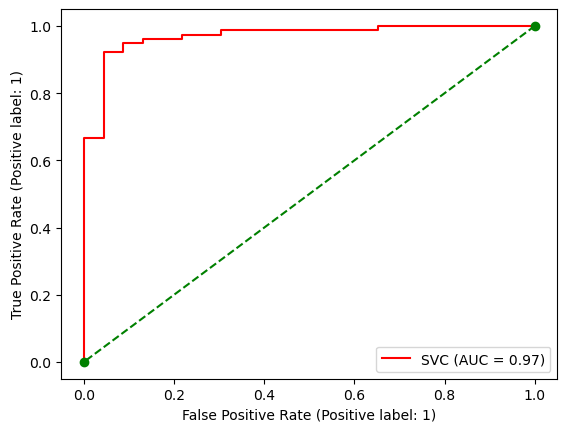

In [125]:
plot_roc_curve(svm1,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

In [126]:
from sklearn.svm import SVR 
svm2 = SVC(kernel='linear')
svm2.fit(x_train, y_train)
pred=  svm1.predict(x_test)
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.96      0.96      0.96        78

    accuracy                           0.94       101
   macro avg       0.92      0.92      0.92       101
weighted avg       0.94      0.94      0.94       101



<AxesSubplot:>

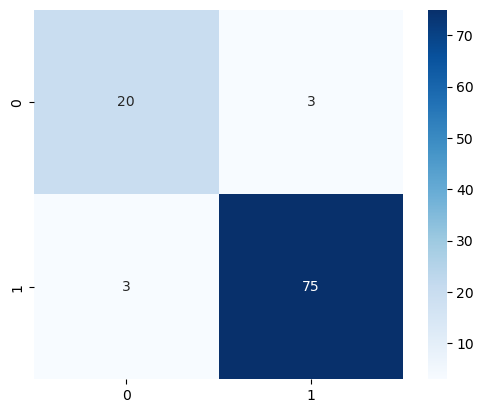

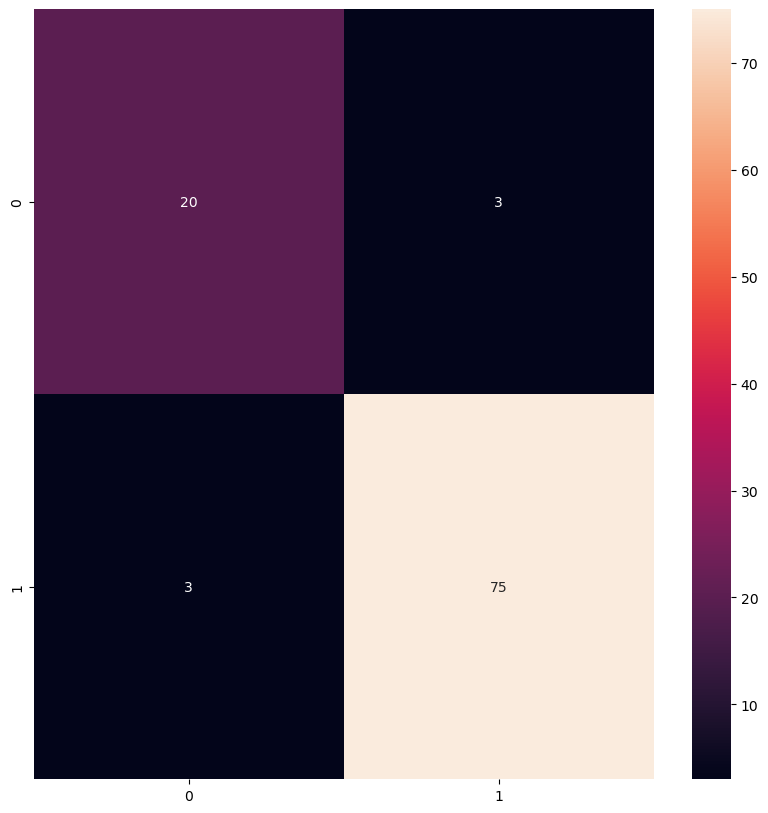

In [127]:
print(classification_report(y_test,pred)) #main
cm=confusion_matrix(y_test,pred)
cm

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [128]:
print ("Traning Accuracy: ",svm2.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", svm2.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  94.75
Testing Accuracy:  94.05940594059405


In [129]:
accuracy_score(pred,y_test)*100

94.05940594059405

In [130]:
svm1 = SVC(kernel="poly")
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svm1.fit(x_train, y_train)
pred=  svm1.predict(x_test)
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.97      0.95      0.96        78

    accuracy                           0.94       101
   macro avg       0.91      0.93      0.92       101
weighted avg       0.94      0.94      0.94       101



<AxesSubplot:>

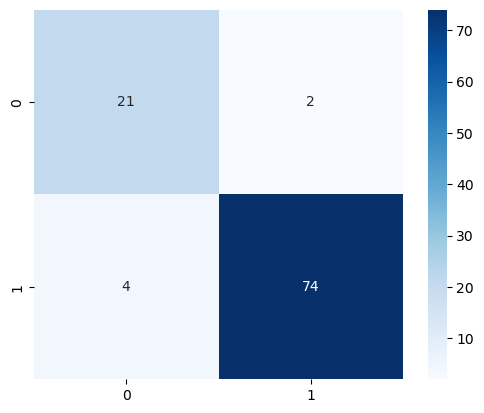

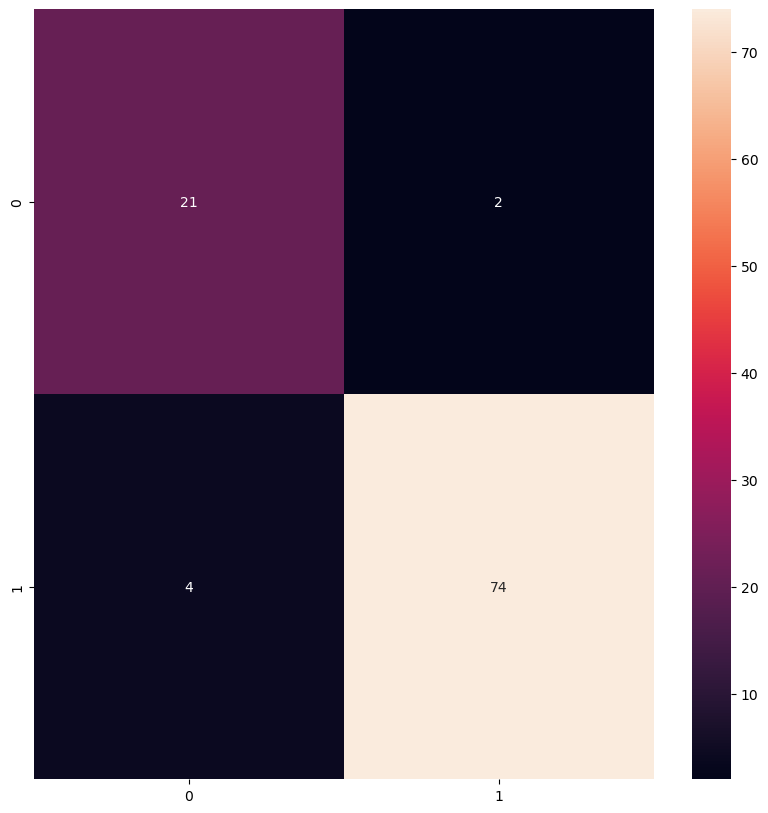

In [131]:
print(classification_report(y_test,pred)) #main
cm=confusion_matrix(y_test,pred)
cm

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [132]:
accuracy_score(pred,y_test)*100

94.05940594059405

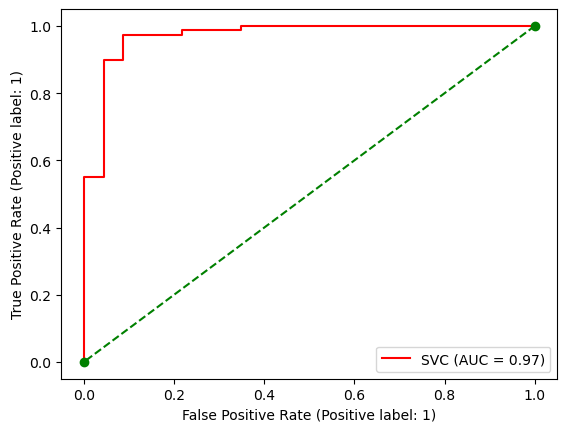

In [133]:
plot_roc_curve(svm1,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# Gaussian Naive Bayes

In [134]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB, BernoulliNB
clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [135]:
pred=  clf.predict(x_test)
pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [136]:
print ("Traning Accuracy: ",clf.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", clf.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  91.75
Testing Accuracy:  92.07920792079209


In [137]:
accuracy_score(pred,y_test)*100

92.07920792079209

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        23
           1       0.99      0.91      0.95        78

    accuracy                           0.92       101
   macro avg       0.87      0.93      0.90       101
weighted avg       0.93      0.92      0.92       101



<AxesSubplot:>

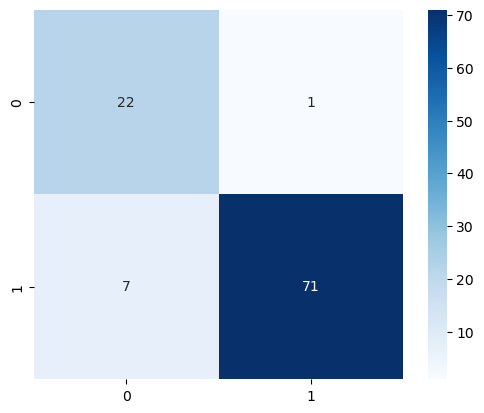

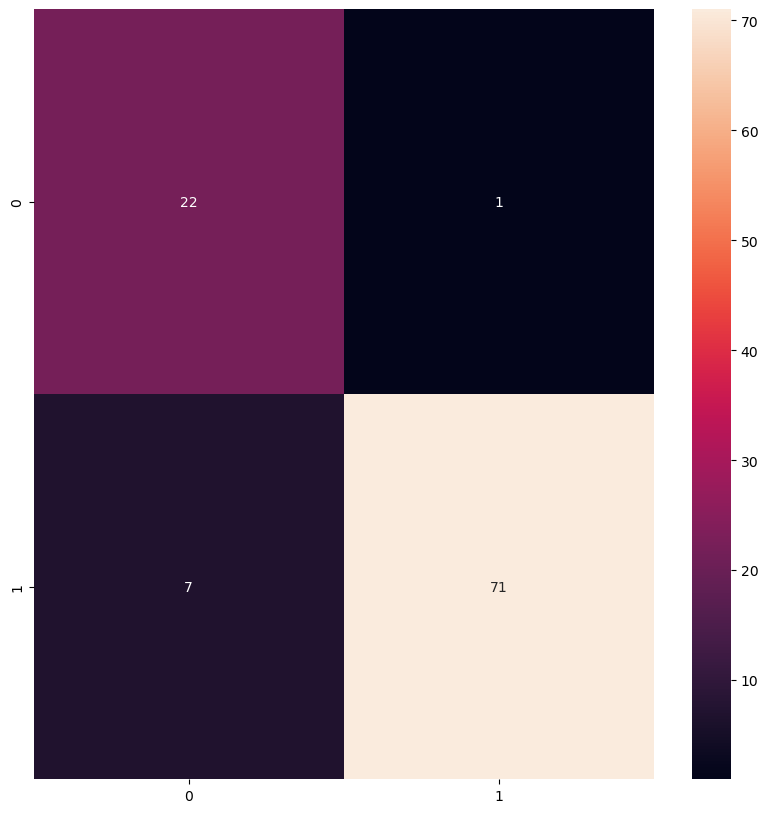

In [138]:
print(classification_report(y_test,pred)) #main
cm=confusion_matrix(y_test,pred)
cm

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

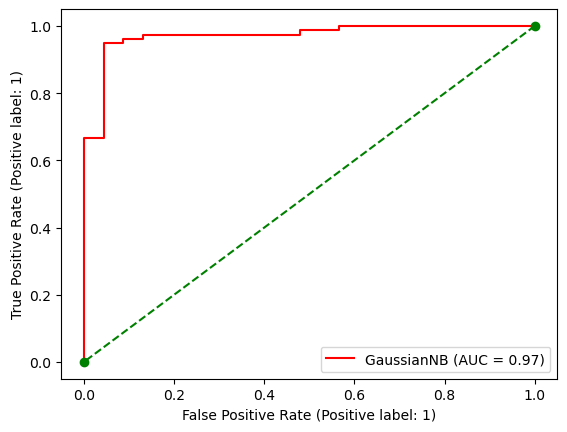

In [139]:
plot_roc_curve(clf,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# MultinomialNB

In [140]:
clf = MultinomialNB()
clf.fit(x_train,y_train)
pred=  clf.predict(x_test)
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [141]:
print ("Traning Accuracy: ",clf.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", clf.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  90.0
Testing Accuracy:  91.0891089108911


In [142]:
accuracy_score(pred,y_test)*100

91.0891089108911

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.94      0.95      0.94        78

    accuracy                           0.91       101
   macro avg       0.88      0.87      0.87       101
weighted avg       0.91      0.91      0.91       101



<AxesSubplot:>

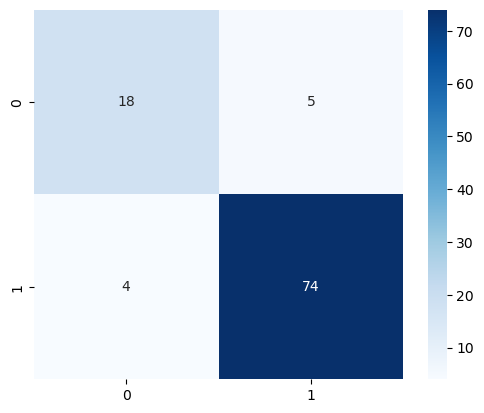

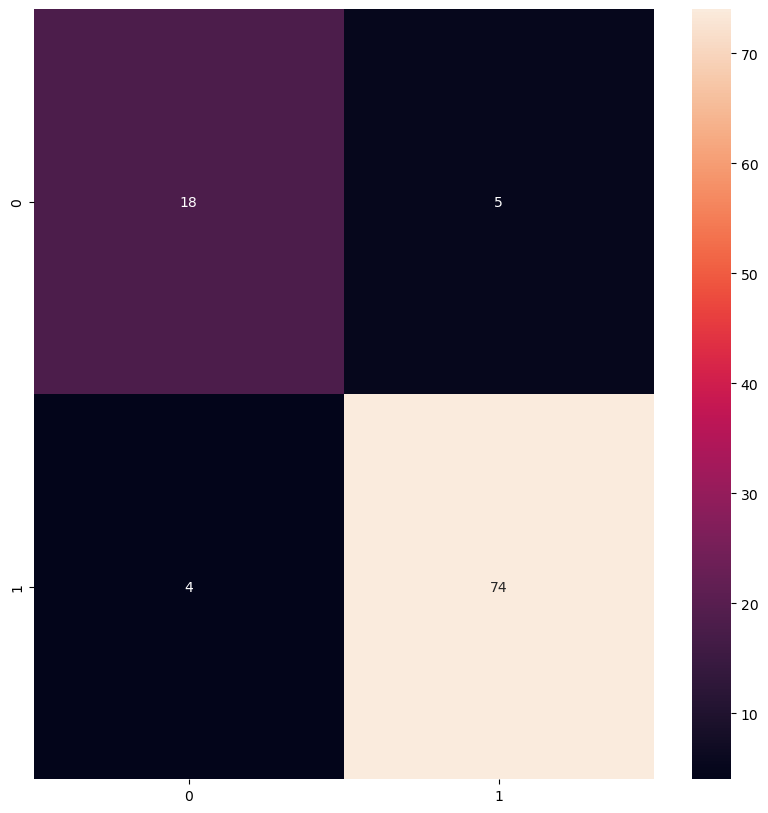

In [143]:
print(classification_report(y_test,pred)) #main
cm=confusion_matrix(y_test,pred)
cm

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

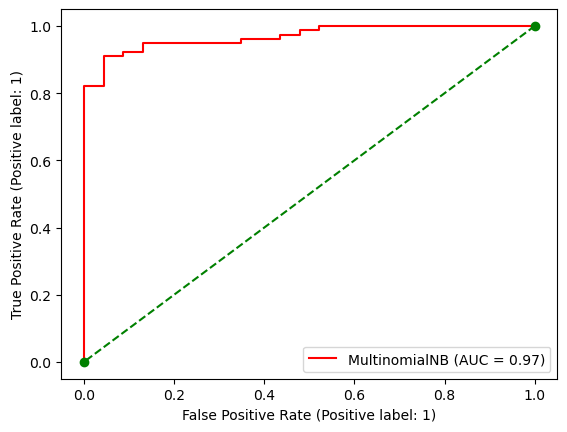

In [144]:
plot_roc_curve(clf,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# BernoulliNB

In [145]:
clf = BernoulliNB()
clf.fit(x_train,y_train)
pred=  clf.predict(x_test)
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [146]:
print ("Traning Accuracy: ",clf.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", clf.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  88.75
Testing Accuracy:  87.12871287128714


In [147]:
accuracy_score(pred,y_test)*100

87.12871287128714

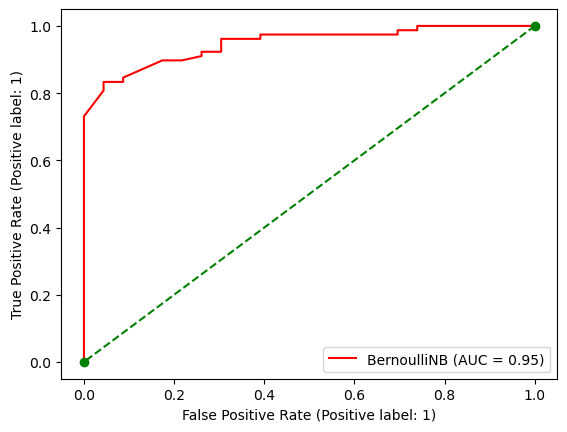

In [148]:
plot_roc_curve(clf,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# Random Forest 

In [149]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [150]:
pred=  rnd_clf.predict(x_test)
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [151]:
print ("Traning Accuracy: ",rnd_clf.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", rnd_clf.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  100.0
Testing Accuracy:  90.0990099009901


In [153]:
accuracy_score(pred,y_test)*100

90.0990099009901

In [154]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.95      0.92      0.94        78

    accuracy                           0.90       101
   macro avg       0.85      0.87      0.86       101
weighted avg       0.90      0.90      0.90       101



In [155]:
cm=confusion_matrix(y_test,pred)
cm

array([[19,  4],
       [ 6, 72]], dtype=int64)

<AxesSubplot:>

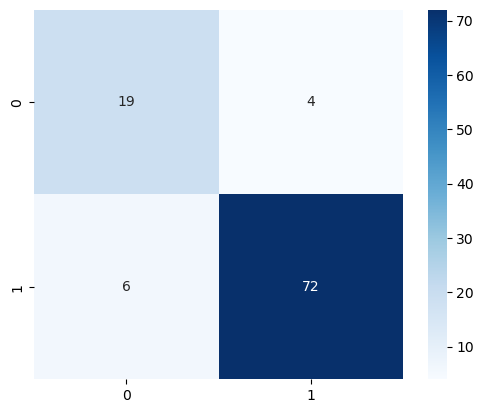

In [156]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

<AxesSubplot:>

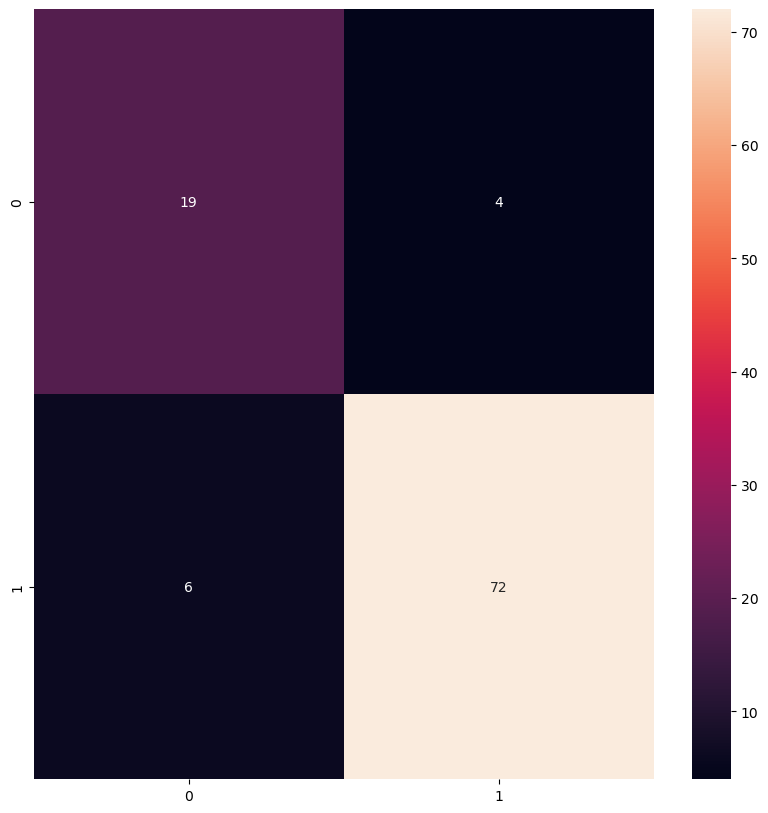

In [157]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

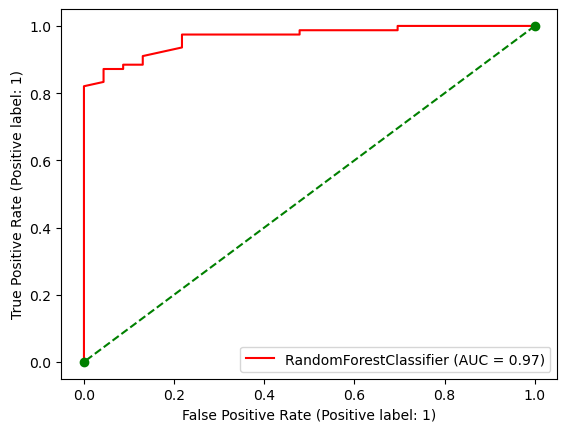

In [158]:
plot_roc_curve(rnd_clf,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

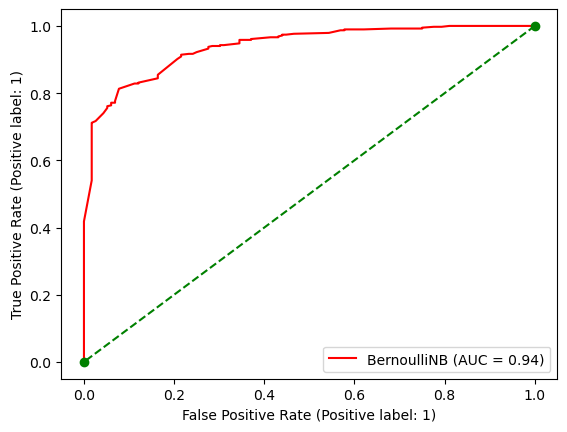

In [159]:
plot_roc_curve(clf,depression,target,color='red')
plt.plot([1,0],[1,0],'go--')

# AdaBoostClassifier

In [160]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [161]:
pred=  clf.predict(x_test)
pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [162]:
print ("Traning Accuracy: ",clf.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", clf.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  94.0
Testing Accuracy:  93.06930693069307


In [163]:
accuracy_score(pred,y_test)*100

93.06930693069307

In [164]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.96      0.95      0.95        78

    accuracy                           0.93       101
   macro avg       0.90      0.91      0.90       101
weighted avg       0.93      0.93      0.93       101



In [165]:
cm=confusion_matrix(y_test,pred)
cm

array([[20,  3],
       [ 4, 74]], dtype=int64)

<AxesSubplot:>

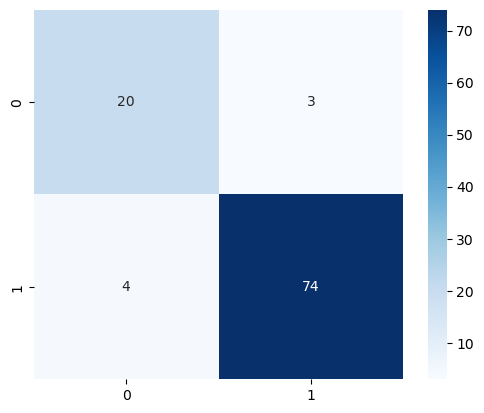

In [166]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

<AxesSubplot:>

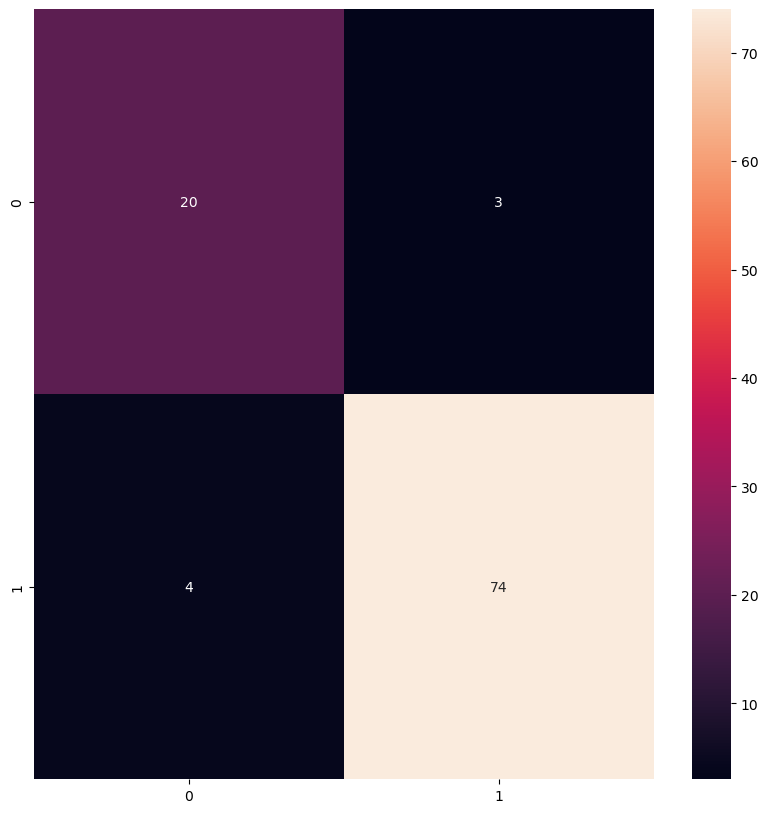

In [167]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)